# Kaggle
## Competition NFL Big Data Bowl

In [256]:
# Carregando os pacotes
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistic lib
from scipy import stats
from scipy.stats import skew, norm

# Sklearn lib
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# Models
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from mlxtend.regressor import StackingCVRegressor
from lightgbm import LGBMRegressor
import lightgbm as lgb
import xgboost as XGB
from sklearn.cluster import KMeans
import tqdm

# Misc lib
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from functools import partial
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from IPython.display import Image

# Utils
import pandasql as ps
import re 
import math, string, os
import datetime

# Options
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000
pd.set_option('display.max_columns', None)
import gc
gc.enable()

In [124]:
# Carregando os dados de treino
train = pd.read_csv('../data/train.csv')
print ("Data is ready !!")

Data is ready !!


# EXPLICAÇÃO DO NFL

In [125]:
from IPython.display import Image
Image(url = '../images/NFL_Image_01.png')

# 1. ANALISE GERAL

In [126]:
# Visualizando os primeiros registros do dataset
train.head()

GameId          PlayId  Team      X      Y     S     A   Dis  \
0  2017090700  20170907000118  away  73.91  34.84  1.69  1.13  0.40   
1  2017090700  20170907000118  away  74.67  32.64  0.42  1.35  0.01   
2  2017090700  20170907000118  away  74.00  33.20  1.22  0.59  0.31   
3  2017090700  20170907000118  away  71.46  27.70  0.42  0.54  0.02   
4  2017090700  20170907000118  away  69.32  35.42  1.82  2.43  0.16   

   Orientation     Dir    NflId      DisplayName  JerseyNumber  Season  \
0        81.99  177.18   496723       Eric Berry            29    2017   
1        27.61  198.70  2495116     Allen Bailey            97    2017   
2         3.01  202.73  2495493   Justin Houston            50    2017   
3       359.77  105.64  2506353  Derrick Johnson            56    2017   
4        12.63  164.31  2530794       Ron Parker            38    2017   

   YardLine  Quarter GameClock PossessionTeam  Down  Distance FieldPosition  \
0        35        1  14:14:00             NE     3         2            NE   
1        35        1  14:14:00             NE     3         2            NE   
2        35        1  14:14:00             NE     3         2            NE   
3        35        1  14:14:00             NE     3         2            NE   
4        35        1  14:14:00             NE     3         2            NE   

   HomeScoreBeforePlay  VisitorScoreBeforePlay  NflIdRusher OffenseFormation  \
0                    0                       0      2543773          SHOTGUN   
1                    0                       0      2543773          SHOTGUN   
2                    0                       0      2543773          SHOTGUN   
3                    0                       0      2543773          SHOTGUN   
4                    0                       0      2543773          SHOTGUN   

   OffensePersonnel  DefendersInTheBox  DefensePersonnel PlayDirection  \
0  1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
1  1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
2  1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
3  1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
4  1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   

                TimeHandoff                  TimeSnap  Yards PlayerHeight  \
0  2017-09-08T00:44:06.000Z  2017-09-08T00:44:05.000Z      8          6-0   
1  2017-09-08T00:44:06.000Z  2017-09-08T00:44:05.000Z      8          6-3   
2  2017-09-08T00:44:06.000Z  2017-09-08T00:44:05.000Z      8          6-3   
3  2017-09-08T00:44:06.000Z  2017-09-08T00:44:05.000Z      8          6-3   
4  2017-09-08T00:44:06.000Z  2017-09-08T00:44:05.000Z      8          6-0   

   PlayerWeight PlayerBirthDate PlayerCollegeName Position HomeTeamAbbr  \
0           212      12/29/1988         Tennessee       SS           NE   
1           288      03/25/1989             Miami       DE           NE   
2           270      01/21/1989           Georgia       DE           NE   
3           245      11/22/1982             Texas      ILB           NE   
4           206      08/17/1987          Newberry       FS           NE   

  VisitorTeamAbbr  Week           Stadium        Location StadiumType  \
0              KC     1  Gillette Stadium  Foxborough, MA     Outdoor   
1              KC     1  Gillette Stadium  Foxborough, MA     Outdoor   
2              KC     1  Gillette Stadium  Foxborough, MA     Outdoor   
3              KC     1  Gillette Stadium  Foxborough, MA     Outdoor   
4              KC     1  Gillette Stadium  Foxborough, MA     Outdoor   

         Turf     GameWeather  Temperature  Humidity WindSpeed WindDirection  
0  Field Turf  Clear and warm         63.0      77.0         8            SW  
1  Field Turf  Clear and warm         63.0      77.0         8            SW  
2  Field Turf  Clear and warm         63.0      77.0         8            SW  
3  Field Turf  Clear and warm         63.0      77.0         8   

In [127]:
# Visualizando os tipos das features
train.dtypes

GameId                      int64
PlayId                      int64
Team                       object
X                         float64
Y                         float64
S                         float64
A                         float64
Dis                       float64
Orientation               float64
Dir                       float64
NflId                       int64
DisplayName                object
JerseyNumber                int64
Season                      int64
YardLine                    int64
Quarter                     int64
GameClock                  object
PossessionTeam             object
Down                        int64
Distance                    int64
FieldPosition              object
HomeScoreBeforePlay         int64
VisitorScoreBeforePlay      int64
NflIdRusher                 int64
OffenseFormation           object
OffensePersonnel           object
DefendersInTheBox         float64
DefensePersonnel           object
PlayDirection              object
TimeHandoff   

In [128]:
# Visualizando dados estatisticos das variaveis numericas
train.describe().T

count          mean           std           min  \
GameId                  509762.0  2.017594e+09  4.997098e+05  2.017091e+09   
PlayId                  509762.0  2.017594e+13  4.997098e+09  2.017091e+13   
X                       509762.0  6.004030e+01  2.543526e+01  6.600000e-01   
Y                       509762.0  2.678354e+01  7.238206e+00  1.850000e+00   
S                       509762.0  2.591912e+00  1.383601e+00  0.000000e+00   
A                       509762.0  1.683176e+00  9.764122e-01  0.000000e+00   
Dis                     509762.0  2.794058e-01  1.454822e-01  0.000000e+00   
Orientation             509744.0  1.802478e+02  1.042983e+02  0.000000e+00   
Dir                     509748.0  1.799339e+02  1.063195e+02  0.000000e+00   
NflId                   509762.0  2.344703e+06  6.418871e+05  2.220000e+02   
JerseyNumber            509762.0  5.418798e+01  2.837936e+01  1.000000e+00   
Season                  509762.0  2.017486e+03  4.998162e-01  2.017000e+03   
YardLine                509762.0  2.836874e+01  1.301092e+01  1.000000e+00   
Quarter                 509762.0  2.504639e+00  1.144105e+00  1.000000e+00   
Down                    509762.0  1.520651e+00  6.749873e-01  1.000000e+00   
Distance                509762.0  8.329248e+00  3.795208e+00  1.000000e+00   
HomeScoreBeforePlay     509762.0  1.114807e+01  1.027710e+01  0.000000e+00   
VisitorScoreBeforePlay  509762.0  9.501057e+00  9.366413e+00  0.000000e+00   
NflIdRusher             509762.0  2.419204e+06  5.357783e+05  2.340000e+02   
DefendersInTheBox       509696.0  6.943025e+00  9.911303e-01  1.000000e+00   
Yards                   509762.0  4.212334e+00  6.436167e+00 -1.400000e+01   
PlayerWeight            509762.0  2.535544e+02  4.836739e+01  1.530000e+02   
Week                    509762.0  9.096370e+00  5.000984e+00  1.000000e+00   
Temperature             461230.0  6.043644e+01  1.757029e+01  9.000000e+00   
Humidity                503602.0  5.564606e+01  2.543098e+01  0.000000e+00   

                                 25%           50%           75%           max  
GameId                  2.017111e+09  2.017123e+09  2.018110e+09  2.018123e+09  
PlayId                  2.017111e+13  2.017123e+13  2.018110e+13  2.018123e+13  
X                       3.909000e+01  6.029000e+01  8.097000e+01  1.168400e+02  
Y                       2.273000e+01  2.679000e+01  3.086000e+01  5.645000e+01  
S                       1.500000e+00  2.470000e+00  3.560000e+00  9.410000e+00  
A                       9.400000e-01  1.540000e+00  2.290000e+00  1.471000e+01  
Dis                     1.700000e-01  2.700000e-01  3.900000e-01  1.390000e+00  
Orientation             9.063000e+01  1.797000e+02  2.704000e+02  3.600000e+02  
Dir                     8.983000e+01  1.800900e+02  2.701900e+02  3.600000e+02  
NflId                   2.532865e+06  2.543765e+06  2.555343e+06  2.561671e+06  
JerseyNumber            2.600000e+01  5.600000e+01  7.800000e+01  9.900000e+01  
Season                  2.017000e+03  2.017000e+03  2.018000e+03  2.018000e+03  
YardLine                2.000000e+01  2.900000e+01  3.900000e+01  5.000000e+01  
Quarter                 1.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
Down                    1.000000e+00  1.000000e+00  2.000000e+00  4.000000e+00  
Distance                6.000000e+00  1.000000e+01  1.000000e+01  4.000000e+01  
HomeScoreBeforePlay     3.000000e+00  9.000000e+00  1.700000e+01  5.700000e+01  
VisitorScoreBeforePlay  0.000000e+00  7.000000e+00  1.400000e+01  5.100000e+01  
NflIdRusher             2.540011e+06  2.552582e+06  2.557976e+06  2.561468e+06  
DefendersInTheBox       6.000000e+00  7.000000e+00  8.000000e+00  1.100000e+01  
Yards                   1.000000e+00  3.000000e+00  6.000000e+00  9.900000e+01  
PlayerWeight            2.100000e+02  2.450000e+02  3.050000e+02  3.800000e+02  
Week                    5.000000e+00  9.000000e+00  1.400000e+01  1.700000e+01  
Temperature             4.800000e+01  6.200000e+01  7.

# 2. DATA MISSING

In [129]:
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

In [130]:
# Verificando as colunas com dados missing do dataset de treino
missing = percent_missing(train)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:50]

Percent of missing data


[('WindDirection', 15.74),
 ('WindSpeed', 13.23),
 ('Temperature', 9.52),
 ('GameWeather', 8.56),
 ('StadiumType', 6.46),
 ('FieldPosition', 1.26),
 ('Humidity', 1.21),
 ('OffenseFormation', 0.02),
 ('DefendersInTheBox', 0.01),
 ('GameId', 0.0),
 ('PlayId', 0.0),
 ('Team', 0.0),
 ('X', 0.0),
 ('Y', 0.0),
 ('S', 0.0),
 ('A', 0.0),
 ('Dis', 0.0),
 ('Orientation', 0.0),
 ('Dir', 0.0),
 ('NflId', 0.0),
 ('DisplayName', 0.0),
 ('JerseyNumber', 0.0),
 ('Season', 0.0),
 ('YardLine', 0.0),
 ('Quarter', 0.0),
 ('GameClock', 0.0),
 ('PossessionTeam', 0.0),
 ('Down', 0.0),
 ('Distance', 0.0),
 ('HomeScoreBeforePlay', 0.0),
 ('VisitorScoreBeforePlay', 0.0),
 ('NflIdRusher', 0.0),
 ('OffensePersonnel', 0.0),
 ('DefensePersonnel', 0.0),
 ('PlayDirection', 0.0),
 ('TimeHandoff', 0.0),
 ('TimeSnap', 0.0),
 ('Yards', 0.0),
 ('PlayerHeight', 0.0),
 ('PlayerWeight', 0.0),
 ('PlayerBirthDate', 0.0),
 ('PlayerCollegeName', 0.0),
 ('Position', 0.0),
 ('HomeTeamAbbr', 0.0),
 ('VisitorTeamAbbr', 0.0),
 ('Week

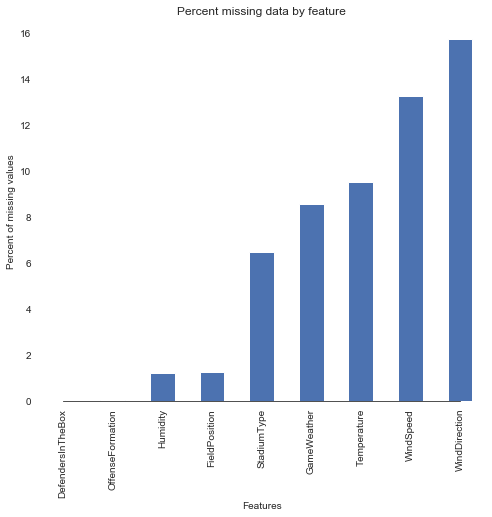

In [131]:
# Setup do plot
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
sns.set_color_codes(palette='deep')

# Identificando os valores missing
missing = round(train.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")

# Visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)

In [132]:
# Funcao para tratar os dados missing de cada variavel
def fill_na(data):
    data['WindDirection'].fillna('unknown',inplace=True)
    data['OffenseFormation'].fillna('unknown',inplace=True)
    data['StadiumType'].fillna('unknown',inplace=True)
    data['GameWeather'].fillna('unknown',inplace=True)
    data['FieldPosition'].fillna('NA',inplace=True)
    
    data['Temperature'].fillna(data['Temperature'].mean(), inplace=True)
    data['Humidity'].fillna(data['Humidity'].mean(), inplace=True)
    data['DefendersInTheBox'].fillna(math.ceil(data['DefendersInTheBox'].mean()),inplace=True)

# Criando as funções auxiliares de limpeza e conversao

In [133]:
# Funcao para agrupar as descricoes dos tipos de estadio
def agrupar_tipo_estadio(StadiumType):
    outdoor       = ['Outdoor', 'Outdoors', 'Cloudy', 'Heinz Field', 'Outdor', 'Ourdoor', 'Outside', 'Outddors', 'Outdoor Retr Roof-Open', 'Oudoor', 'Bowl']
    indoor_closed = ['Indoors', 'Indoor', 'Indoor, Roof Closed', 'Indoor, Roof Closed', 'Retractable Roof', 'Retr. Roof-Closed', 'Retr. Roof - Closed', 'Retr. Roof Closed']
    indoor_open   = ['Indoor, Open Roof', 'Open', 'Retr. Roof-Open', 'Retr. Roof - Open']
    dome_closed   = ['Dome', 'Domed, closed', 'Closed Dome', 'Domed', 'Dome, closed']
    dome_open     = ['Domed, Open', 'Domed, open']
    
    if StadiumType in outdoor:
        return 'outdoor'
    elif StadiumType in indoor_closed:
        return 'indoor_closed'
    elif StadiumType in indoor_open:
        return 'indoor_open'
    elif StadiumType in dome_closed:
        return 'dome_closed'
    elif StadiumType in dome_open:
        return 'dome_open'
    else:
        return 'unknown' # se for n/a
    
# Funcao para agrupar as descricoes dos estadios
def agrupar_estadio(Stadium):

    if Stadium == 'Broncos Stadium at Mile High':
        return 'Broncos Stadium At Mile High'
    
    elif Stadium in ('CenturyField', 'CenturyLink'):
        return 'CenturyLink Field'
    
    elif Stadium == 'EverBank Field':
        return 'Everbank Field'
    
    elif Stadium in ('FirstEnergy', 'FirstEnergy Stadium', 'FirstEnergyStadium'):
        return 'First Energy Stadium'
   
    elif Stadium == 'Lambeau field':
        return 'Lambeau Field'

    elif Stadium == 'Los Angeles Memorial Coliesum':
        return 'Los Angeles Memorial Coliseum'
    
    elif Stadium in ('M & T Bank Stadium', 'M&T Stadium'):
        return 'M&T Bank Stadium'

    elif Stadium in ('Mercedes-Benz Dome', 'Mercedes-Benz Superdome'):
        return 'Mercedes-Benz SuperDome'
    
    elif Stadium in ('MetLife Stadium', 'Metlife Stadium', 'MetLife'):
        return 'MetLife Stadium' 
    
    elif Stadium == 'NRG':
        return 'NRG Stadium' 

    elif Stadium == 'Oakland-Alameda County Coliseum':
        return 'Oakland Alameda-County Coliseum' 
    
    elif Stadium == 'Paul Brown Stdium':
        return 'Paul Brown Stadium' 

    elif Stadium == 'Twickenham':
        return 'Twickenham Stadium' 
    
    else:
        return Stadium
    
# Funcao para agrupar a localizacao do estadio e do jogo
def agrupar_local(Location):

    if Location == "Arlington, Texas":
        return "Arlington, TX"
    elif Location in ("Baltimore, Maryland","Baltimore, Md."):
        return "Baltimore, MD"
    elif Location == "Charlotte, North Carolina":
        return "Charlotte, NC"
    elif Location == "Chicago. IL":
        return "Chicago, IL"
    elif Location == "Cincinnati, Ohio":
        return "Cincinnati, OH"
    elif Location in ("Cleveland","Cleveland Ohio","Cleveland, Ohio","Cleveland,Ohio"):
        return "Cleveland, OH"
    elif Location == "Detroit":
        return "Detroit, MI"
    elif Location == "E. Rutherford, NJ" or Location == "East Rutherford, N.J.":
        return "East Rutherford, NJ"
    elif Location == "Foxborough, Ma":
        return "Foxborough, MA"
    elif Location == "Houston, Texas":
        return "Houston, TX"
    elif Location in ("Jacksonville Florida","Jacksonville, Fl","Jacksonville, Florida"):
        return "Jacksonville, FL"
    elif Location == "London":
        return "London, England"
    elif Location == "Los Angeles, Calif.":
        return "Los Angeles, CA"
    elif Location == "Miami Gardens, Fla.":
        return "Miami Gardens, FLA"
    elif Location in ("New Orleans","New Orleans, La."):
        return "New Orleans, LA"
    elif Location == "Orchard Park NY":
        return "Orchard Park, NY"
    elif Location == "Philadelphia, Pa.":
        return "Philadelphia, PA"
    elif Location == "Pittsburgh":
        return "Pittsburgh, PA"
    elif Location == "Seattle":
        return "Seattle, WA"
    else:
        return Location
    
# Funcao para agrupar o gramado do estadio
def agrupar_gramado(Turf):
    if Turf == 'Artifical':
        return 'Artificial'
    
    elif Turf in ('FieldTurf', 'Field turf'):
        return 'Field Turf'

    elif Turf in ('FieldTurf360', 'FieldTurf 360'):
        return 'Field Turf 360'

    elif Turf in ('Natural', 'Natural grass', 'Naturall Grass', 'grass', 'natural grass', 'SISGrass', 'Natural Grass'):
        return "Grass"

    elif Turf == "UBU Sports Speed S5-M":
        return "UBU Speed Series-S5-M"

    else:
        return Turf

# Funcao para agrupar os dados de direcao do vento
def agrupa_wind_direction(WindDirection):
    wd = str(WindDirection).upper()
    
    if wd == 'N' or 'FROM N' in wd:
        return 'north'
    if wd == 'S' or 'FROM S' in wd:
        return 'south'
    if wd == 'W' or 'FROM W' in wd:
        return 'west'
    if wd == 'E' or 'FROM E' in wd:
        return 'east'
    
    if 'FROM SW' in wd or 'FROM SSW' in wd or 'FROM WSW' in wd:
        return 'south west'
    if 'FROM SE' in wd or 'FROM SSE' in wd or 'FROM ESE' in wd:
        return 'south east'
    if 'FROM NW' in wd or 'FROM NNW' in wd or 'FROM WNW' in wd:
        return 'north west'
    if 'FROM NE' in wd or 'FROM NNE' in wd or 'FROM ENE' in wd:
        return 'north east'
    
    if 'NW' in wd or 'NORTHWEST' in wd:
        return 'north west'
    if 'NE' in wd or 'NORTH EAST' in wd:
        return 'north east'
    if 'SW' in wd or 'SOUTHWEST' in wd:
        return 'south west'
    if 'SE' in wd or 'SOUTHEAST' in wd:
        return 'south east'

    return 'unknown'

# Funcao para agrupar as descricoes de clima
def agrupar_clima(GameWeather):
    chuva   = ['Rainy', 'Rain Chance 40%', 'Showers',
               'Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.',
               'Scattered Showers', 'Cloudy, Rain', 'Rain shower', 'Light Rain', 'Rain']
    nublado = ['Cloudy, light snow accumulating 1-3"', 'Party Cloudy', 'Cloudy, chance of rain',
               'Coudy', 'Cloudy, 50% change of rain', 'Rain likely, temps in low 40s.',
               'Cloudy and cold', 'Cloudy, fog started developing in 2nd quarter',
               'Partly Clouidy', '30% Chance of Rain', 'Mostly Coudy', 'Cloudy and Cool',
               'cloudy', 'Partly cloudy', 'Overcast', 'Hazy', 'Mostly cloudy', 'Mostly Cloudy',
               'Partly Cloudy', 'Cloudy']
    limpo   = ['Partly clear', 'Sunny and clear', 'Sun & clouds', 'Clear and Sunny',
               'Sunny and cold', 'Sunny Skies', 'Clear and Cool', 'Clear and sunny',
               'Sunny, highs to upper 80s', 'Mostly Sunny Skies', 'Cold',
               'Clear and warm', 'Sunny and warm', 'Clear and cold', 'Mostly sunny',
               'T: 51; H: 55; W: NW 10 mph', 'Clear Skies', 'Clear skies', 'Partly sunny',
               'Fair', 'Partly Sunny', 'Mostly Sunny', 'Clear', 'Sunny']
    neve    = ['Heavy lake effect snow', 'Snow']
    none    = ['N/A Indoor', 'Indoors', 'Indoor', 'N/A (Indoors)', 'Controlled Climate']

    
    if GameWeather in chuva:
        return 'chuva'
    elif GameWeather in nublado:
        return 'nublado'
    elif GameWeather in limpo:
        return 'limpo'
    elif GameWeather in neve:
        return 'neve'
    elif GameWeather in none:
        return 'none'
    else:
        return 'none' # se for n/a
    
# Funcao para converter a velocidade do vento
def convert_wind_speed(WindSpeed):
    ws = str(WindSpeed)

    if ws.isdigit():
        return int(ws)

    if '-' in ws:
        return int(ws.split('-')[0])

    if ws.split(' ')[0].isdigit():
        return int(ws.split(' ')[0])

    if 'mph' in ws.lower():
        return int(ws.lower().split('mph')[0])
    else:
        return 0
    
    
# Funcao para converter altura de feet-inches para centimetros
def convert_to_cm(ft_in):
    h_ft   = int(ft_in.split('-')[0])
    h_inch = int(ft_in.split('-')[1])
    h_inch += h_ft * 12
    h_cm = round(h_inch * 2.54, 1)
    #print("Your height is : %d cm." % h_cm)   
    
    return h_cm

# Funcao para converter peso em lbs para kg
def convert_to_kg(lbs):
    kg = lbs * 0.45359237
    #print("The weight is", kg, "in kilograms")
    
    return kg

# Funcao para converter temperatura Fahrenheit para Celsius
def convert_to_celsius(fah):
    celsius = (fah - 32) * 5.0/9.0
    #print("Temperature:", fah, "Fahrenheit = ", celsius, " C")
    return celsius

# Funcao para converter as features de data e extrair dia, mes, ano, hora, minuto, segundo
def convert_data(data):
    #data['PlayerBirthDate'] = pd.to_datetime(data['PlayerBirthDate'], "%m/%d/%Y")
    data['PlayerBirthDate'] = data['PlayerBirthDate'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y"))
    data['PlayerBirthDate_day'] = data['PlayerBirthDate'].dt.day.astype(int)
    data['PlayerBirthDate_month'] = data['PlayerBirthDate'].dt.month.astype(int)
    data['PlayerBirthDate_year'] = data['PlayerBirthDate'].dt.year.astype(int)

    data['TimeSnap'] = data['TimeSnap'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ"))
    #data['TimeSnap'] = pd.to_datetime(data['TimeSnap'], "%Y-%m-%dT%H:%M:%S.%fZ")
    data['TimeSnap_min'] = data['TimeSnap'].dt.minute.astype(int)
    data['TimeSnap_seg'] = data['TimeSnap'].dt.second.astype(int)
    
    data['TimeHandoff'] = data['TimeHandoff'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ"))
    #data['TimeHandoff'] = pd.to_datetime(data['TimeHandoff'], "%Y-%m-%dT%H:%M:%S.%fZ")
    data['TimeHandoff_min'] = data['TimeHandoff'].dt.minute.astype(int)
    data['TimeHandoff_seg'] = data['TimeHandoff'].dt.second.astype(int)
    
    
    
# Funcao para converter uma string horario em segundos
def str_to_seconds(time):
    time = time.split(':')
    sec = int(time[0])*60 + int(time[1]) + int(time[2])/60
    return sec
    
# Funcao para criar um plot de distribuicao para cada feature
def plot_distribution(dataset, cols=5, width=20, height=25, hspace=0.4, wspace=0.5):
    """
    Plot distributions for each column in a dataset.
    Seaborn countplots are used for categorical data and distplots for numerical data

    args:
    ----
    dataset {dataframe} - the data that will be plotted
    cols {int} - how many distributions to plot for each row
    width {int} - how wide each plot should be
    height {int} - how tall each plot should be
    hspace {float} - horizontal space between plots
    wspace {float} - vertical space between plots 
    """
    # plot styling
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(width, height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    # calculate rows needed
    rows = math.ceil(float(dataset.shape[1]) / cols)
    # create a countplot for top 20 categorical values
    # and a distplot for all numerical values
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            # grab the top 10 for each countplot
            g = sns.countplot(y=column, 
                              data=dataset,
                              order=dataset[column].value_counts().index[:10])
            # make labels only 20 characters long and rotate x labels for nicer displays
            substrings = [s.get_text()[:20] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)

# Resolvendo missing values e realizando limpeza das features

In [134]:
# Primeiro, vou preencher os dados missing e conversao das datas
fill_na(train)
convert_data(train)

# Executar a funcao para converter a altura do jogador em cm
train['PlayerHeight'] = train['PlayerHeight'].apply(convert_to_cm)

# Executar a funcao para converter a altura do jogador em cm
train['PlayerWeight'] = train['PlayerWeight'].apply(convert_to_kg)

# Executar a funcao para converter a temperatura em Celsius
train['Temperature'] = train['Temperature'].apply(convert_to_celsius)

# Executar a funcao para agrupar o nome dos tipos de estadios
train['StadiumType'] = train['StadiumType'].apply(agrupar_tipo_estadio)

# Executar a funcao de agrupar os nomes dos estadios
train['Stadium'] = train['Stadium'].apply(agrupar_estadio)

# Executar a funcao de agrupar a descricao dos locais dos jogos
train['Location'] = train['Location'].apply(agrupar_local)

# Executar a funcao de agrupar a descricao dos locais dos jogos
train['Turf'] = train['Turf'].apply(agrupar_gramado)

# Executar a funcao de agrupar a descricao da direção do vento
train['WindDirection'] = train['WindDirection'].apply(agrupa_wind_direction)

# Executar a funcao de converter a velocidade do vento para numerico
train['WindSpeed'] = train['WindSpeed'].apply(convert_wind_speed)

# Executar a funcao de agrupar a descricao do clima
train['GameWeather'] = train['GameWeather'].apply(agrupar_clima)

# Executar a funcao para converter o horario do jogo em segundos
train['GameClock'] = train['GameClock'].apply(str_to_seconds)

# Analisando Correlacoes

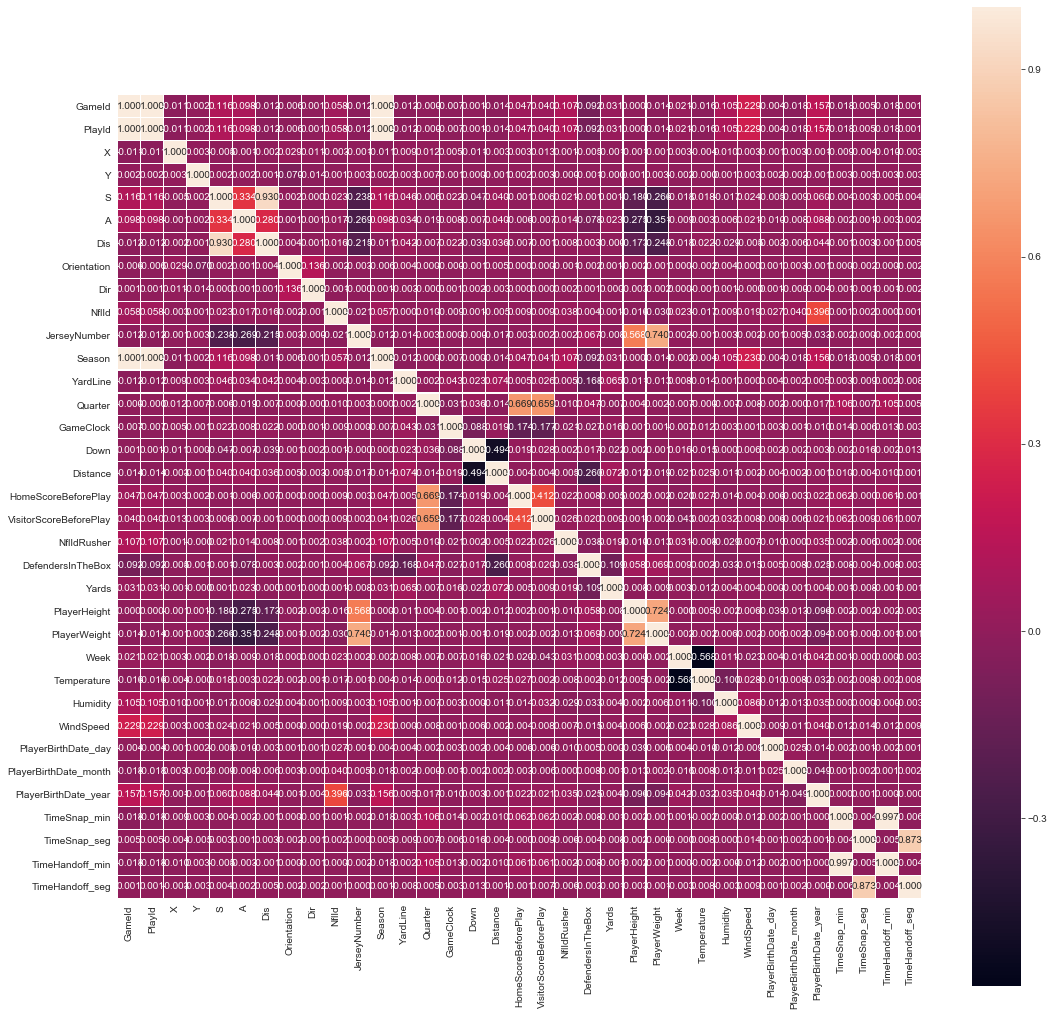

In [135]:
# Correlação de Pearson
cor_mat = train.corr(method = 'pearson')

# Visualizando o grafico de heatmap
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(cor_mat,linewidths=.1,fmt= '.3f',ax=ax,square=True,cbar=True,annot=True)

# 3. Analisando todas as features do dataset
- Neste momento as analises serao com base em um novo dataset
- Esse dataset será com base no jogador que está jogando
- Essa analise foi identificada depois de verificar as features NflId e NflIdRusher
- Essas duas features sao vinculadas, onde é possivel obter o jogador participante da jogada e obter a quantidade de jardas ganhas ou perdidas

In [136]:
# a unique play identifier
# Sao 22 registros por jogada
# Pois sao 11 jogadores do time da casa e 11 jogadores do time visitante
train['PlayId'].value_counts().head()

20181007011551    22
20181007090207    22
20171112053416    22
20170918003383    22
20181230140128    22
Name: PlayId, dtype: int64

In [137]:
# Vinculando o NFLid e NFLidRusher
train_jog = train[train['NflId'] == train['NflIdRusher']]
print(train_jog.shape)

(23171, 56)


In [138]:
# Quando realizado a ligacao entre NflId e NflIdRusher
# Verifica que agora cada jogada tem um unico registro
# e unica jarda obtida
train_jog['PlayId'].value_counts().head()

20171022003923    1
20181111042906    1
20181104042178    1
20181118100433    1
20170924073808    1
Name: PlayId, dtype: int64

In [139]:
# Exemplo mostrando a sequencia das jogadas de um jogo que contabilizou mudanca de jardas (+ ou -)
# É possivel identificar que essa sequencia é crescente, e registrada em PlayId
# Usando o filtro de apenas uma partida de 2017
train_jog[train_jog['GameId'] == 2017090700].head(10)

GameId          PlayId  Team      X      Y     S     A   Dis  \
18   2017090700  20170907000118  home  78.75  30.53  3.63  3.35  0.38   
40   2017090700  20170907000139  home  71.07  27.16  3.06  2.41  0.34   
62   2017090700  20170907000189  home  48.66  19.11  5.77  2.42  0.60   
84   2017090700  20170907000345  home  15.53  25.36  4.45  3.20  0.46   
98   2017090700  20170907000395  away  29.99  27.12  3.90  2.53  0.44   
128  2017090700  20170907000473  home  42.88  22.73  3.32  2.76  0.44   
149  2017090700  20170907000516  home  35.28  24.98  4.80  2.02  0.54   
172  2017090700  20170907000653  home  22.74  25.43  3.65  1.18  0.51   
186  2017090700  20170907000680  away  14.57  22.25  4.77  3.10  0.51   
208  2017090700  20170907000801  away  53.64  27.84  3.64  2.63  0.38   

     Orientation     Dir    NflId     DisplayName  JerseyNumber  Season  \
18        161.98  245.74  2543773     James White            28    2017   
40        210.70  312.20  2543773     James White            28    2017   
62        140.82  221.96  2543773     James White            28    2017   
84        186.22  275.44  2539663  Mike Gillislee            35    2017   
98         34.27  157.92  2557917     Kareem Hunt            27    2017   
128       189.77  319.67  2543773     James White            28    2017   
149       149.73  203.83  2539265    Rex Burkhead            34    2017   
172       205.60  282.12  2539663  Mike Gillislee            35    2017   
186        16.13  129.93  2557917     Kareem Hunt            27    2017   
208        21.53  141.28  2557917     Kareem Hunt            27    2017   

     YardLine  Quarter  GameClock PossessionTeam  Down  Distance  \
18         35        1      854.0             NE     3         2   
40         43        1      832.0             NE     1        10   
62         35        1      782.0             NE     1        10   
84          2        1      732.0             NE     2         2   
98         25        1      728.0             KC     1        10   
128        29        1      681.0             NE     3         7   
149        19        1      634.0             NE     2        10   
172        10        1      574.0             NE     4         1   
186        10        1      565.0             KC     1        10   
208        50        1      394.0             KC     1        10   

    FieldPosition  HomeScoreBeforePlay  VisitorScoreBeforePlay  NflIdRusher  \
18             NE                    0                       0      2543773   
40             NE                    0                       0      2543773   
62             KC                    0                       0      2543773   
84             KC                    0                       0      2539663   
98             KC                    7                       0      2557917   
128            KC                    7                       0      2543773   
149            KC                    7                       0      2539265   
172            KC                    7                       0      2539663   
186            KC                    7                       0      2557917   
208            NA                    7                       0      2557917   

    OffenseFormation        OffensePersonnel  DefendersInTheBox  \
18           SHOTGUN        1 RB, 1 TE, 3 WR                6.0   
40           SHOTGUN        1 RB, 1 TE, 3 WR                6.0   
62        SINGLEBACK        1 RB, 1 TE, 3 WR                7.0   
84             JUMBO  6 OL, 2 RB, 2 TE, 0 WR                9.0   
98           SHOTGUN        1 RB, 3 TE, 1 WR                7.0   
128          SHOTGUN        1 RB, 1 TE, 3 WR                5.0   
149       SINGLEBACK        1 RB, 2 TE, 2 WR                8.0   
172       SINGLEBACK  6 OL, 1 RB, 2 TE, 1 WR                9.0   
186       SINGLEBACK        2 RB, 1 TE, 2 WR                7.0   
208           PISTOL        1 RB, 2 TE, 2 WR                7.0   

     DefensePersonnel 

### Analisando a variavel target 'Yards'
- Extraindo os dados estatisticos, verifica a distribuição está entre -14 à 99
- Isso significa que em algumas jogadas existe um ganho de jardas e em outras perda de jardas
- Metade dos registros estao em 3 jardas ganhas

In [140]:
# Descricao: o número de jardas ganha na jogada (variavel a ser prevista)
train_jog['Yards'].describe()

count    23171.000000
mean         4.212334
std          6.436300
min        -14.000000
25%          1.000000
50%          3.000000
75%          6.000000
max         99.000000
Name: Yards, dtype: float64

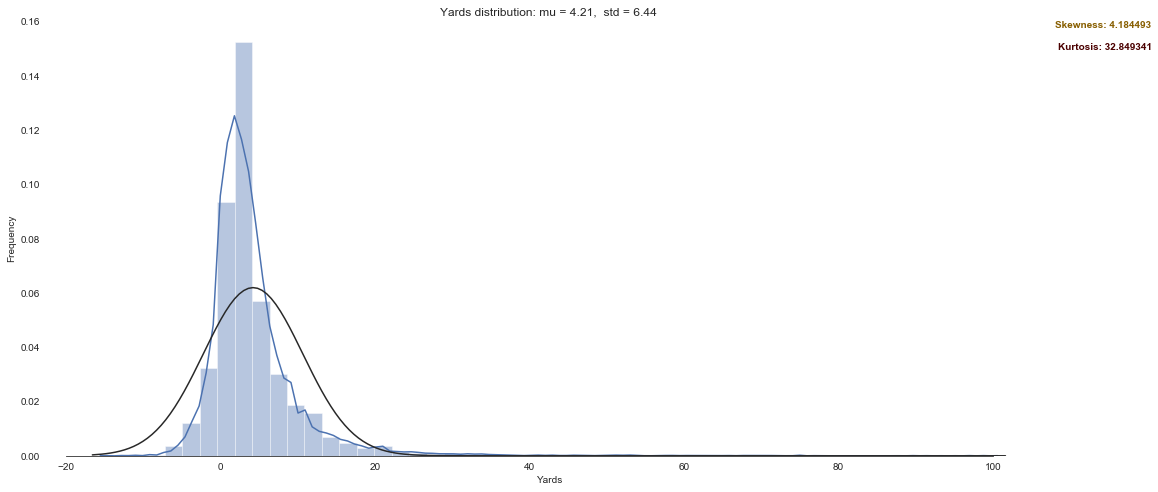

In [141]:
# Analisando a variavel target 'Yards'
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(18, 8))

# Fit a normal distribution
mu, std = norm.fit(train_jog["Yards"])

# Verificando a distribuicao de frequencia da variavel Yards
sns.distplot(train_jog["Yards"], color="b", fit = stats.norm)
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Yards")
ax.set(title="Yards distribution: mu = %.2f,  std = %.2f" % (mu, std))
sns.despine(trim=True, left=True)

# Adicionando Skewness e Kurtosis
ax.text(x=1.1, y=1, transform=ax.transAxes, s="Skewness: %f" % train_jog["Yards"].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
ax.text(x=1.1, y=0.95, transform=ax.transAxes, s="Kurtosis: %f" % train_jog["Yards"].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')

plt.show()

### Analisando as variaveis do JOGADOR
- **PlayerHeight:** altura do jogador no formato feet-inches
- **PlayerWeight:** peso do jogador no formato lbs
- **PlayerBirthDate:** data de nascimento do jogador
- **PlayerCollegeName:** faculdade que o jogador frequentou
- **Position:** posição principal do jogador
- **JerseyNumber:** 
   - Refere se aos números do uniformes dos jogadores que vai de 1 a 99. Atacantes usam de  50 a 79 e nao tem permissao por exemplo para manipular uma jogada de scrimmage a não ser que reportem ao árbitro que estao jogando fora de posição

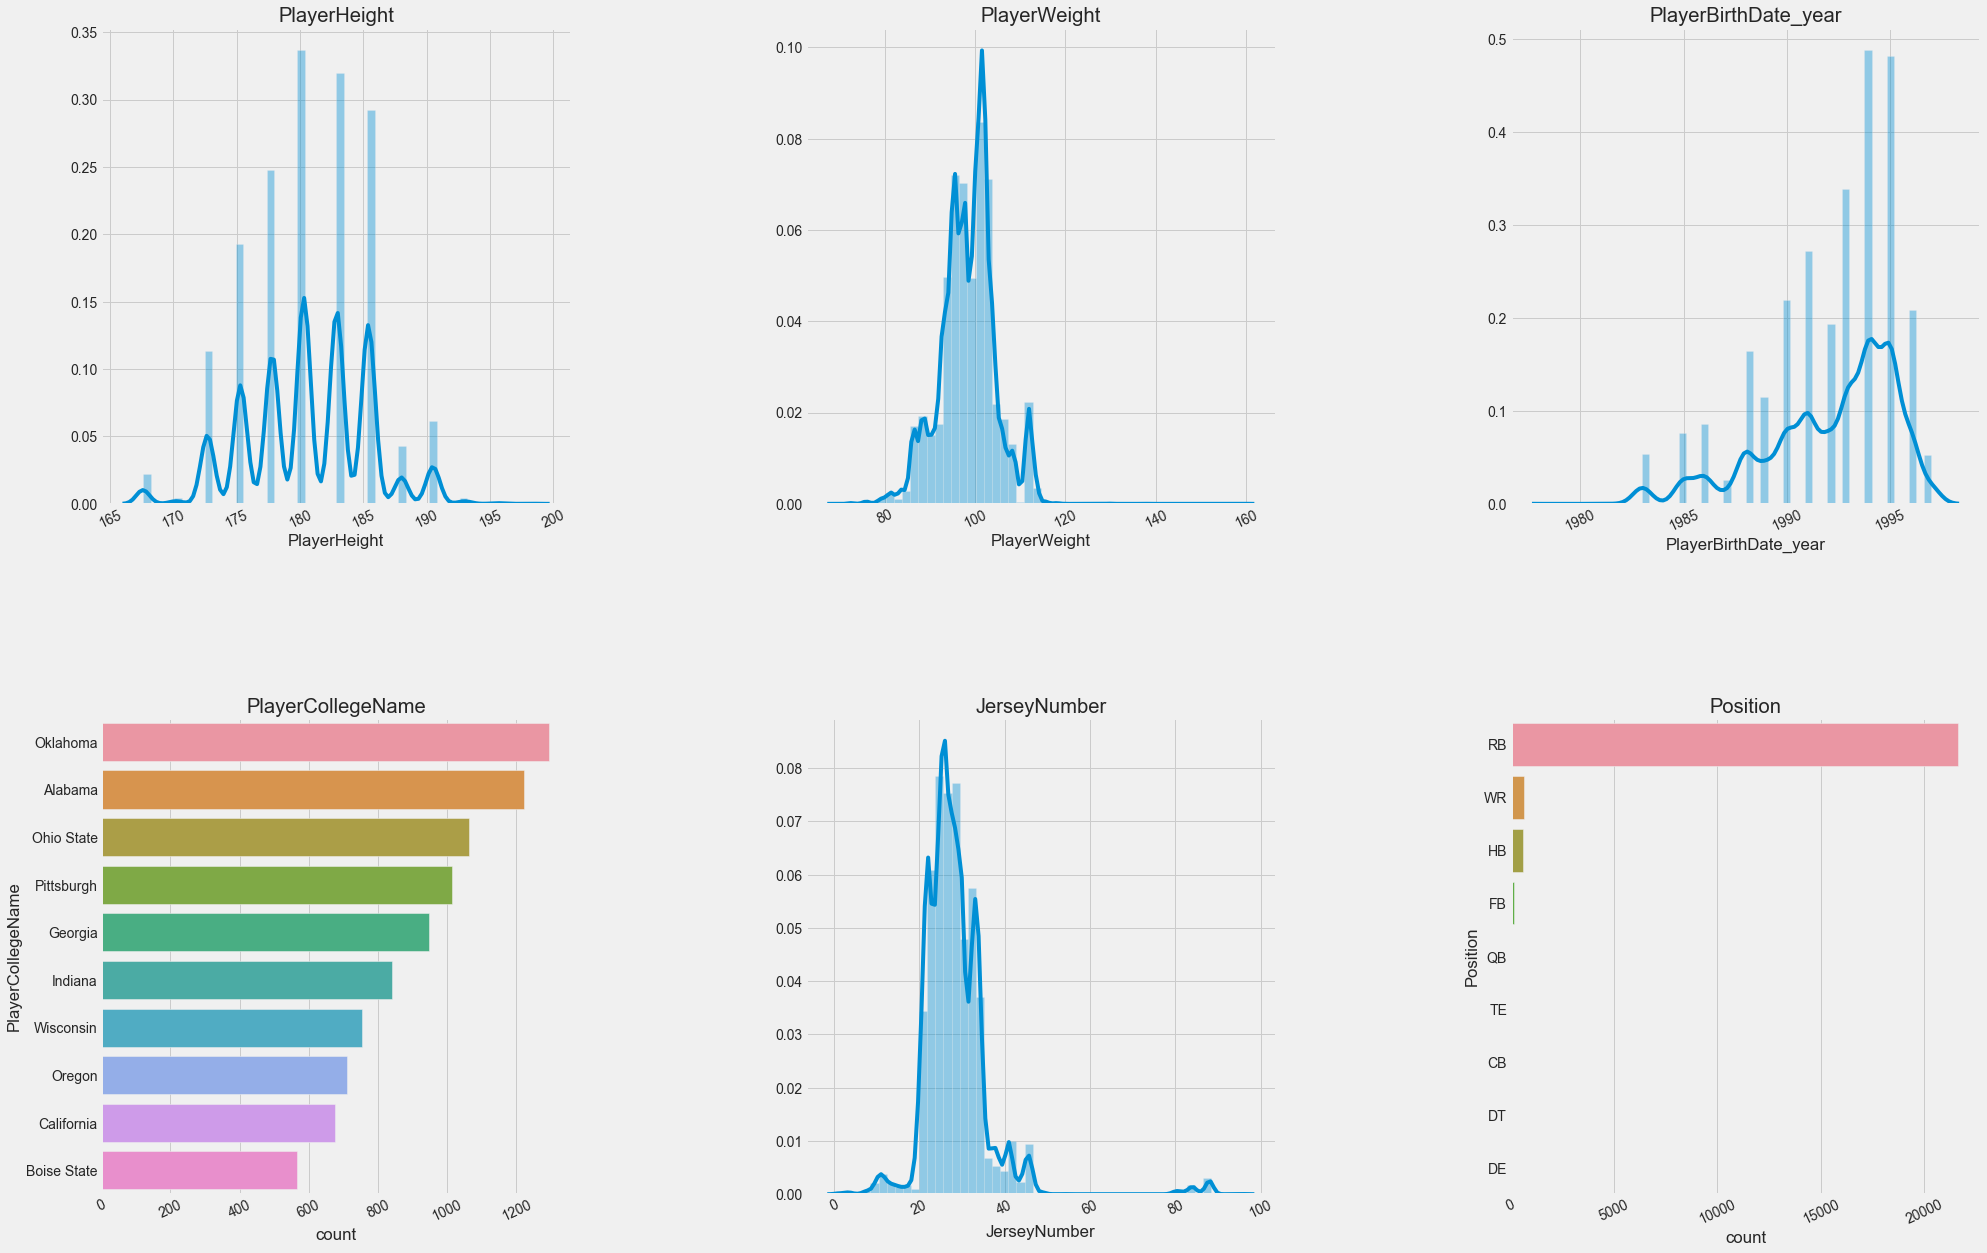

In [142]:
# Visualizando o grafico de distribuicao para cada feature do jogador
columns_to_plot = ['PlayerHeight', 'PlayerWeight', 'PlayerBirthDate_year', 'PlayerCollegeName', 'JerseyNumber', 'Position']
plot_distribution(train_jog[columns_to_plot], cols=3, width=30, height=20, hspace=0.45, wspace=0.5)

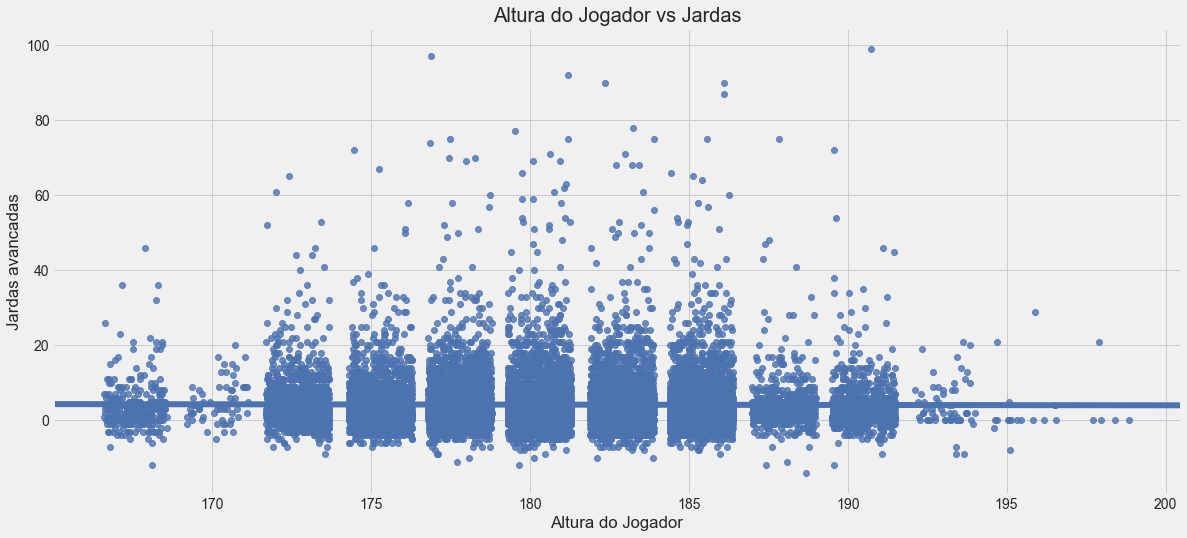

In [143]:
# Exibe o grafico de scatterPlot com a relacao entre Altura do Jogador e Jardas
plt.figure(figsize=(18, 8))
sns.regplot(x='PlayerHeight', y='Yards', data=train_jog, color='b', x_jitter=1)
plt.xlabel('Altura do Jogador')
plt.ylabel('Jardas avancadas')
plt.title('Altura do Jogador vs Jardas', fontsize=20)
plt.show()

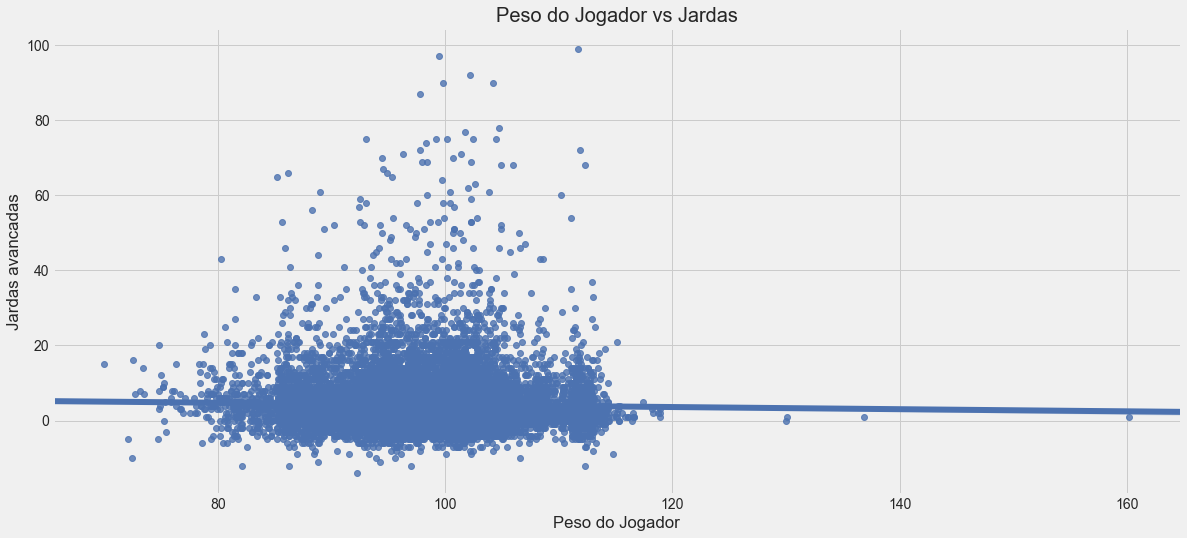

In [144]:
# Exibe o grafico de scatterPlot com a relacao entre Peso do Jogador e Jardas
plt.figure(figsize=(18, 8))
sns.regplot(x='PlayerWeight', y='Yards', data=train_jog, color='b', x_jitter=1)
plt.xlabel('Peso do Jogador')
plt.ylabel('Jardas avancadas')
plt.title('Peso do Jogador vs Jardas', fontsize=20)
plt.show()

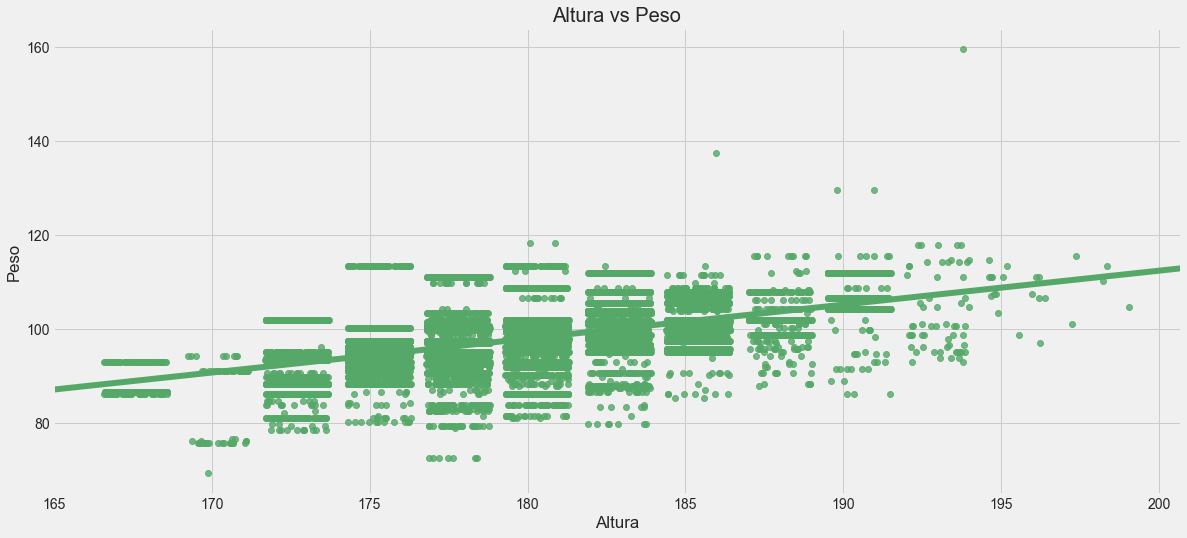

In [145]:
# Exibe o grafico de scatterPlot com a relacao entre Altura e Peso do jogador
# É uma relacao de regressao positiva, onde quanto maais alto, mais pesado o jogador
plt.figure(figsize=(18, 8))
sns.regplot(x='PlayerHeight', y='PlayerWeight', data=train_jog, color='g', x_jitter=1)
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.title('Altura vs Peso', fontsize=20)
plt.show()

In [146]:
# Verificando jogadores acima de 140kg
# Encontrado apenas 1 jogador: Akiem Hicks
# A imagem abaixo mostra este jogador
train_jog[train_jog['PlayerWeight'] >= 140.00].head()

GameId          PlayId  Team      X      Y     S     A   Dis  \
439473  2018120207  20181202071749  away  108.4  28.91  3.41  0.23  0.36   

        Orientation     Dir    NflId  DisplayName  JerseyNumber  Season  \
439473       133.32  105.63  2533433  Akiem Hicks            96    2018   

        YardLine  Quarter  GameClock PossessionTeam  Down  Distance  \
439473         1        2      223.0            CHI     4         1   

       FieldPosition  HomeScoreBeforePlay  VisitorScoreBeforePlay  \
439473           NYG                    7                       7   

        NflIdRusher OffenseFormation             OffensePersonnel  \
439473      2533433            JUMBO  6 OL, 1 RB, 1 TE, 0 WR,2 DL   

        DefendersInTheBox  DefensePersonnel PlayDirection         TimeHandoff  \
439473               10.0  5 DL, 3 LB, 3 DB         right 2018-12-02 19:10:15   

                  TimeSnap  Yards  PlayerHeight  PlayerWeight PlayerBirthDate  \
439473 2018-12-02 19:10:14      1         193.0    159.664514      1989-11-16   

       PlayerCollegeName Position HomeTeamAbbr VisitorTeamAbbr  Week  \
439473      Regina, Can.       DT          NYG             CHI    13   

                Stadium             Location StadiumType  \
439473  MetLife Stadium  East Rutherford, NJ     unknown   

                         Turf GameWeather  Temperature  Humidity  WindSpeed  \
439473  UBU Speed Series-S5-M     nublado    11.111111      92.0          3   

       WindDirection  PlayerBirthDate_day  PlayerBirthDate_month  \
439473    north west                   16                     11   

        PlayerBirthDate_year  TimeSnap_min  TimeSnap_seg  TimeHandoff_min  \
439473                  1989            10            14               10   

        TimeHandoff_seg  
439473               15

In [147]:
from IPython.display import Image
Image(url = '../images/Akiem_Hicks.jpg',width=400,height=400)

In [148]:
# Verificando jogadores com menos de 70kg
# Encontrado apenas 1 jogador: JoJo Natson
# A imagem abaixo mostra este jogador
train_jog[train_jog['PlayerWeight'] <= 70.00].head()

GameId          PlayId  Team      X      Y     S     A   Dis  \
220780  2017121705  20171217052256  away  21.63  34.17  7.22  3.57  0.76   

        Orientation     Dir    NflId  DisplayName  JerseyNumber  Season  \
220780        107.8  200.16  2558905  JoJo Natson            87    2017   

        YardLine  Quarter  GameClock PossessionTeam  Down  Distance  \
220780        18        3      890.0            NYJ     2        10   

       FieldPosition  HomeScoreBeforePlay  VisitorScoreBeforePlay  \
220780           NYJ                   17                      10   

        NflIdRusher OffenseFormation  OffensePersonnel  DefendersInTheBox  \
220780      2558905       SINGLEBACK  1 RB, 2 TE, 2 WR                8.0   

        DefensePersonnel PlayDirection         TimeHandoff  \
220780  4 DL, 2 LB, 5 DB         right 2017-12-17 19:47:45   

                  TimeSnap  Yards  PlayerHeight  PlayerWeight PlayerBirthDate  \
220780 2017-12-17 19:47:43     15         170.2     69.399633      1994-02-01   

       PlayerCollegeName Position HomeTeamAbbr VisitorTeamAbbr  Week  \
220780             Akron       WR           NO             NYJ    15   

                        Stadium         Location    StadiumType  \
220780  Mercedes-Benz SuperDome  New Orleans, LA  indoor_closed   

                         Turf GameWeather  Temperature  Humidity  WindSpeed  \
220780  UBU Speed Series-S5-M       chuva    19.444444      97.0          4   

       WindDirection  PlayerBirthDate_day  PlayerBirthDate_month  \
220780    south west                    1                      2   

        PlayerBirthDate_year  TimeSnap_min  TimeSnap_seg  TimeHandoff_min  \
220780                  1994            47            43               47   

        TimeHandoff_seg  
220780               45

In [149]:
from IPython.display import Image
Image(url = '../images/Jojo_Natson.jpg',width=400,height=400)

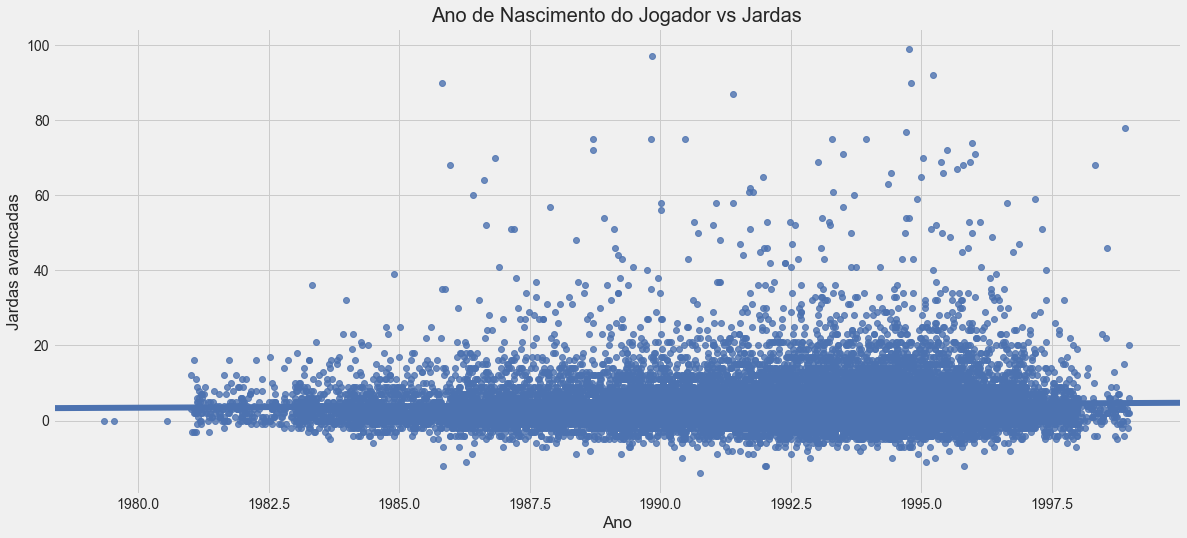

In [150]:
# Exibe o grafico de scatterPlot com a relacao entre Ano de nascimento do Jogador e Jardas
plt.figure(figsize=(18, 8))
sns.regplot(x='PlayerBirthDate_year', y='Yards', data=train_jog, color='b', x_jitter=2)
plt.xlabel('Ano')
plt.ylabel('Jardas avancadas')
plt.title('Ano de Nascimento do Jogador vs Jardas', fontsize=20)
plt.show()

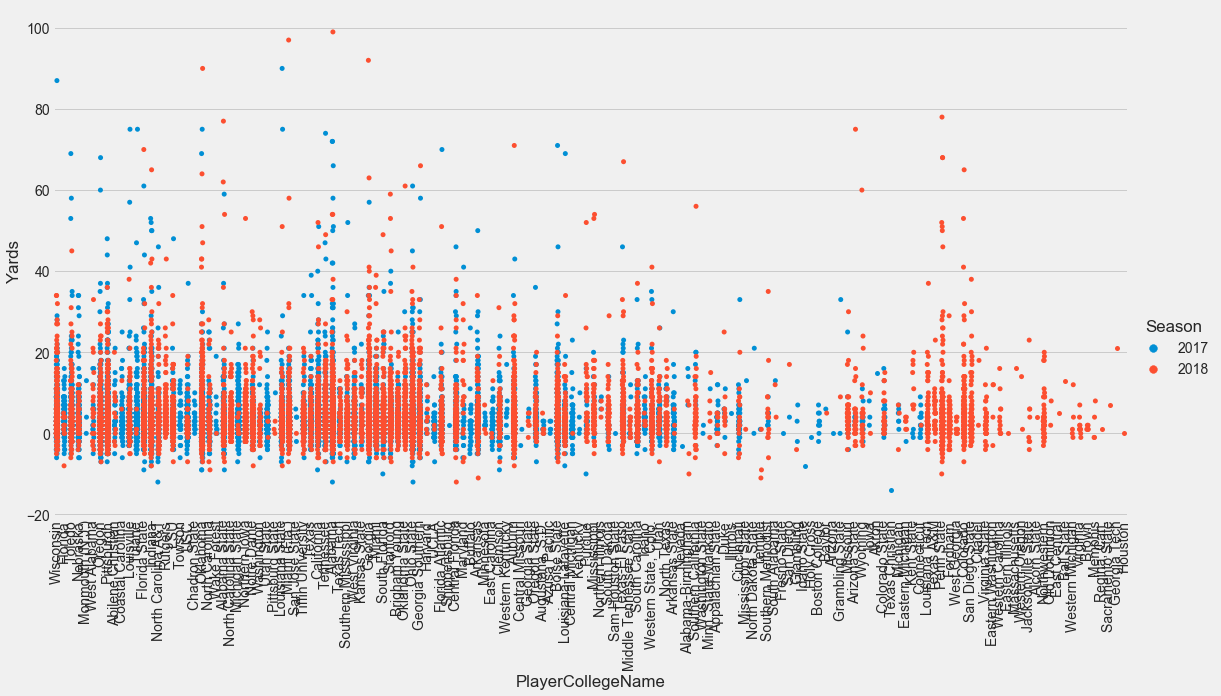

In [151]:
# Exibe o grafico de catPlot com a relacao entre o clima e Jardas
g = sns.catplot(x='PlayerCollegeName', y='Yards', hue='Season', data=train_jog, height=8, aspect=2)
g.set_xticklabels(rotation=90)

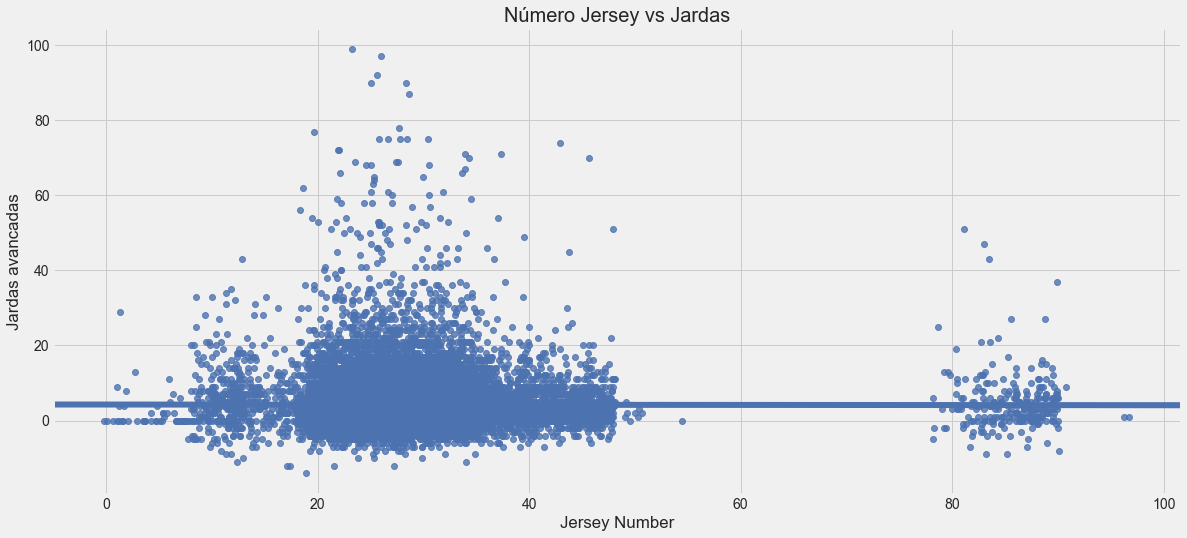

In [152]:
# Exibe o grafico de scatterPlot com a relacao entre JerseyNumber e Jardas
plt.figure(figsize=(18, 8))
sns.regplot(x='JerseyNumber', y='Yards', data=train_jog, color='b', x_jitter=2)
plt.xlabel('Jersey Number')
plt.ylabel('Jardas avancadas')
plt.title('Número Jersey vs Jardas', fontsize=20)
plt.show()

In [153]:
train_jog['Position'].value_counts()

RB    21628
WR      638
HB      616
FB      169
QB       77
TE       31
CB        9
DT        2
DE        1
Name: Position, dtype: int64

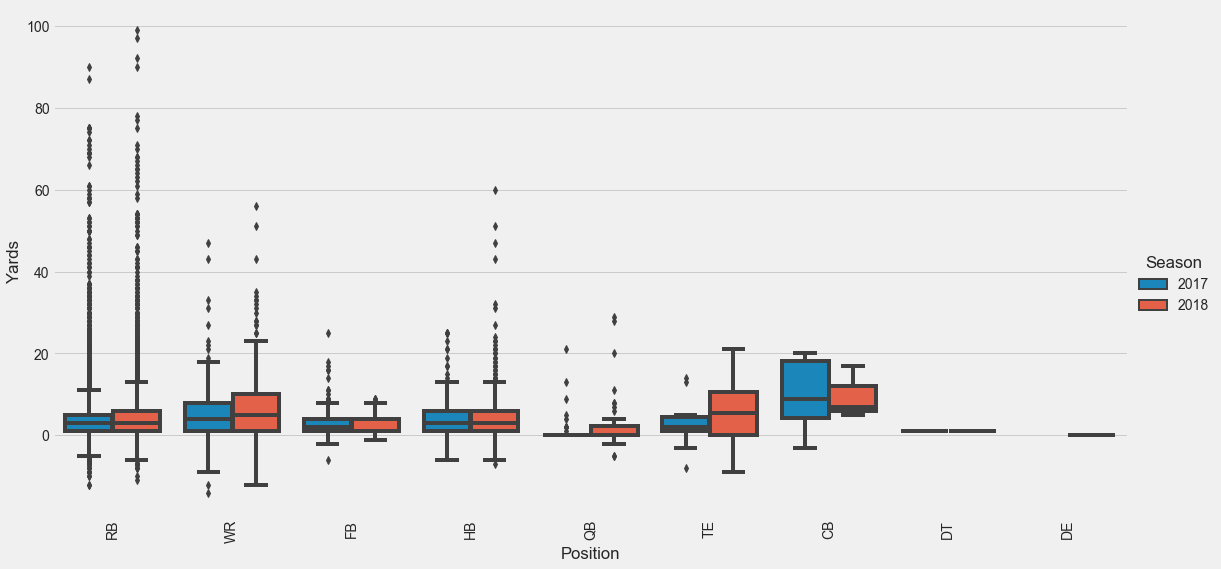

In [154]:
# Exibe o grafico de catPlot com a relacao entre o Posição Principal do Jogador e Jardas
g = sns.catplot(x='Position', y='Yards', hue='Season', data=train_jog, kind="box", height=8, aspect=2)
g.set_xticklabels(rotation=90)

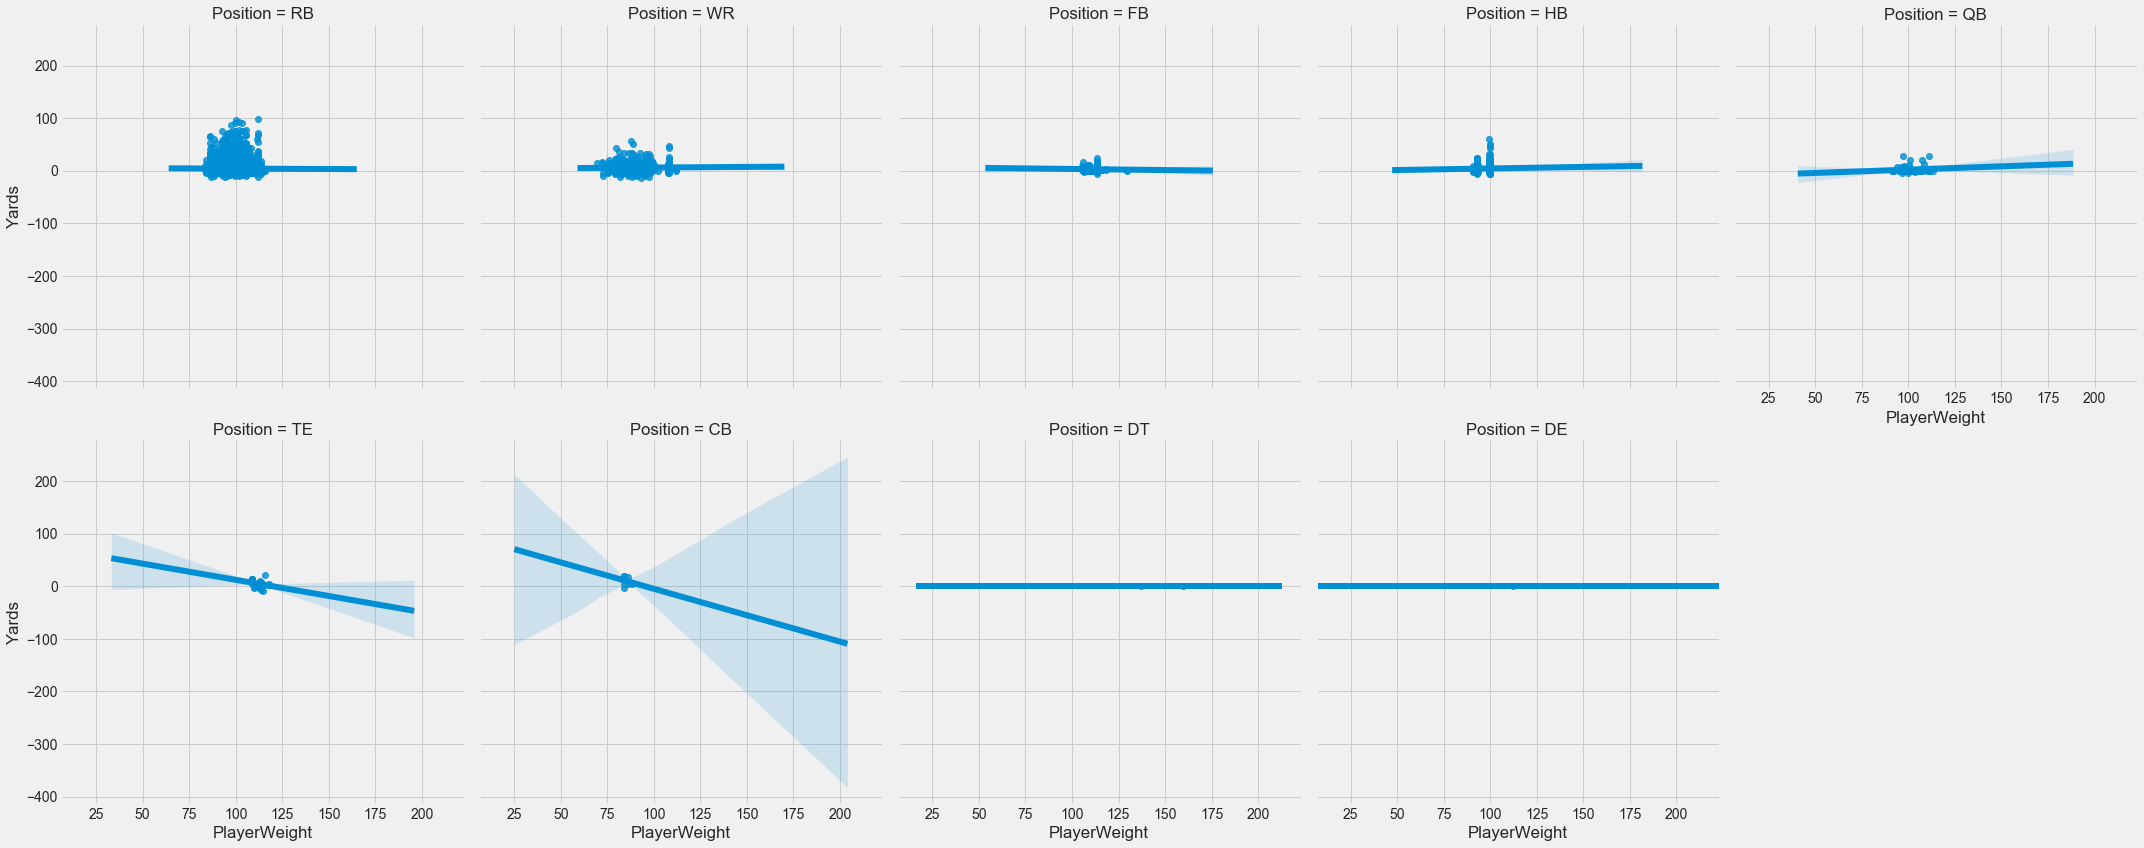

In [155]:
# Exibe o grafico linear com a relacao entre Peso, Posição e Jardas
g = sns.lmplot(x='PlayerWeight', y='Yards', data=train_jog, 
               x_jitter=.2, col="Position" , height=6, aspect=1, col_wrap=5)

### Analisando as variaveis gerais da PARTIDA
- **Season:** ano da temporada
- **Week:** semana do jogo
- **Team:** detalhes dos times: donos da casa ou visitante (home or away)
- **StadiumType:** nome do tipo do estádio de futebol americano
- **Stadium:** nome do estádio de futebol americano
- **Location:**: localização do estádio
- **Turf:** superfície do gramado do estádio
- **GameClock:** hora da partida
- **HomeTeamAbbr:** abreviação do time da casa
- **VisitorTeamAbbr:** abreviação do time visitante

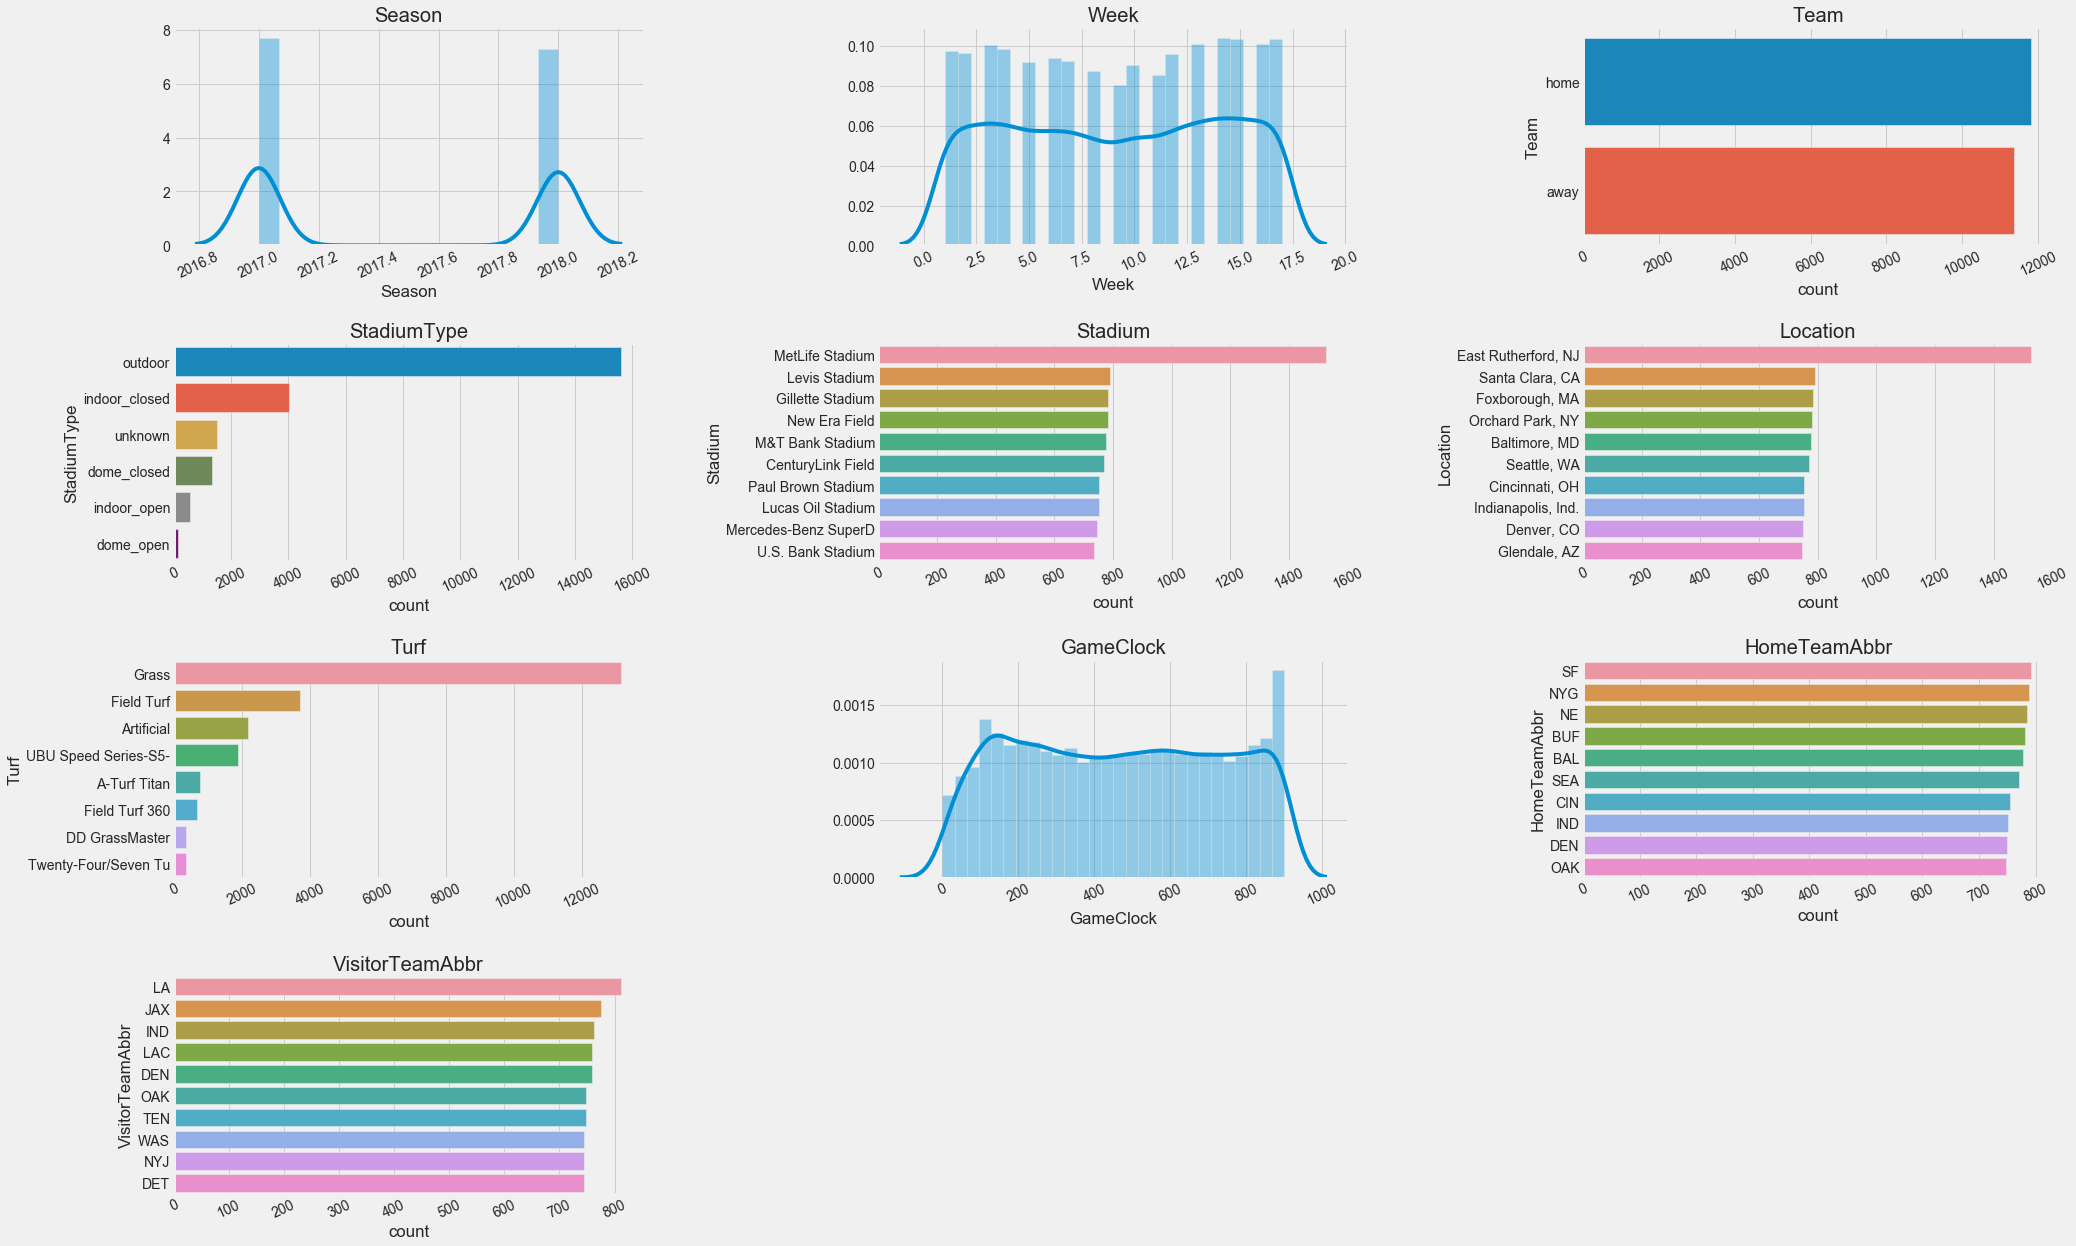

In [156]:
# Visualizando o grafico de distribuicao para cada feature do jogador
columns_to_plot = ['Season', 'Week', 'Team', 'StadiumType', 'Stadium', 
                   'Location', 'Turf', 'GameClock', 'HomeTeamAbbr', 'VisitorTeamAbbr']
plot_distribution(train_jog[columns_to_plot], cols=3, width=30, height=20, hspace=0.45, wspace=0.5)

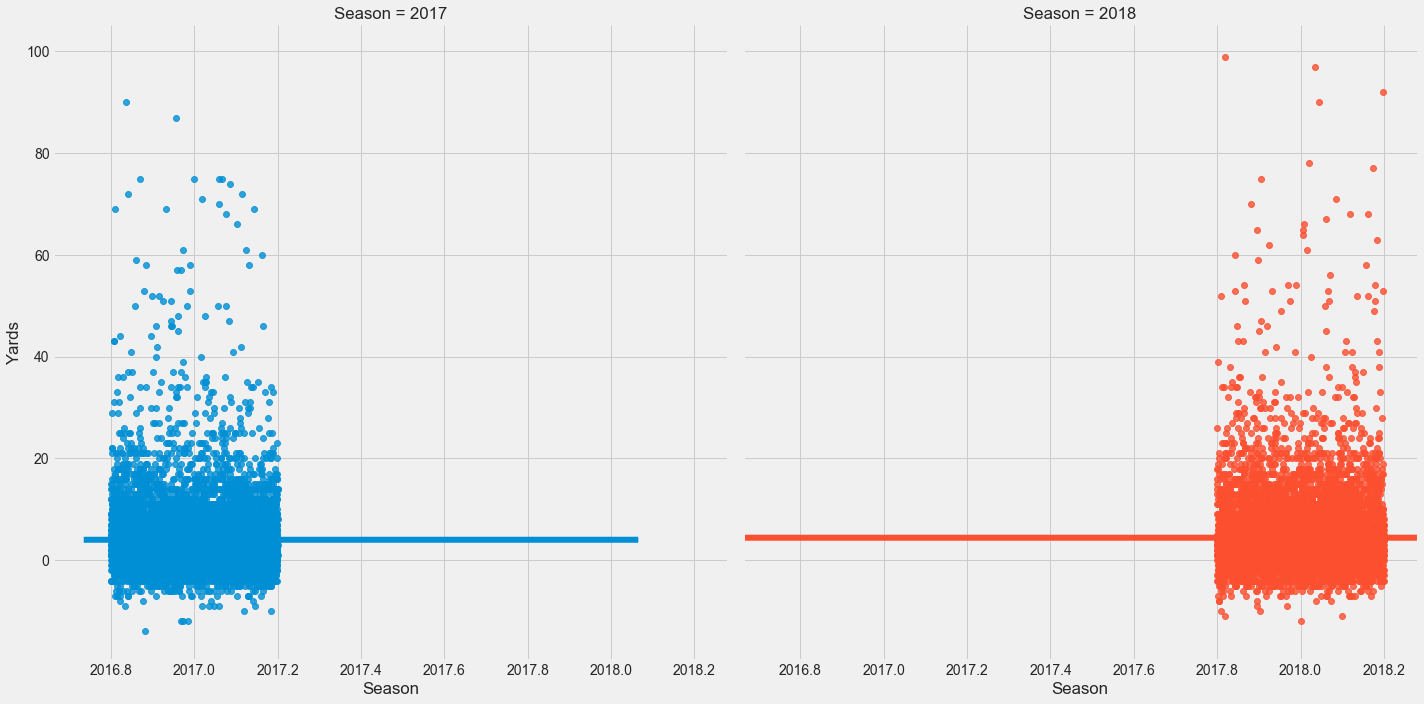

In [157]:
# Exibe o grafico linear com a relacao entre Season e Jardas
g = sns.lmplot(x='Season', y='Yards', hue='Season', data=train_jog, x_jitter=.2, col="Season" , height=10)

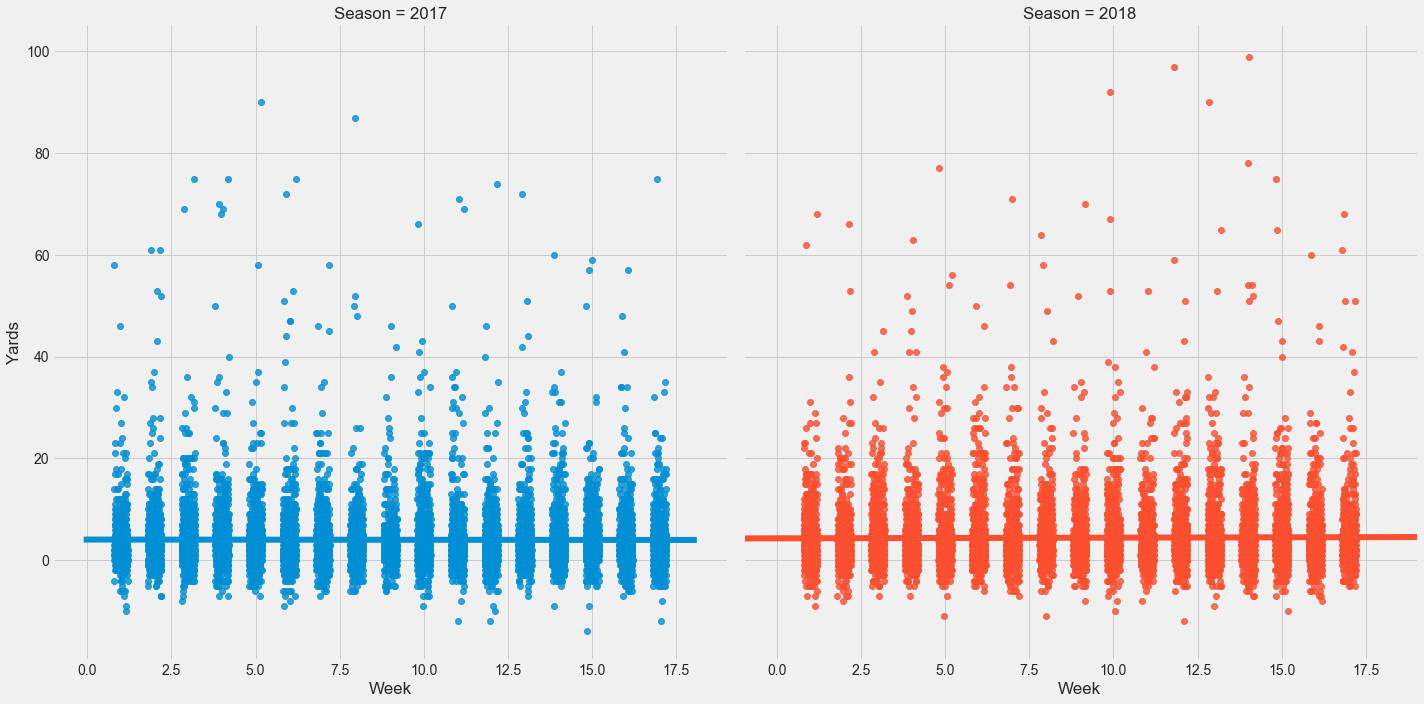

In [158]:
# Exibe o grafico linear com a relacao entre Season, Semana e Jardas
g = sns.lmplot(x='Week', y='Yards', hue='Season', data=train_jog, x_jitter=.2, col="Season" , height=10)

In [159]:
# Season tem uma correlação de 1.0 com GameId e PlayId. Exemplo abaixo com 2017 e 2018:
# GameId e PlayId contem o ano e mais algumas informacoes
# Parece ser o mes e o dia e mais um identificador
# Talvez seria necessario deixar a variavel GameId e PlayId somente com o indicador individual
tmp = train_jog.set_index('Season')
print(tmp.loc[[2017], ['GameId','PlayId']].head(1))
print(tmp.loc[[2018], ['GameId','PlayId']].head(1))

            GameId          PlayId
Season                            
2017    2017090700  20170907000118
            GameId          PlayId
Season                            
2018    2018090600  20180906000104


In [160]:
# Verificando quais sao os estadios que ficaram com tipo de estadio indefinido
# Sao tres estadios
# Vou dar uma olhada para saber se tem um tipo definido para eles
q1 = """SELECT StadiumType, Stadium
          FROM train
        WHERE StadiumType = 'unknown'
        GROUP BY StadiumType, Stadium"""
ps.sqldf(q1, locals())

StadiumType          Stadium
0     unknown  MetLife Stadium
1     unknown   StubHub Center
2     unknown  TIAA Bank Field

In [161]:
# Para o MetLife Stadium
# Vou tentar encaixar o tipo indefinido
q1 = """SELECT StadiumType, Stadium
          FROM train
        WHERE Stadium IN ('MetLife Stadium', 'StubHub Center', 'TIAA Bank Field')
        GROUP BY StadiumType, Stadium
        ORDER BY Stadium, StadiumType"""
ps.sqldf(q1, locals())

StadiumType          Stadium
0      outdoor  MetLife Stadium
1      unknown  MetLife Stadium
2      unknown   StubHub Center
3  indoor_open  TIAA Bank Field
4      outdoor  TIAA Bank Field
5      unknown  TIAA Bank Field

In [162]:
# MetLife Stadium só tem OUTDOOR
# Vou atribuir o tipo indefinido para outdoor
from IPython.display import Image
Image(url = '../images/MetLife_Stadium.jpeg',width=400,height=400)

In [163]:
# StubHub Center so tem OUTDOOR
# Vou atribuir o tipo indefinido para outdoor
from IPython.display import Image
Image(url = '../images/StubHub_center.jpg',width=400,height=400)

In [164]:
# Corrigindo a feature Stadium
train_jog.loc[train_jog['Stadium'] == 'MetLife Stadium', 'StadiumType'] = 'outdoor'
train_jog.loc[train_jog['Stadium'] == 'StubHub Center', 'StadiumType'] = 'outdoor'

In [165]:
# Vista do estadio Mercedes_Benz onde tem varios tipos de modos de jogo
from IPython.display import Image
Image(url = '../images/Mercedes_Benz Stadium.jpg',width=400,height=400)

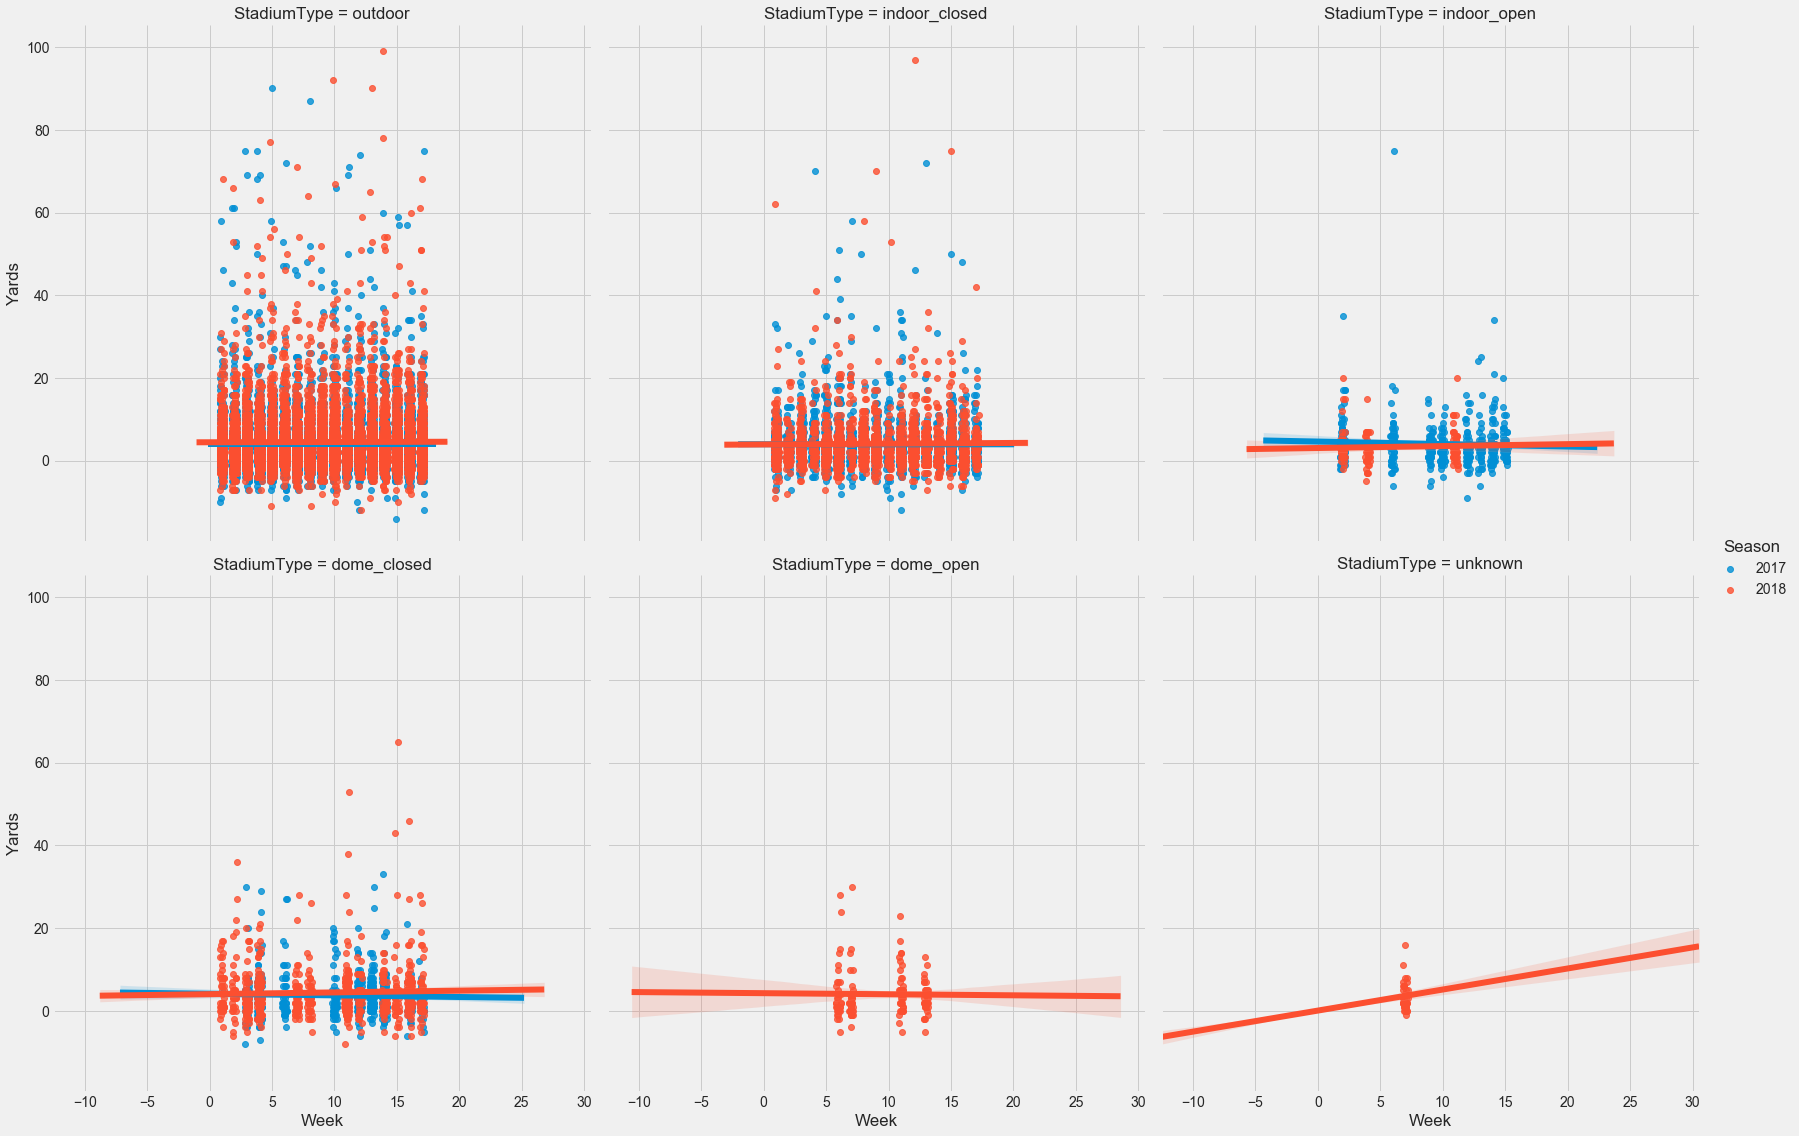

In [166]:
# Exibe o grafico linear com a relacao entre Semana, Tipo de Estadio, Temporada e Jardas
g = sns.lmplot(x='Week', y='Yards', hue='Season', data=train_jog, 
               x_jitter=.2, col="StadiumType" , height=8, col_wrap=3)

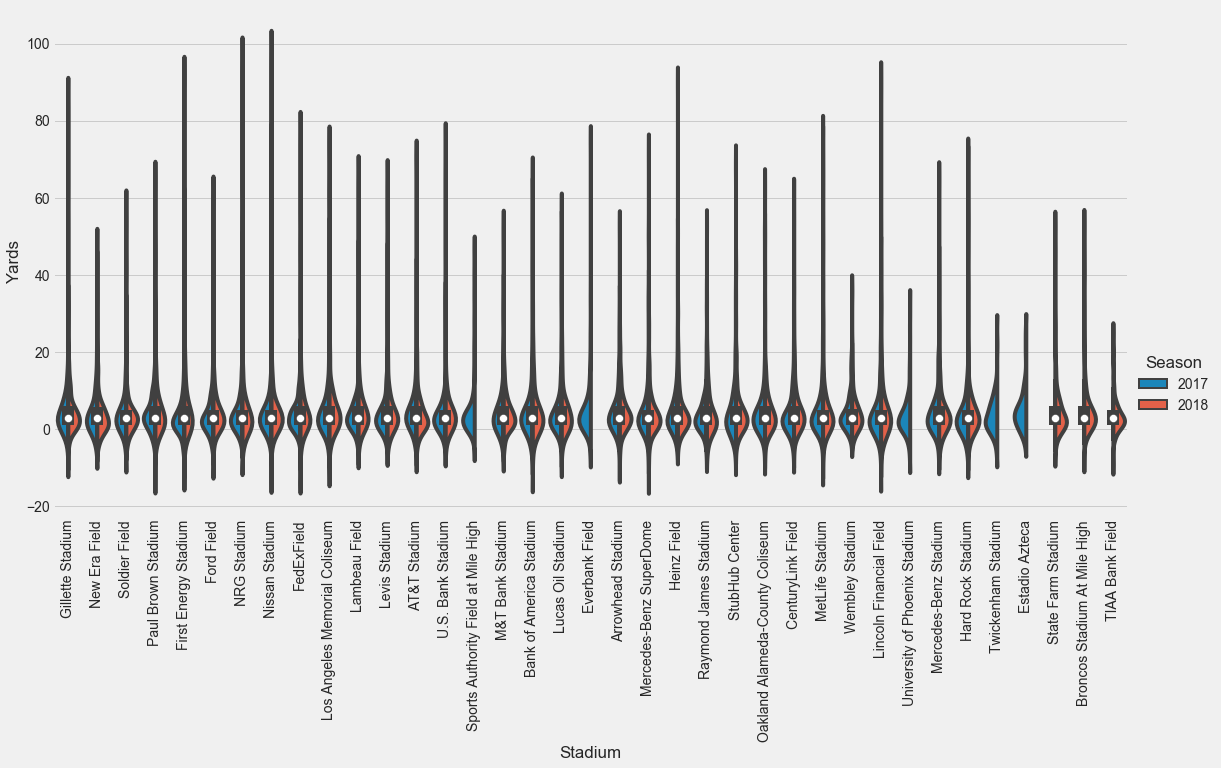

In [167]:
# Exibe o grafico de scatterPlot com a relacao entre Estadio e Jardas
g = sns.catplot(x='Stadium', y='Yards', hue='Season', data=train_jog, 
                kind="violin", split=True, height=8, aspect=2)
g.set_xticklabels(rotation=90)

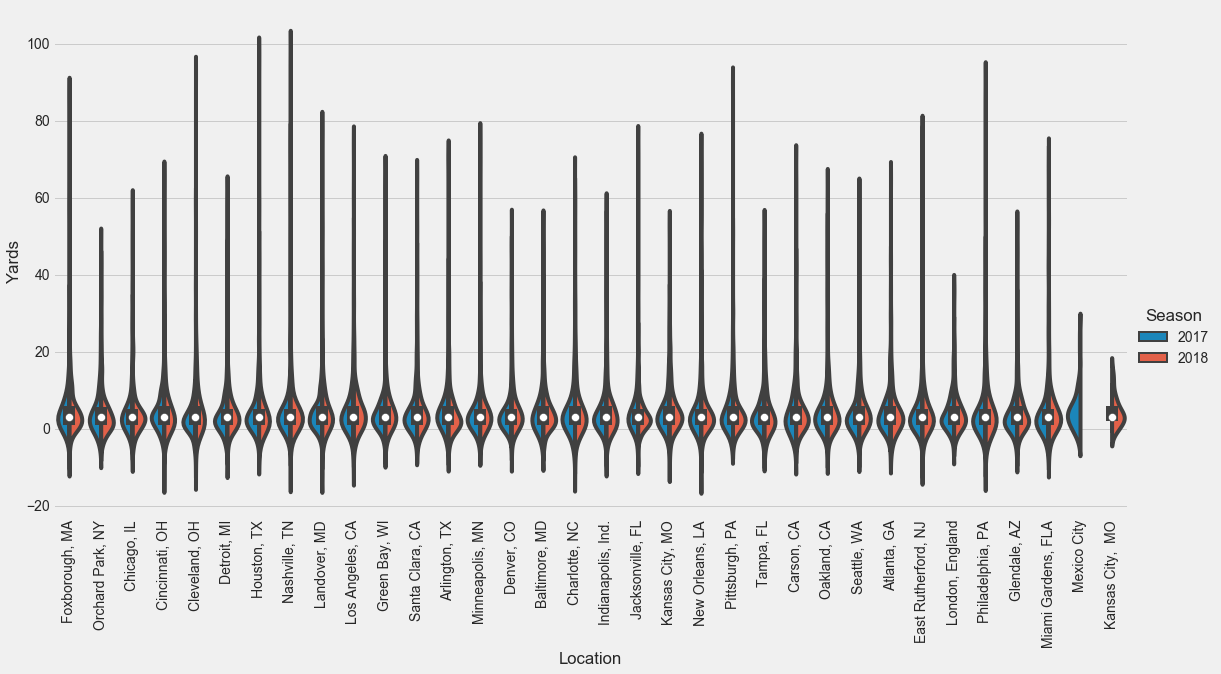

In [168]:
# Exibe o grafico de scatterPlot com a relacao entre Estadio e Jardas
g = sns.catplot(x='Location', y='Yards', hue='Season', data=train_jog, 
                kind="violin", split=True, height=8, aspect=2)
g.set_xticklabels(rotation=90)

In [169]:
# description of the field surface
# Tipos de gramados dos estadios
train_jog.groupby('Turf').size()

Turf
A-Turf Titan                782
Artificial                 2199
DD GrassMaster              367
Field Turf                 3721
Field Turf 360              693
Grass                     13160
Twenty-Four/Seven Turf      365
UBU Speed Series-S5-M      1884
dtype: int64

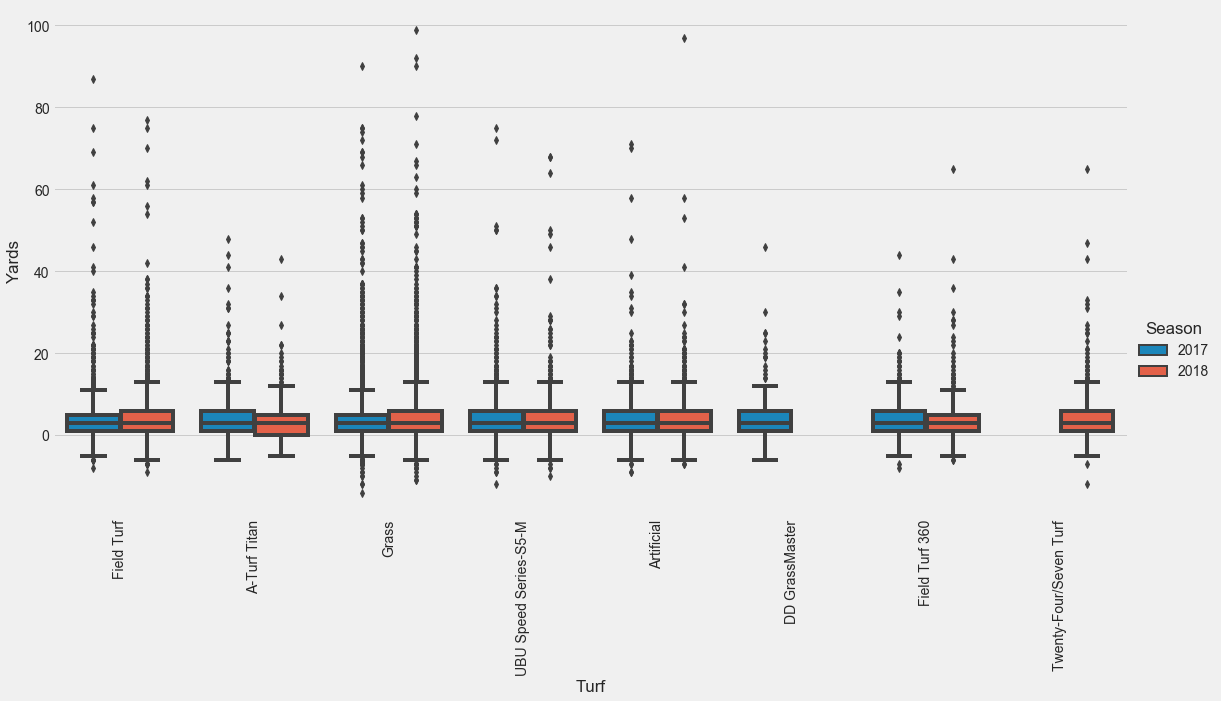

In [170]:
# Exibe o grafico de catPlot com a relacao entre Estadio e Jardas
g = sns.catplot(x='Turf', y='Yards', hue='Season', data=train_jog, kind="box", height=8, aspect=2)
g.set_xticklabels(rotation=90)

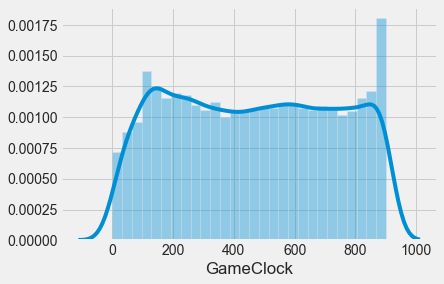

In [171]:
# Exibe o grafico de distribuicao da feature GameClock
g = sns.distplot(train_jog['GameClock'])

### Analisando as variaveis gerais do AMBIENTE
- **GameWeather:** clima
- **Temperature:** temperatura ambiente (em Fahrenheit)
- **Humidity:** umidade do ar
- **WindDirection:** direção do vento
- **WindSpeed:** velocidade do vento

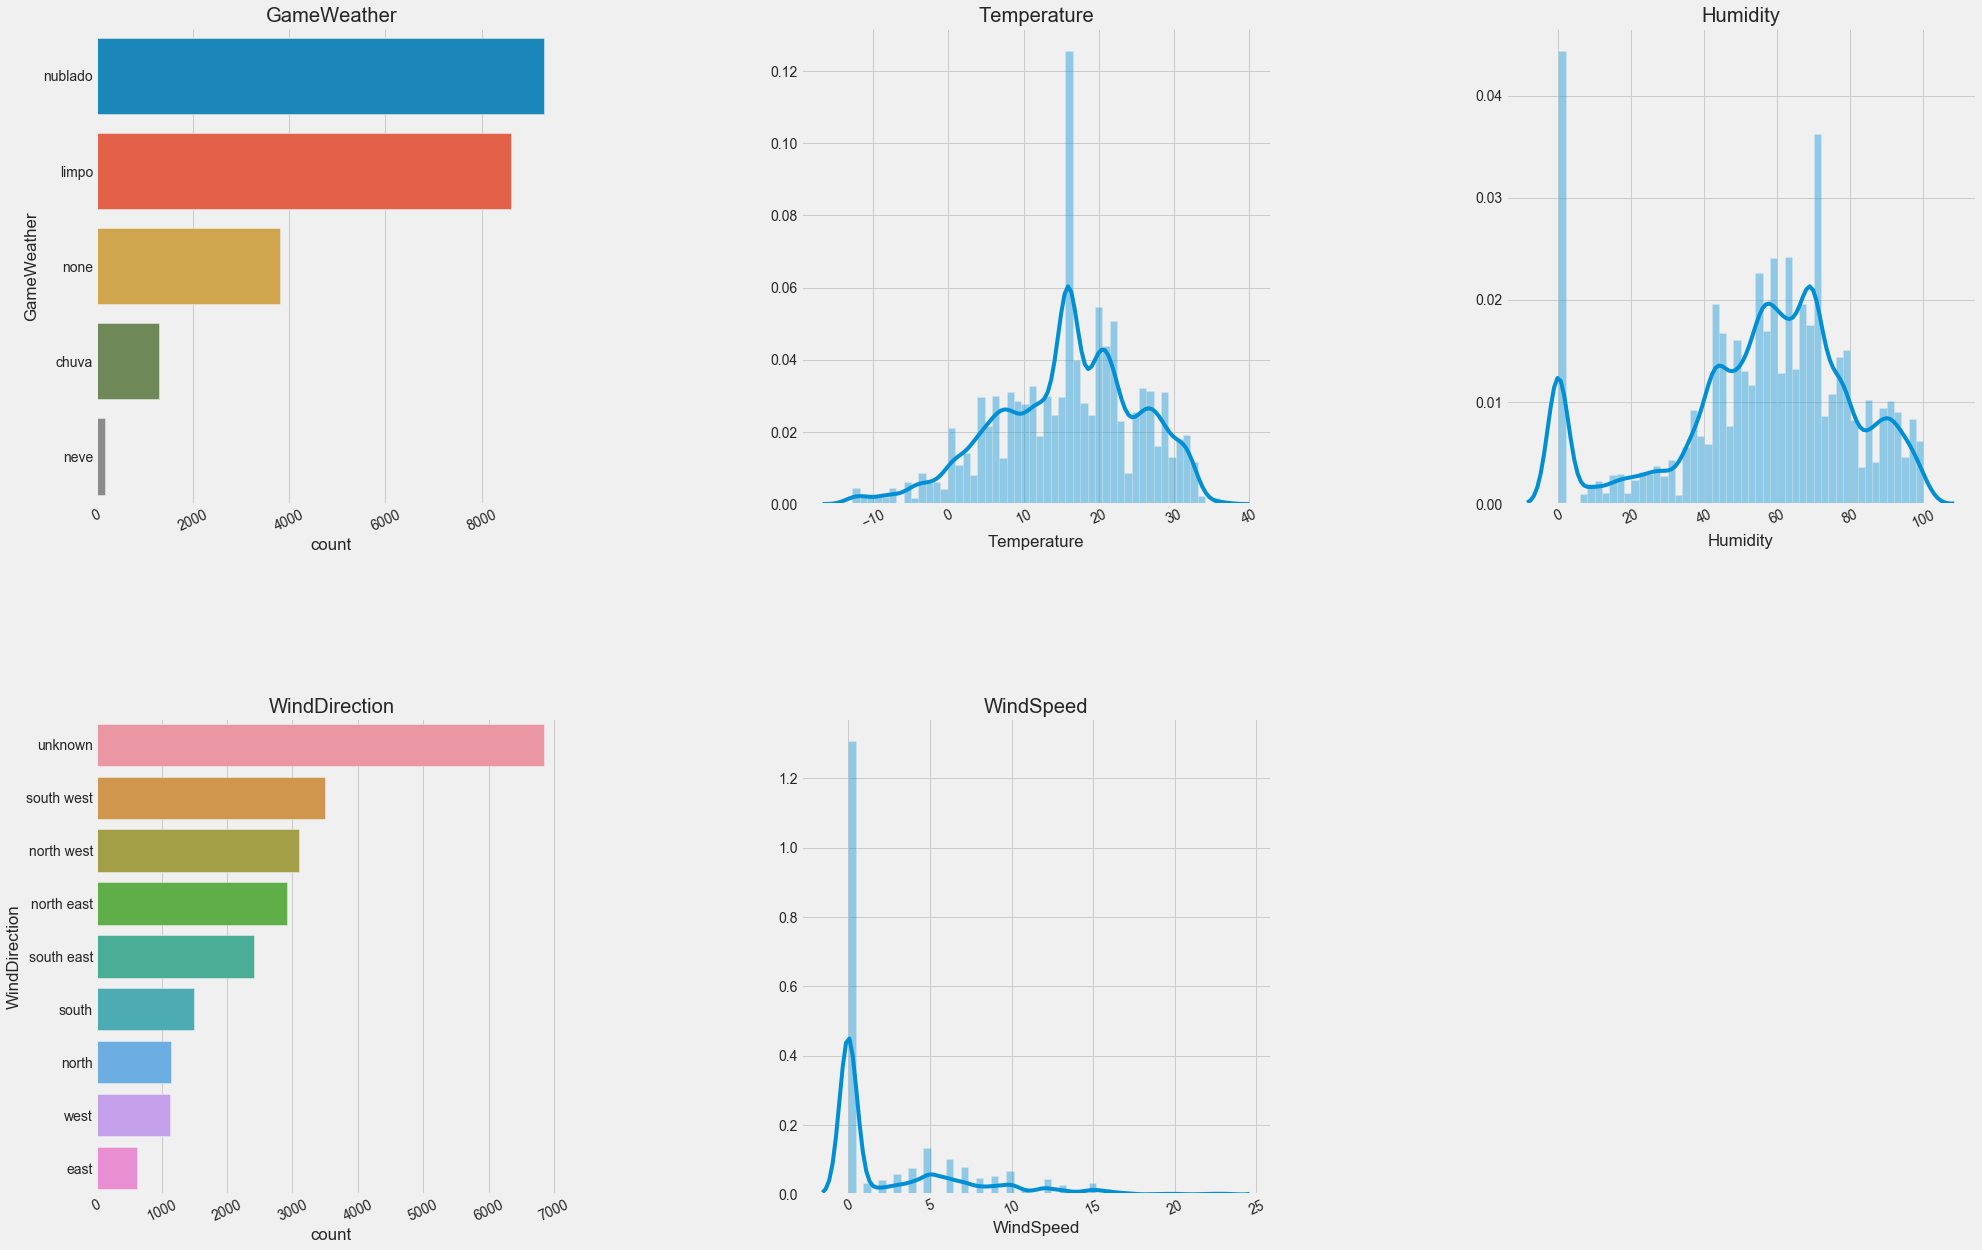

In [172]:
# Visualizando o grafico de distribuicao para cada feature do ambiente
columns_to_plot = ['GameWeather', 'Temperature', 'Humidity', 'WindDirection', 'WindSpeed']
plot_distribution(train_jog[columns_to_plot], cols=3, width=30, height=20, hspace=0.45, wspace=0.5)

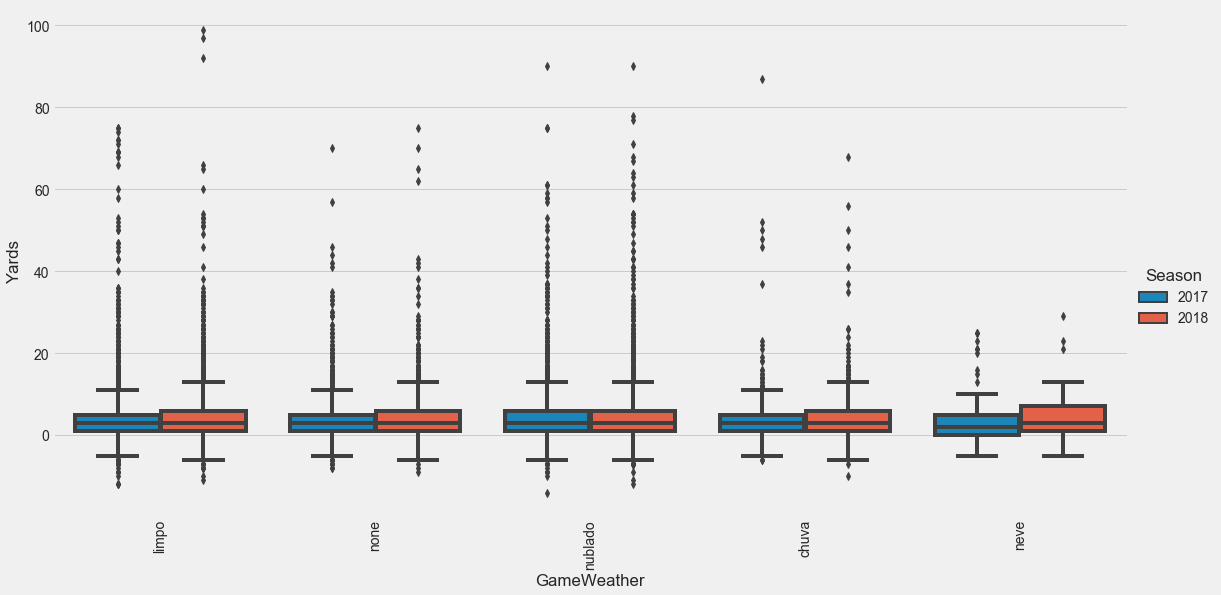

In [173]:
# Exibe o grafico de catPlot com a relacao entre o clima e Jardas
g = sns.catplot(x='GameWeather', y='Yards', hue='Season', data=train_jog, kind="box", height=8, aspect=2)
g.set_xticklabels(rotation=90)

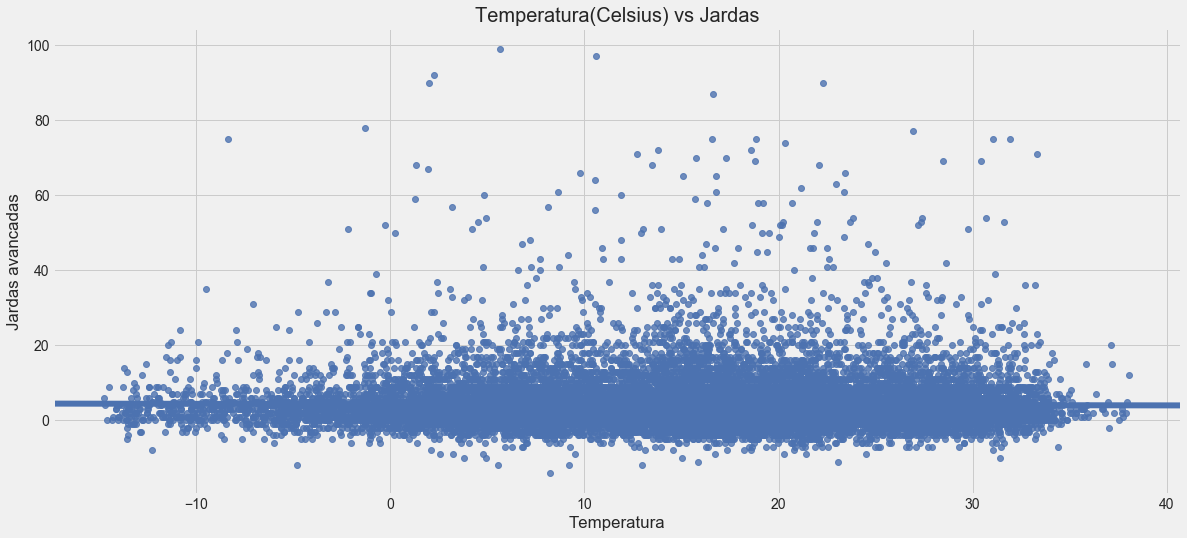

In [174]:
# Exibe o grafico de scatterPlot com a relacao entre Temperatura e Jardas
plt.figure(figsize=(18, 8))
sns.regplot(x='Temperature', y='Yards', data=train_jog, color='b', x_jitter=2)
plt.xlabel('Temperatura')
plt.ylabel('Jardas avancadas')
plt.title('Temperatura(Celsius) vs Jardas', fontsize=20)
plt.show()

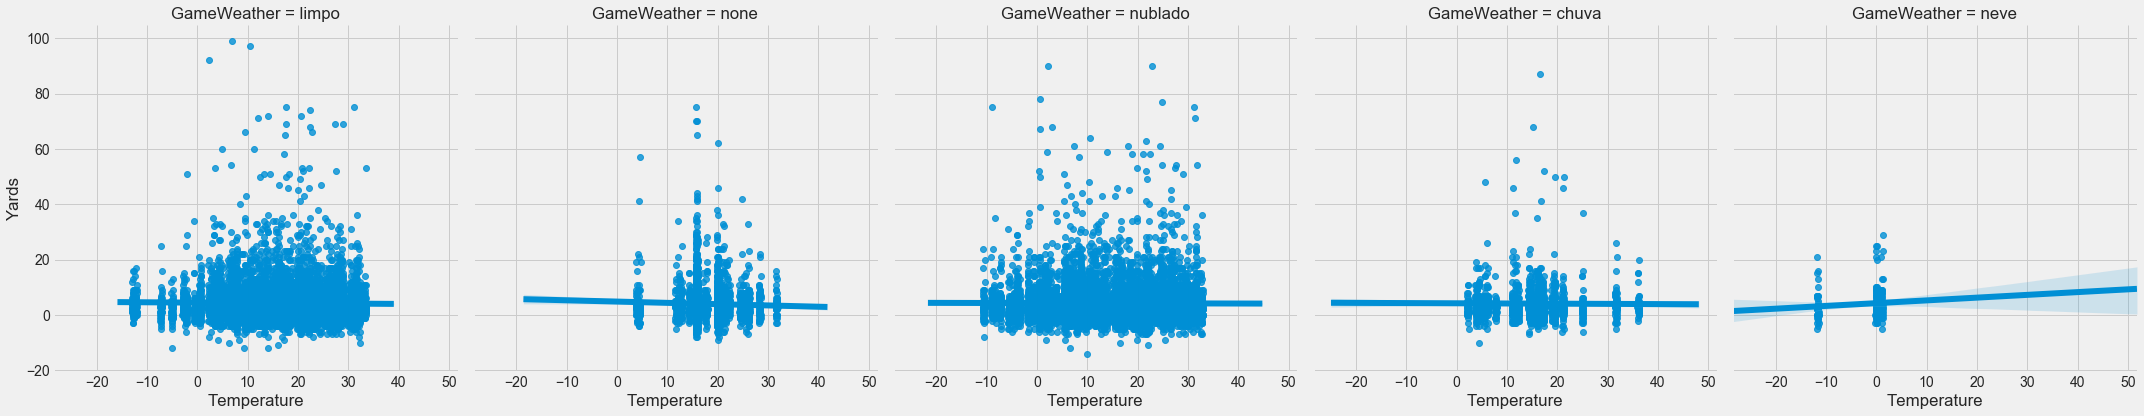

In [175]:
# Exibe o grafico linear com a relacao entre Temperatura, Clima e Jardas
g = sns.lmplot(x='Temperature', y='Yards', data=train_jog, 
               x_jitter=.2, col="GameWeather" , height=6, aspect=1)

In [176]:
# Tem muitos registros com umidade 0
# Talvez seja melhor fazer um tratamento
train_jog['Humidity'].value_counts().head()

0.0     2057
70.0    1314
56.0     610
67.0     604
42.0     581
Name: Humidity, dtype: int64

In [177]:
train_jog['Humidity'].describe()

count    23171.000000
mean        55.646062
std         25.277374
min          0.000000
25%         44.000000
50%         59.000000
75%         71.000000
max        100.000000
Name: Humidity, dtype: float64

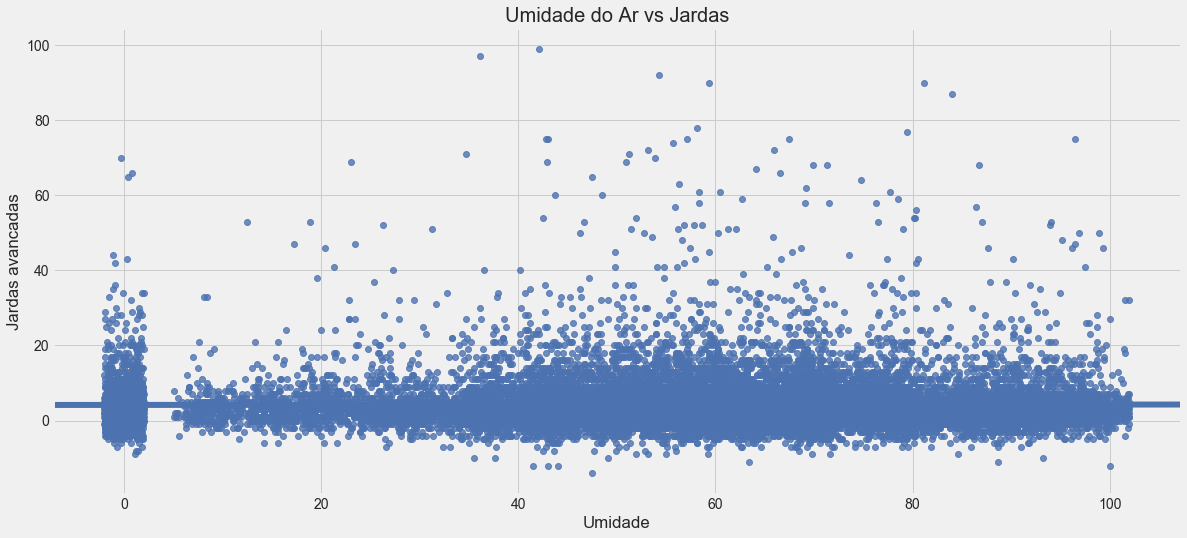

In [178]:
# Exibe o grafico de scatterPlot com a relacao entre Temperatura e Jardas
plt.figure(figsize=(18, 8))
sns.regplot(x='Humidity', y='Yards', data=train_jog, color='b', x_jitter=2)
plt.xlabel('Umidade')
plt.ylabel('Jardas avancadas')
plt.title('Umidade do Ar vs Jardas', fontsize=20)
plt.show()

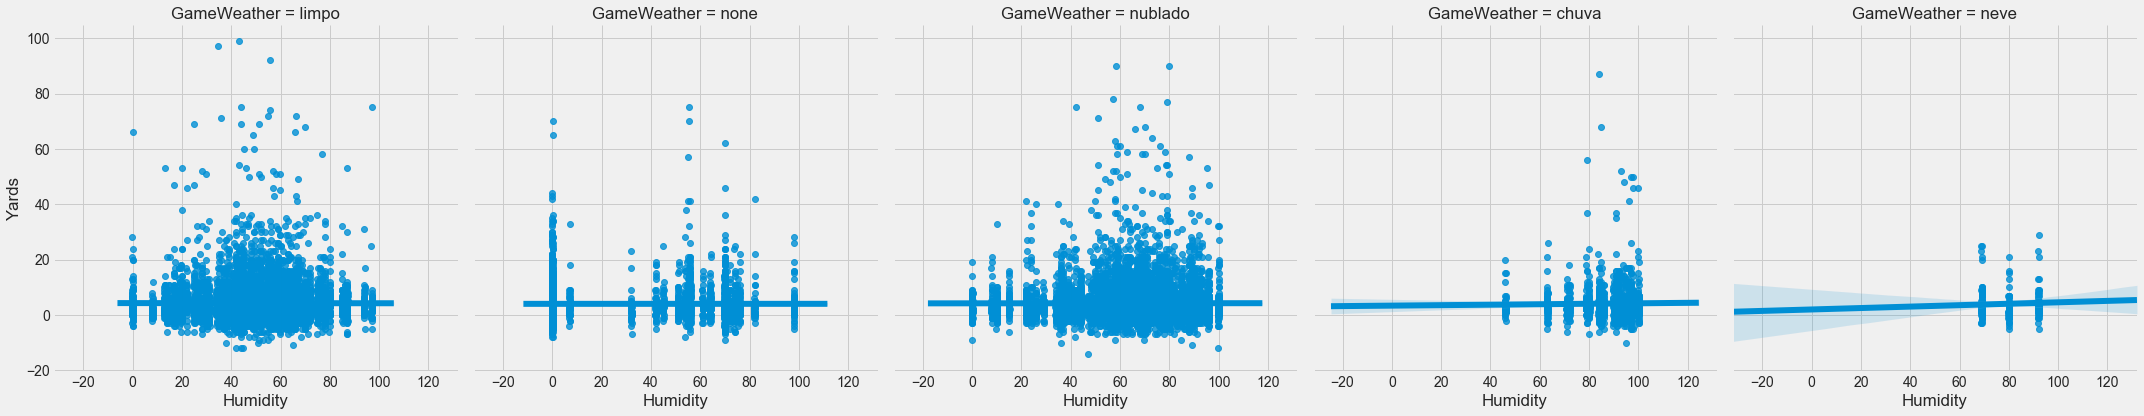

In [179]:
# Exibe o grafico linear com a relacao entre Umidade, Clima e Jardas
# A maioria da umidade 0 está no clima NONE
g = sns.lmplot(x='Humidity', y='Yards', data=train_jog, 
               x_jitter=.2, col="GameWeather" , height=6, aspect=1)

In [180]:
train_jog['WindDirection'].value_counts()

unknown       6847
south west    3505
north west    3104
north east    2923
south east    2409
south         1499
north         1140
west          1130
east           614
Name: WindDirection, dtype: int64

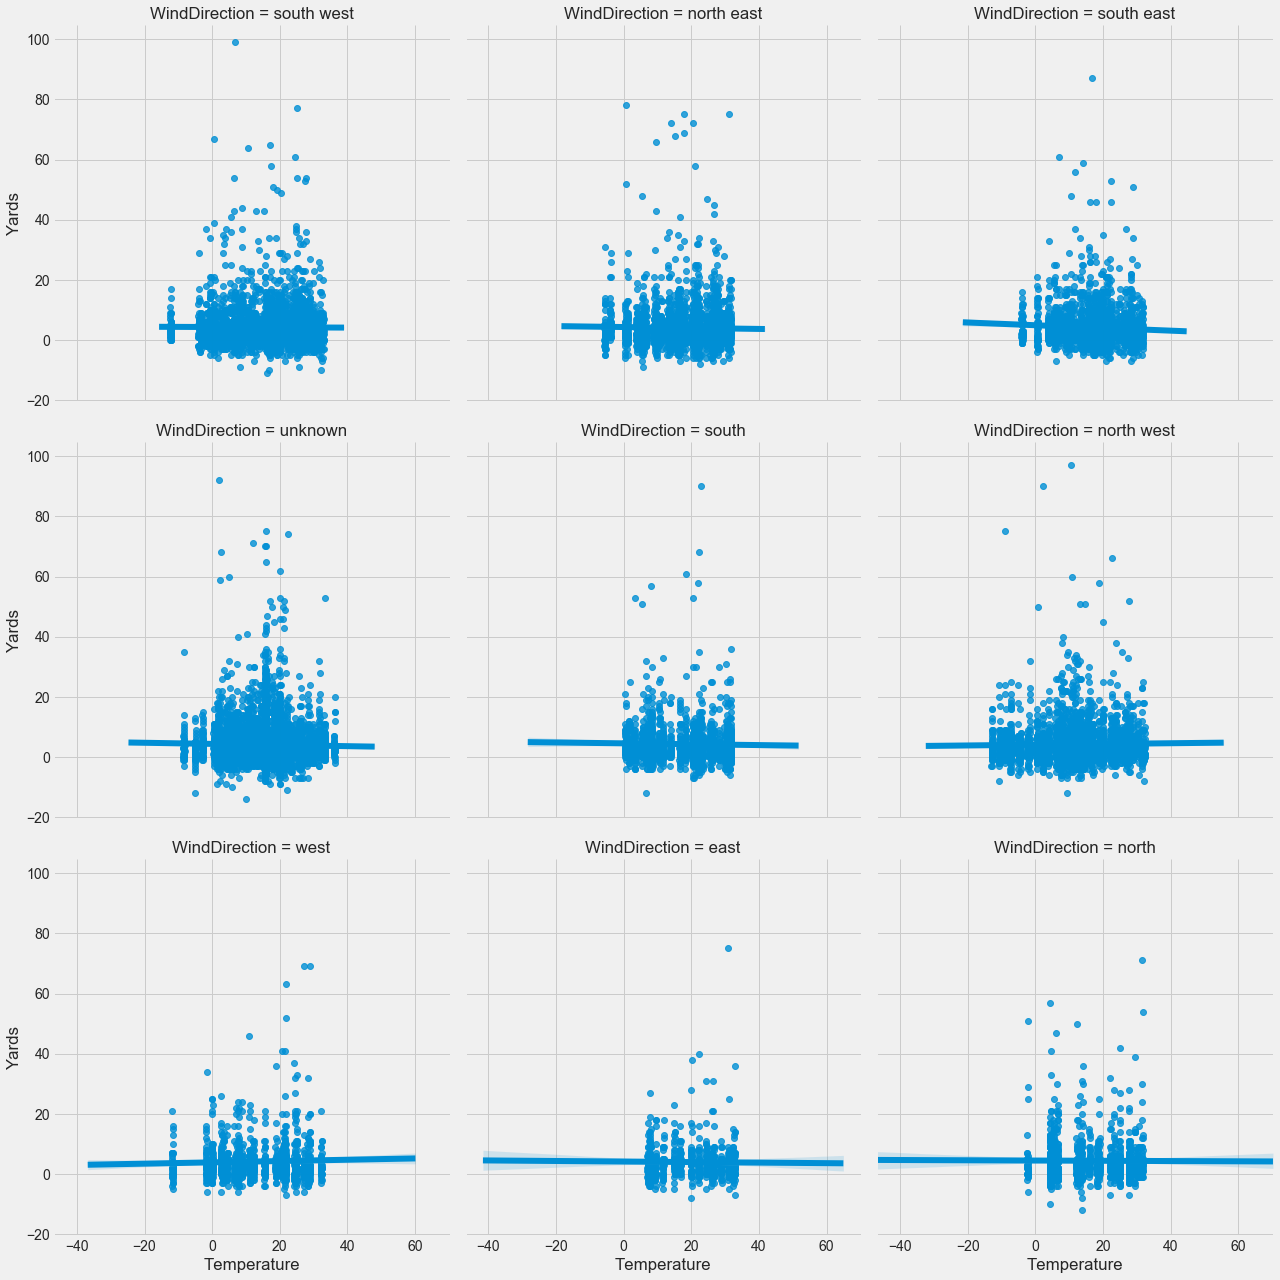

In [181]:
# Exibe o grafico linear com a relacao entre Temperatura, Direcao do Vento e Jardas
g = sns.lmplot(x='Temperature', y='Yards', data=train_jog, 
               x_jitter=.2, col="WindDirection" , height=6, aspect=1, col_wrap=3)

In [182]:
train_jog['WindSpeed'].value_counts().head()

0    13933
5     1437
6     1103
7      846
4      828
Name: WindSpeed, dtype: int64

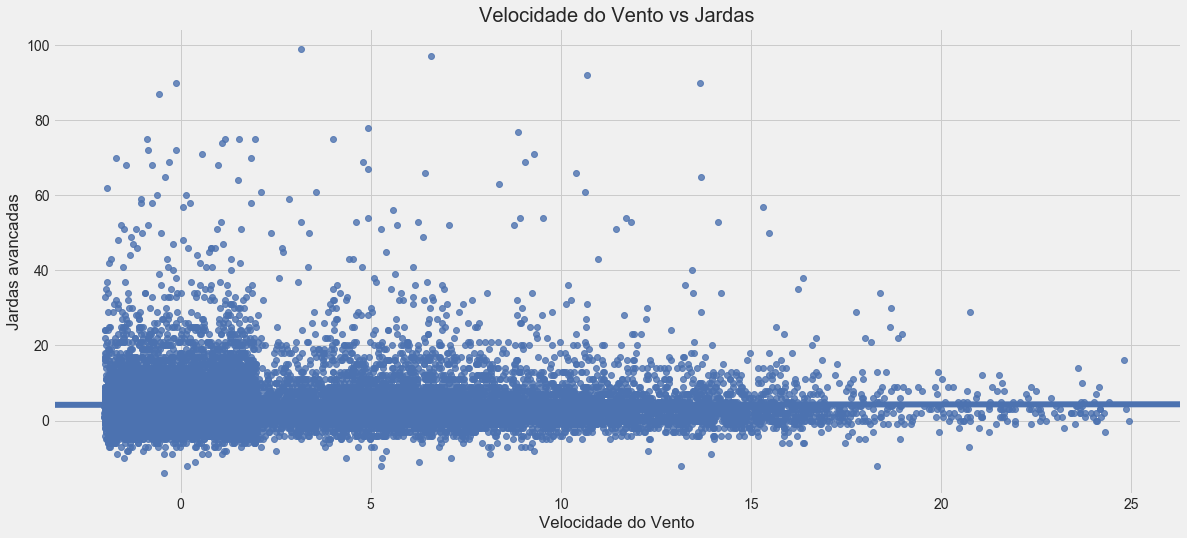

In [183]:
# Exibe o grafico de scatterPlot com a relacao entre Velocidade do Vento e Jardas
plt.figure(figsize=(18, 8))
sns.regplot(x='WindSpeed', y='Yards', data=train_jog, color='b', x_jitter=2)
plt.xlabel('Velocidade do Vento')
plt.ylabel('Jardas avancadas')
plt.title('Velocidade do Vento vs Jardas', fontsize=20)
plt.show()

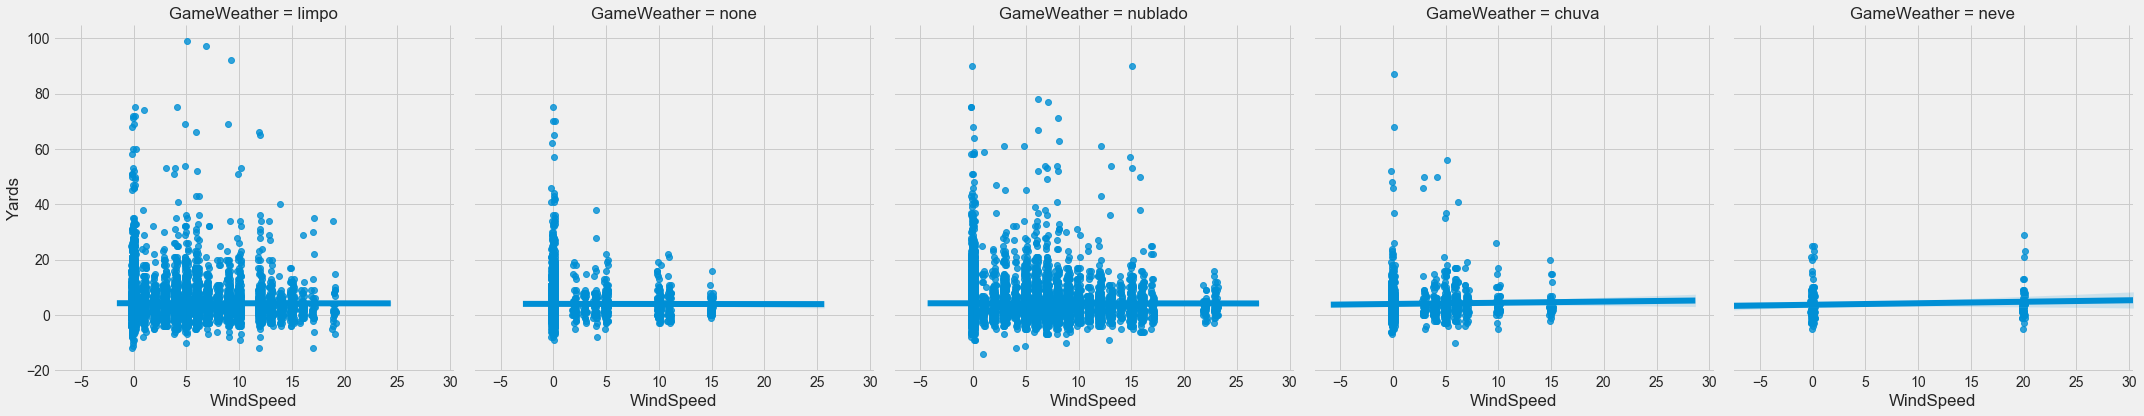

In [184]:
# Exibe o grafico linear com a relacao entre Velocidade do Vento, Clima e Jardas
# A maioria da umidade 0 está no clima NONE
g = sns.lmplot(x='WindSpeed', y='Yards', data=train_jog, 
               x_jitter=.2, col="GameWeather" , height=6, aspect=1)

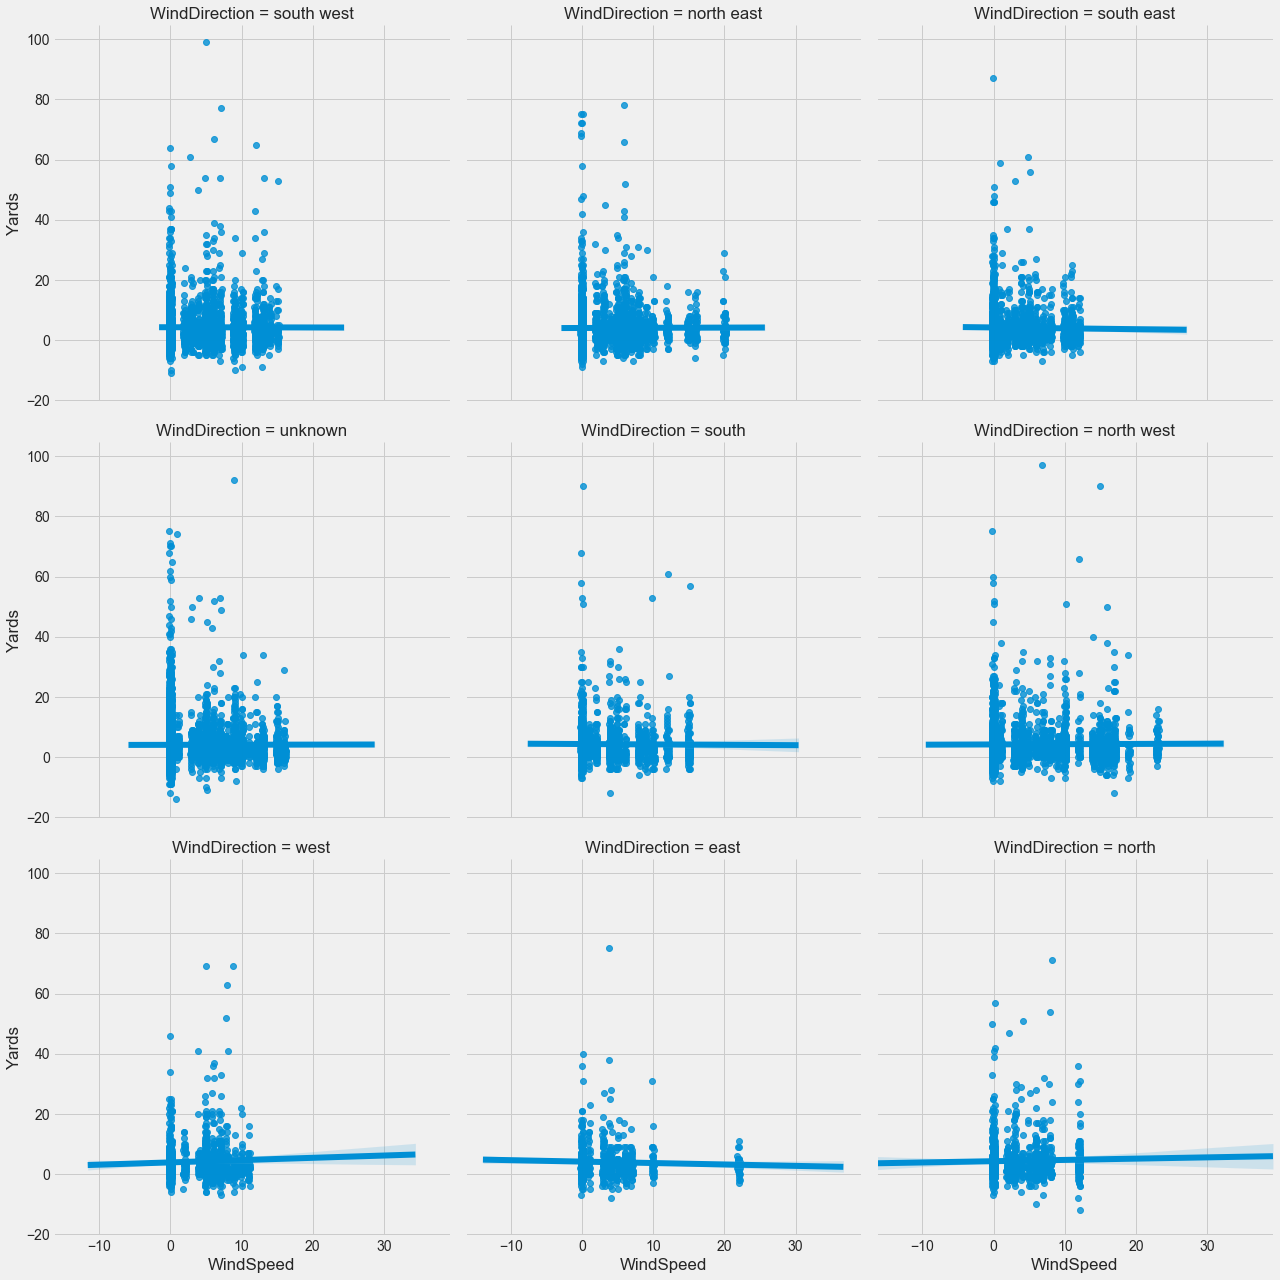

In [185]:
# Exibe o grafico linear com a relacao entre Velocidade do Vento, Direcao do Vento e Jardas
g = sns.lmplot(x='WindSpeed', y='Yards', data=train_jog, 
               x_jitter=.2, col="WindDirection" , height=6, aspect=1, col_wrap=3)

### Analisando as variaveis gerais da JOGADA (PlayId)
- **HomeScoreBeforePlay:** score do time da casa antes da jogada iniciar
- **VisitorScoreBeforePlay:** score do time visitante antes da jogada iniciar
- **PossessionTeam:** time com a posse
- **FieldPosition:** de que lado do campo a jogada está acontecendo
- **Quarter:** quarter do jogo (1-5, 5 = overtime)
- **PlayDirection:** direção da jogada
- **OffensePersonnel:** posição de agrupamento da equipe ofensiva
- **DefensePersonnel:** posição de agrupamento da equipe defensiva
- **OffenseFormation:** formação ofensiva
- **DefendersInTheBox:** número de defensores alinhados perto da linha de scrimmage, abrangendo a largura da linha ofensiva
- **TimeSnap:** hora (UTC) do momento que é arremessada a bola
- **TimeHandoff:** hora (UTC) do momento que o corredor pega a bola lançada
- **Down:**
- **Distance:** jardas que a equipe precisa para fazer a primeira descida
- **Dis:**
- **YardLine:** a linha de jarda da linha de scrimmage
- **X:** velocidade (em jardas/segundo)
- **A:** aceleração (em jardas/segundo^2)

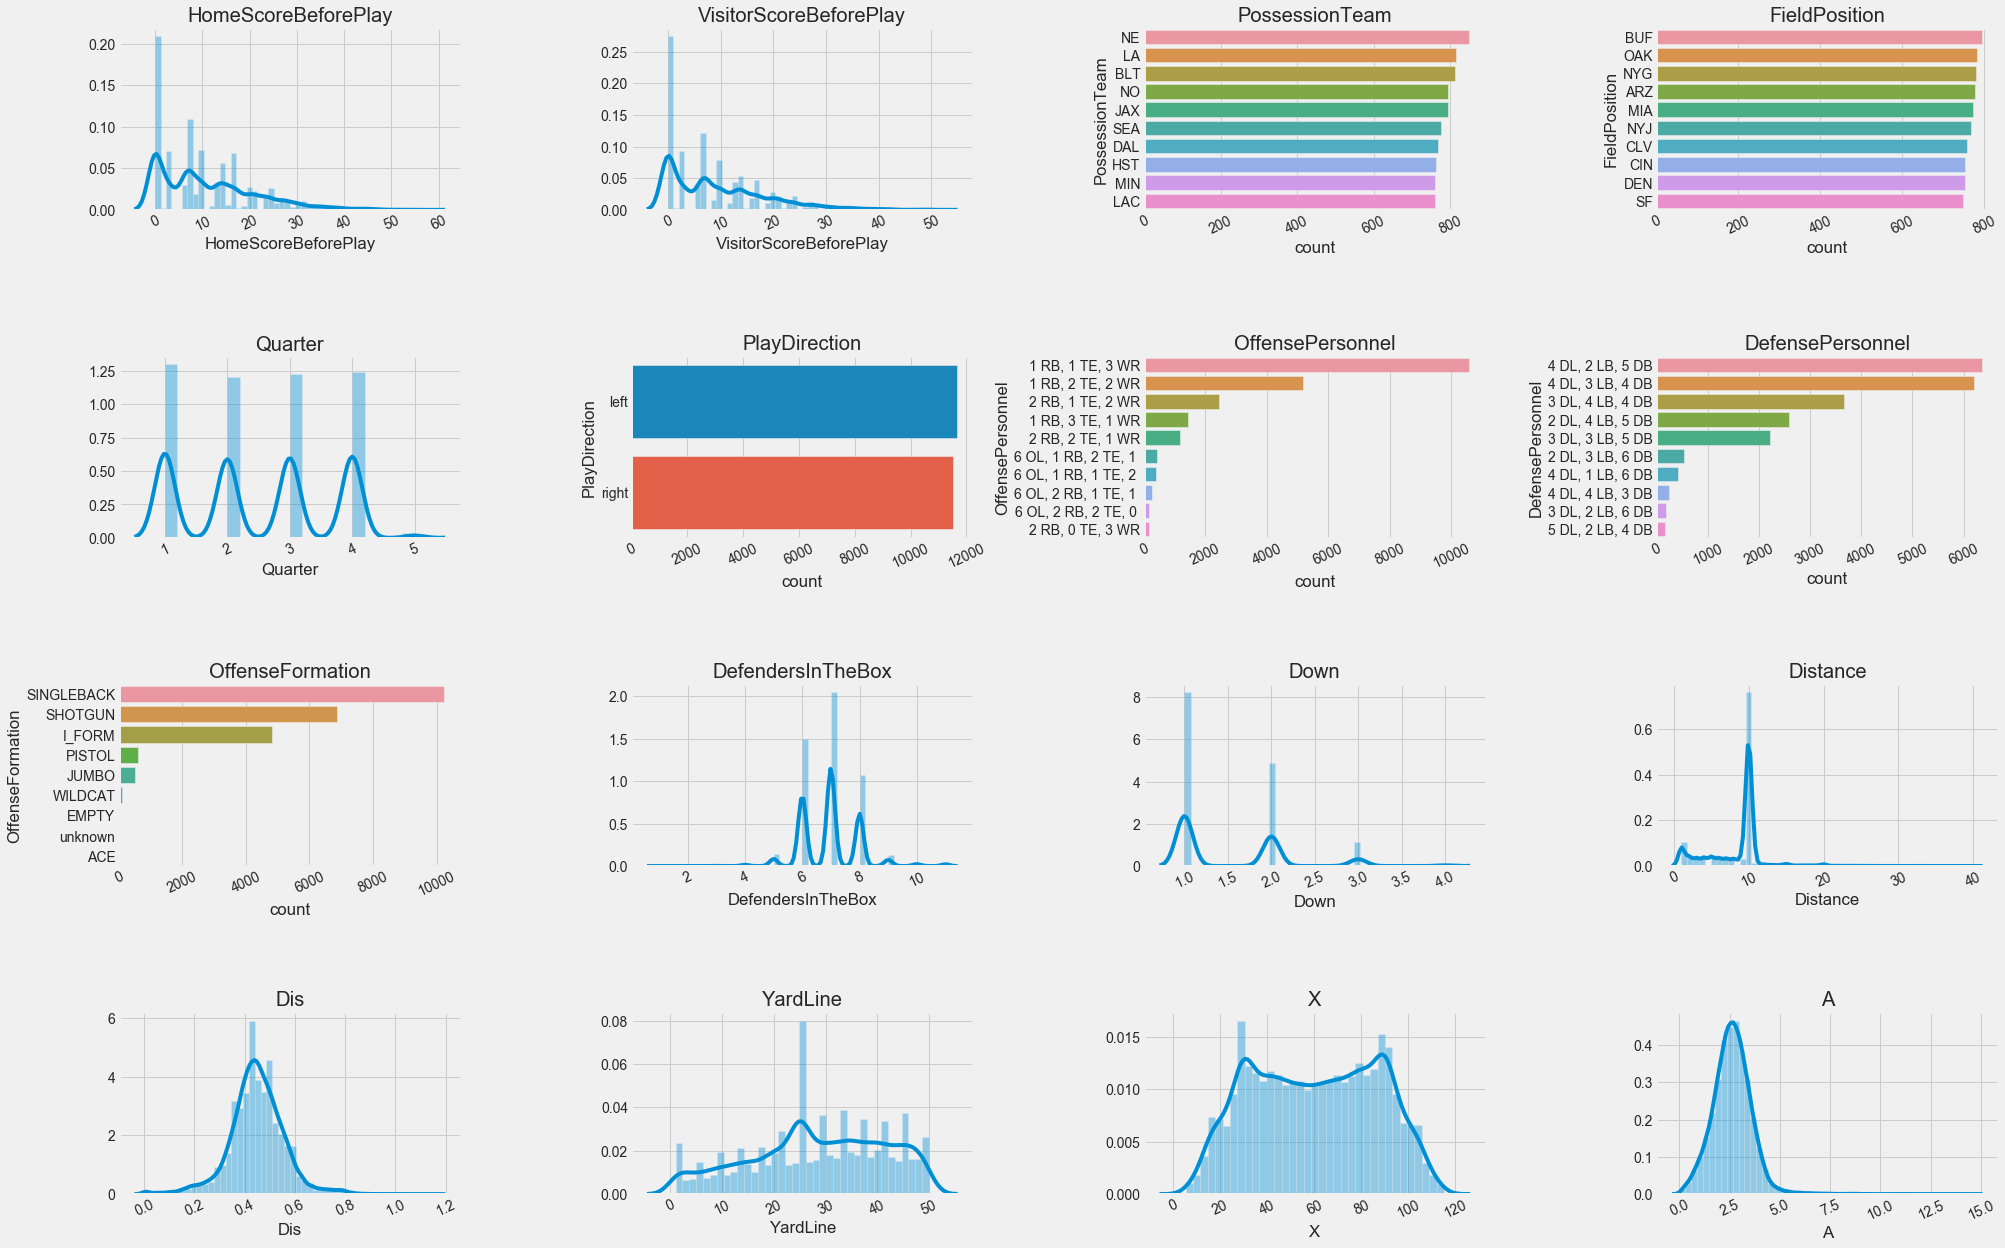

In [186]:
# Visualizando o grafico de distribuicao para cada feature do ambiente
columns_to_plot = ['HomeScoreBeforePlay', 'VisitorScoreBeforePlay', 'PossessionTeam', 'FieldPosition', 'Quarter',
                   'PlayDirection','OffensePersonnel','DefensePersonnel','OffenseFormation','DefendersInTheBox',
                   'Down','Distance','Dis','YardLine','X','A']
plot_distribution(train_jog[columns_to_plot], cols=4, width=30, height=20, hspace=0.8, wspace=0.5)

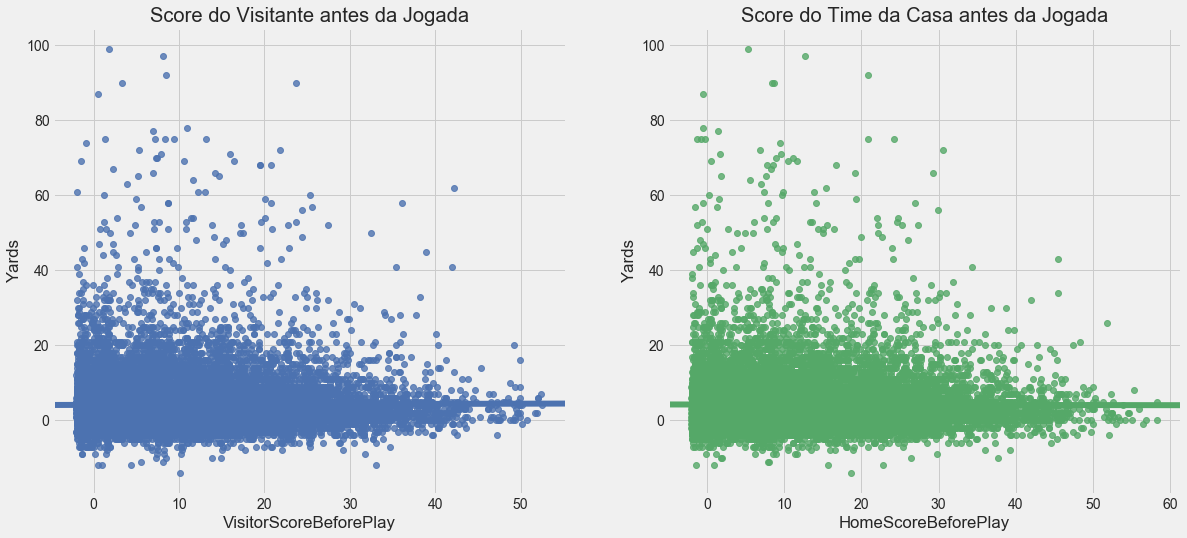

In [187]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 8))

ax1.set_title('Score do Visitante antes da Jogada')
sns.regplot(x='VisitorScoreBeforePlay', y='Yards', data=train_jog, color='b', x_jitter=2, ax=ax1)

ax2.set_title('Score do Time da Casa antes da Jogada')
sns.regplot(x='HomeScoreBeforePlay', y='Yards', data=train_jog, color='g', x_jitter=2, ax=ax2)

plt.show()

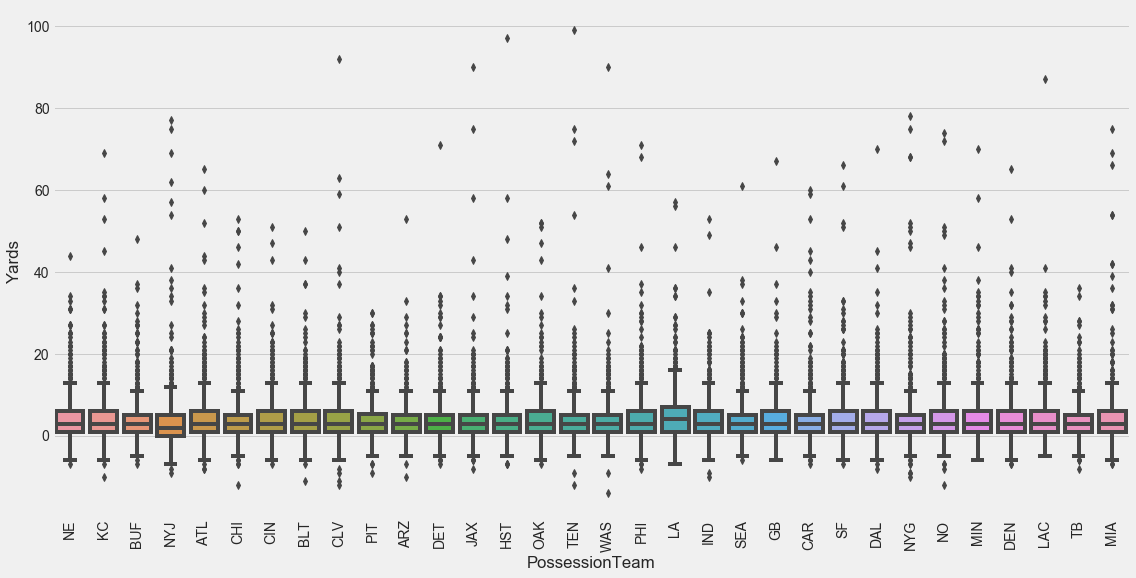

In [188]:
# Exibe o grafico de catPlot com a relacao entre PossessionTeam e Jardas
g = sns.catplot(x='PossessionTeam', y='Yards', data=train_jog, kind="box", height=8, aspect=2)
g.set_xticklabels(rotation=90)

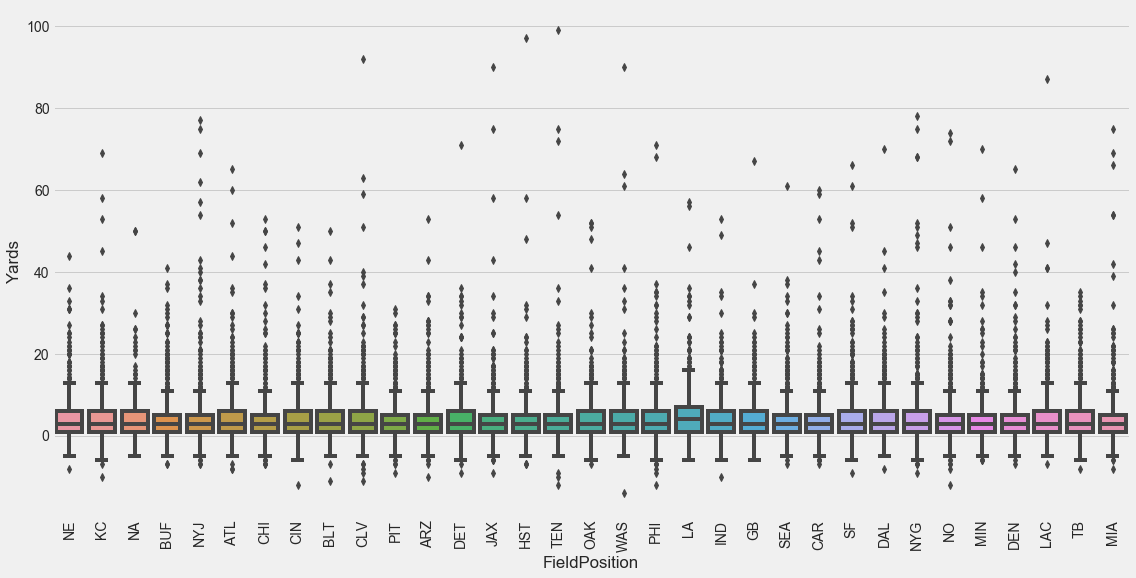

In [189]:
# Exibe o grafico de catPlot com a relacao entre FieldPosition e Jardas
g = sns.catplot(x='FieldPosition', y='Yards', data=train_jog, kind="box", height=8, aspect=2)
g.set_xticklabels(rotation=90)

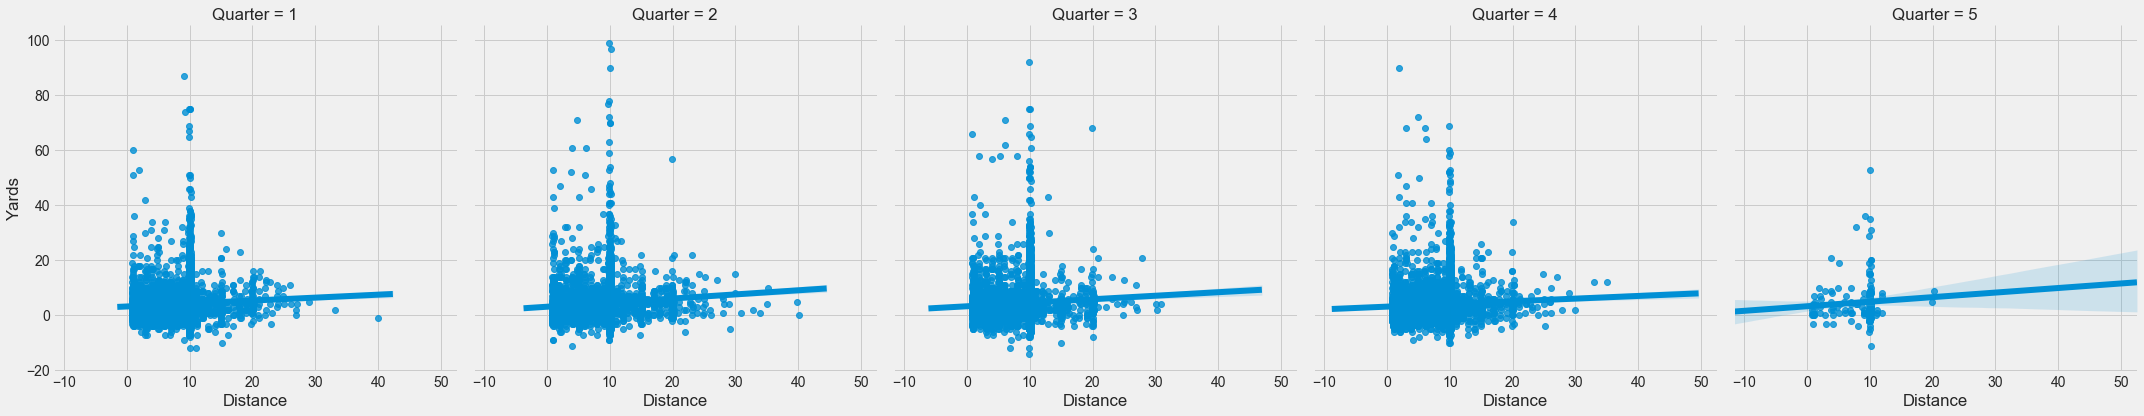

In [190]:
# Exibe o grafico linear com a relacao entre Distancia, Quarter e Jardas
g = sns.lmplot(x='Distance', y='Yards', data=train_jog, x_jitter=.2, col="Quarter" , height=6, aspect=1)

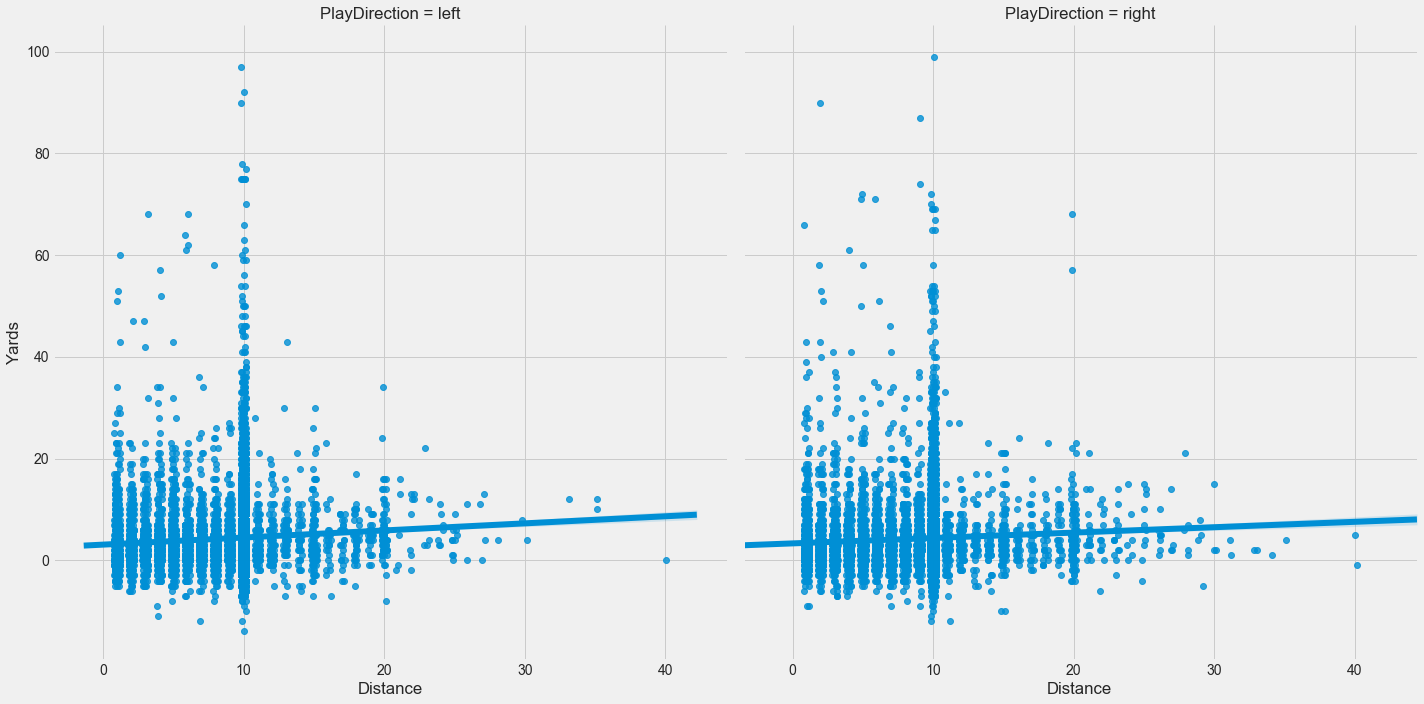

In [191]:
# Exibe o grafico linear com a relacao entre Distancia, Direcao da Jogada e Jardas
g = sns.lmplot(x='Distance', y='Yards', data=train_jog, x_jitter=.2, col="PlayDirection" , height=10)

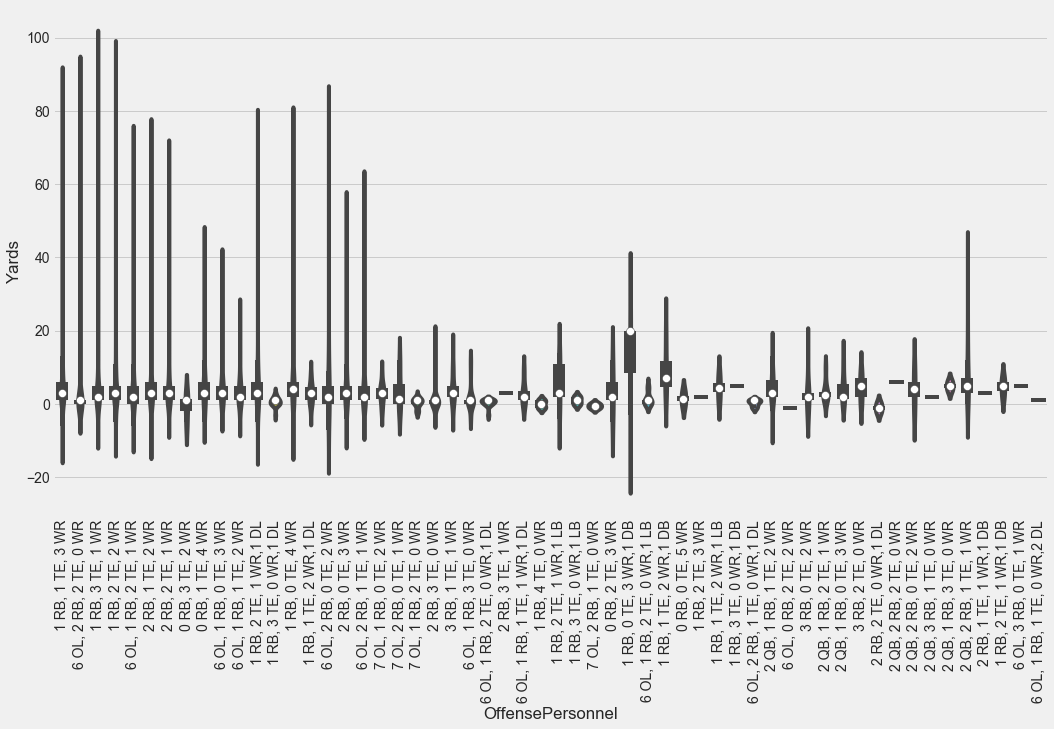

In [192]:
# Exibe o grafico de catPlot com a relacao entre OffensePersonnel e Jardas
g = sns.catplot(x='OffensePersonnel', y='Yards', data=train_jog, kind="violin", height=8, aspect=2)
g.set_xticklabels(rotation=90)

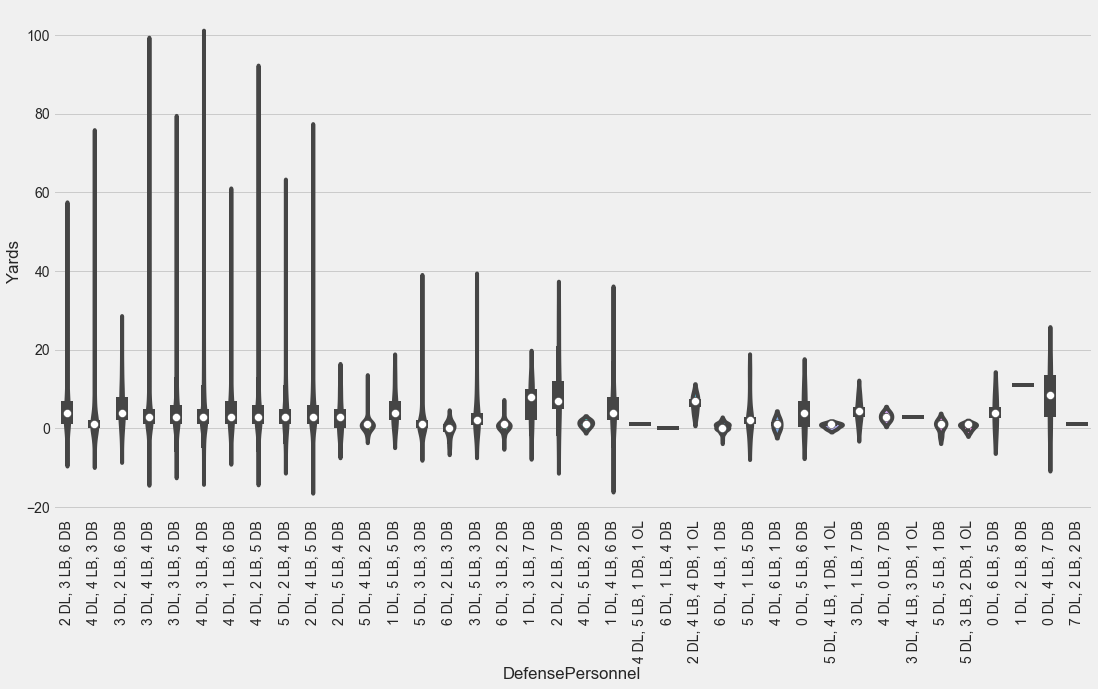

In [193]:
# Exibe o grafico de catPlot com a relacao entre DefensePersonnel e Jardas
g = sns.catplot(x='DefensePersonnel', y='Yards', data=train_jog, kind="violin", height=8, aspect=2)
g.set_xticklabels(rotation=90)

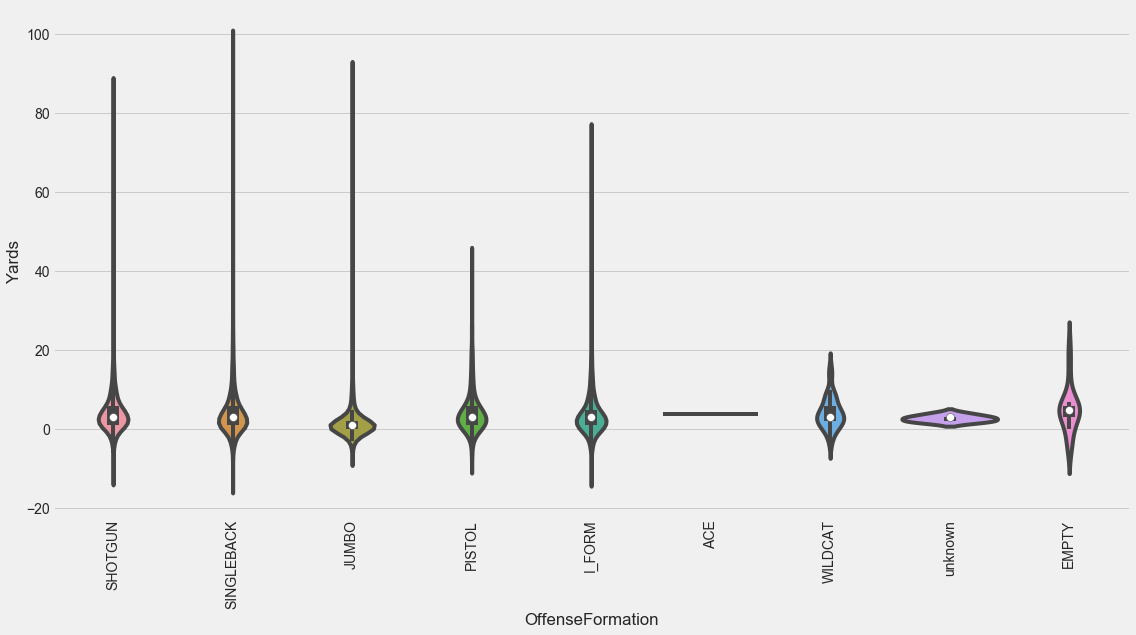

In [194]:
# Exibe o grafico de catPlot com a relacao entre OffenseFormation e Jardas
g = sns.catplot(x='OffenseFormation', y='Yards', data=train_jog, kind="violin", height=8, aspect=2)
g.set_xticklabels(rotation=90)

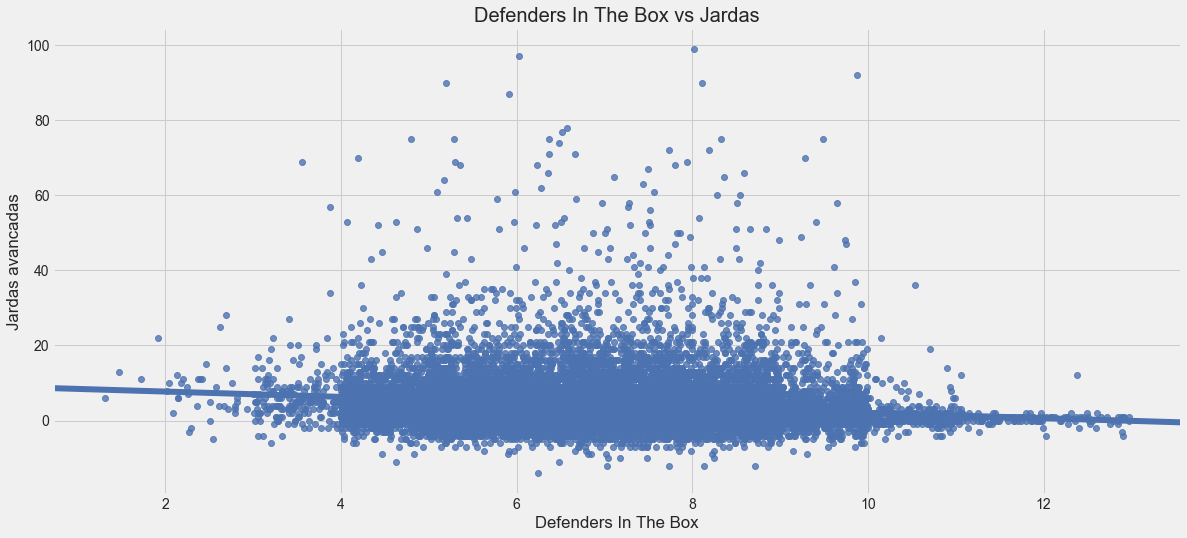

In [195]:
# Exibe o grafico de scatterPlot com a relacao entre DefendersInTheBox e Jardas
plt.figure(figsize=(18, 8))
sns.regplot(x='DefendersInTheBox', y='Yards', data=train_jog, color='b', x_jitter=2)
plt.xlabel('Defenders In The Box')
plt.ylabel('Jardas avancadas')
plt.title('Defenders In The Box vs Jardas', fontsize=20)
plt.show()

In [196]:
# UTC time of the snap
train_jog['TimeSnap'].value_counts().head()

2018-10-07 17:17:41    3
2017-12-31 21:55:29    3
2017-12-03 18:34:31    2
2017-10-22 17:41:03    2
2017-09-24 19:40:05    2
Name: TimeSnap, dtype: int64

In [197]:
# UTC time of the handoff
train_jog['TimeHandoff'].value_counts().head()

2018-10-07 17:17:43    3
2018-10-21 17:29:53    2
2018-12-09 19:01:12    2
2017-12-24 18:05:20    2
2017-12-31 23:51:34    2
Name: TimeHandoff, dtype: int64

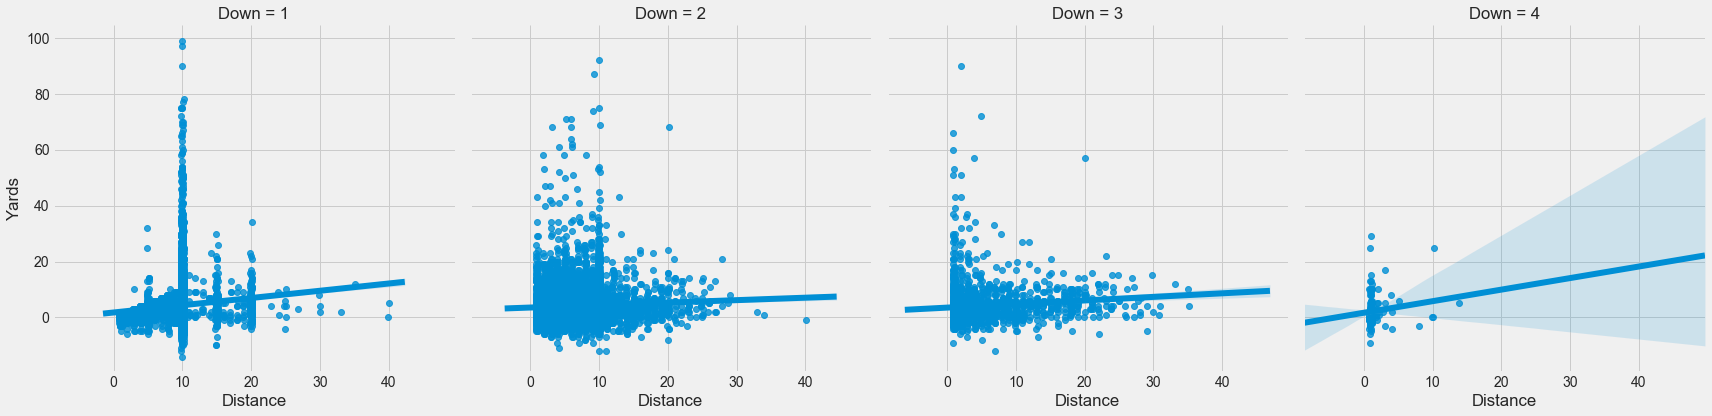

In [198]:
# Exibe o grafico linear com a relacao entre Distancia, Down e Jardas
g = sns.lmplot(x='Distance', y='Yards', data=train_jog, x_jitter=.2, col="Down" , height=6, aspect=1)

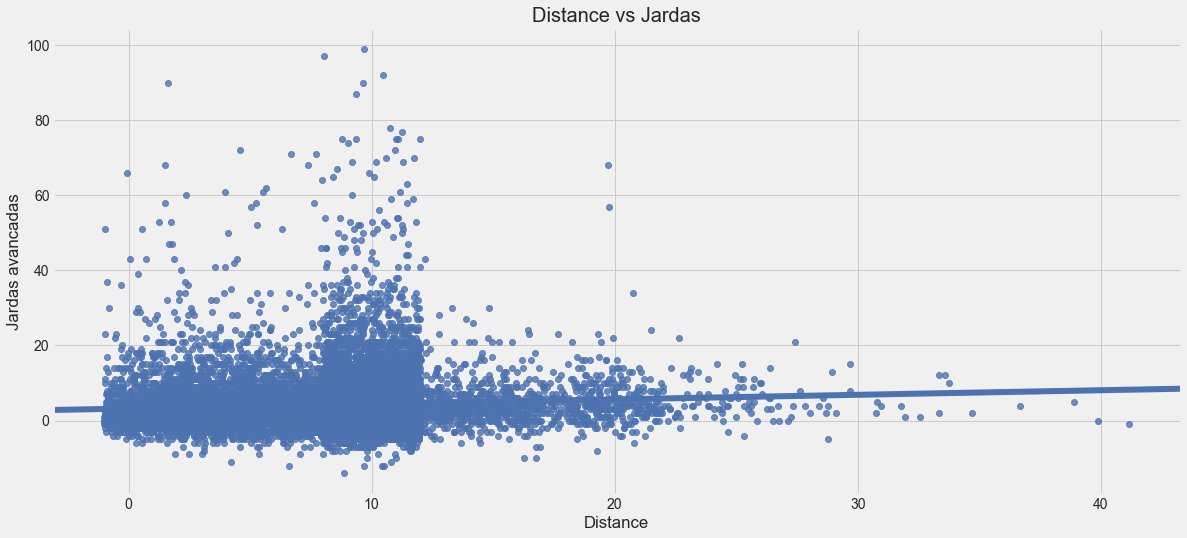

In [199]:
# Exibe o grafico de scatterPlot com a relacao entre Distance e Jardas
plt.figure(figsize=(18, 8))
sns.regplot(x='Distance', y='Yards', data=train_jog, color='b', x_jitter=2)
plt.xlabel('Distance')
plt.ylabel('Jardas avancadas')
plt.title('Distance vs Jardas', fontsize=20)
plt.show()

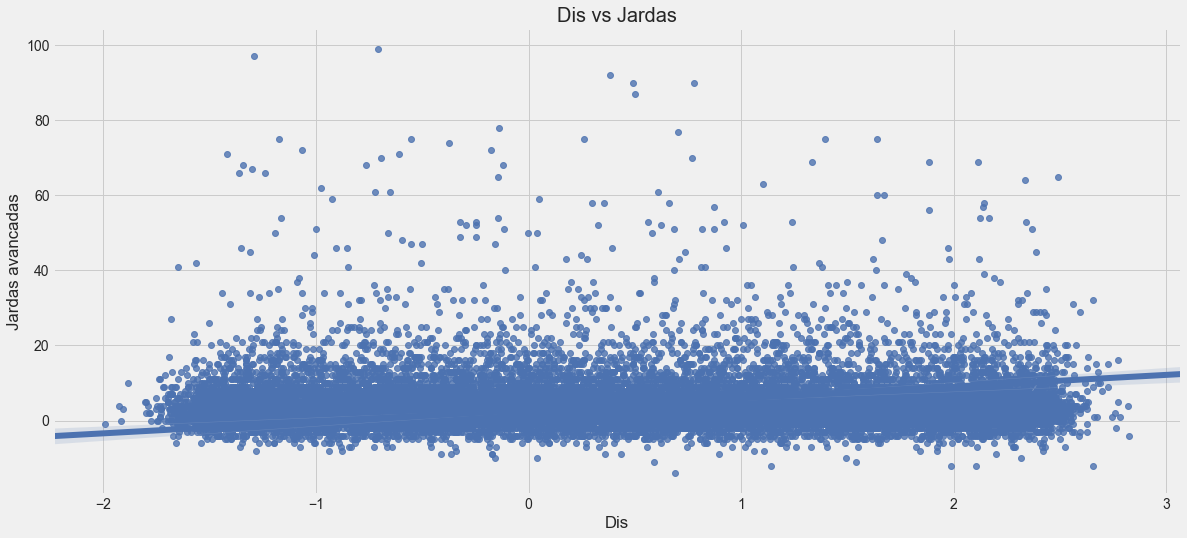

In [200]:
# Exibe o grafico de scatterPlot com a relacao entre Dis e Jardas
plt.figure(figsize=(18, 8))
sns.regplot(x='Dis', y='Yards', data=train_jog, color='b', x_jitter=2)
plt.xlabel('Dis')
plt.ylabel('Jardas avancadas')
plt.title('Dis vs Jardas', fontsize=20)
plt.show()

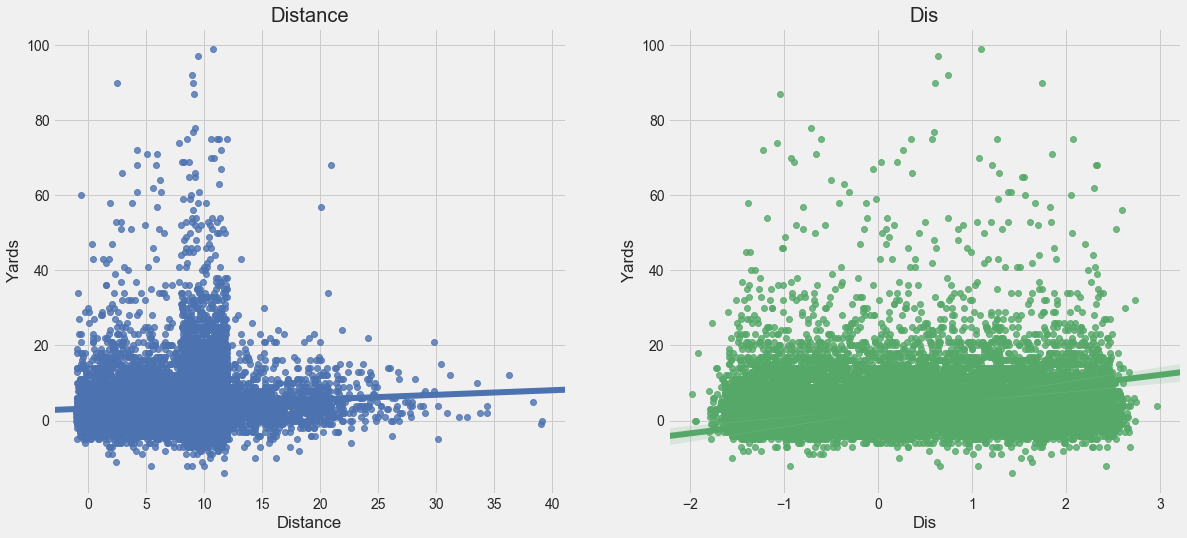

In [201]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 8))

ax1.set_title('Distance')
sns.regplot(x='Distance', y='Yards', data=train_jog, color='b', x_jitter=2, ax=ax1)

ax2.set_title('Dis')
sns.regplot(x='Dis', y='Yards', data=train_jog, color='g', x_jitter=2, ax=ax2)

plt.show()

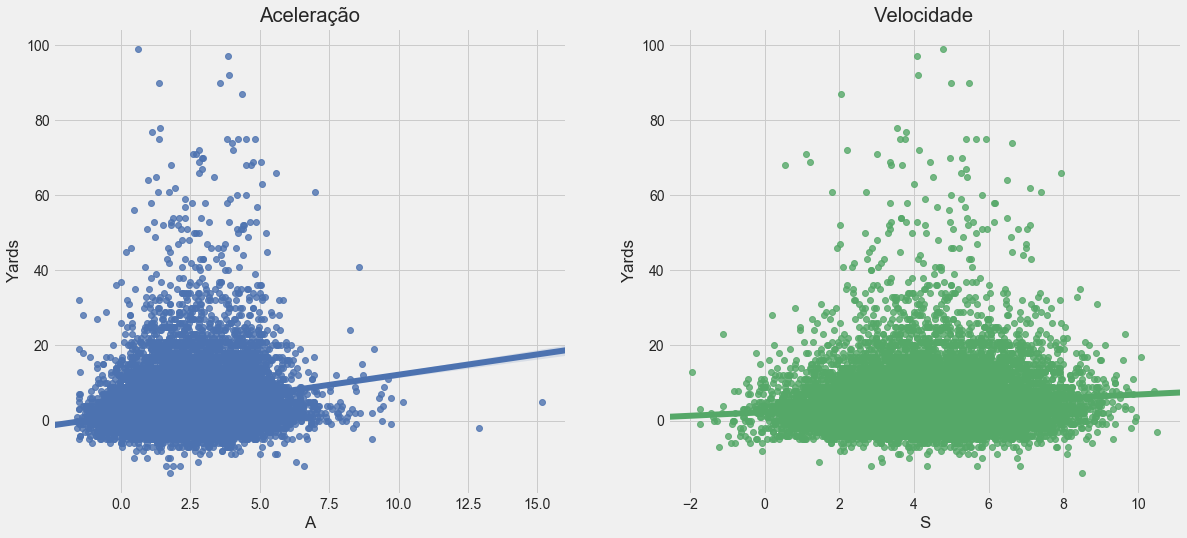

In [202]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 8))

ax1.set_title('Aceleração')
sns.regplot(x='A', y='Yards', data=train_jog, color='b', x_jitter=2, ax=ax1)

ax2.set_title('Velocidade')
sns.regplot(x='S', y='Yards', data=train_jog, color='g', x_jitter=2, ax=ax2)

plt.show()

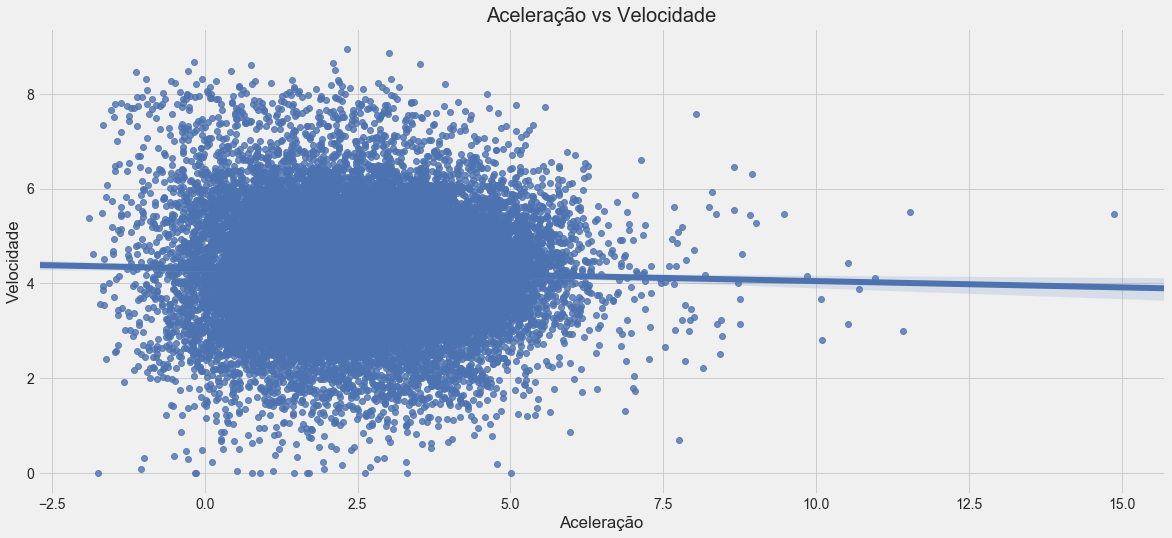

In [203]:
# Exibe o grafico de scatterPlot com a relacao entre Aceleração e Velocidade
plt.figure(figsize=(18, 8))
sns.regplot(x='A', y='S', data=train_jog, color='b', x_jitter=2)
plt.xlabel('Aceleração')
plt.ylabel('Velocidade')
plt.title('Aceleração vs Velocidade', fontsize=20)
plt.show()

### Analisando as variaveis de POSICIONAMENTO DO JOGADOR (player)

- **X:** posição do jogador ao longo do eixo longo do campo
- **Y:** posição do jogador ao longo do eixo curto do campo
- **Orientation:** orientação do jogador
- **Dir:** anglo do movimento do jogador

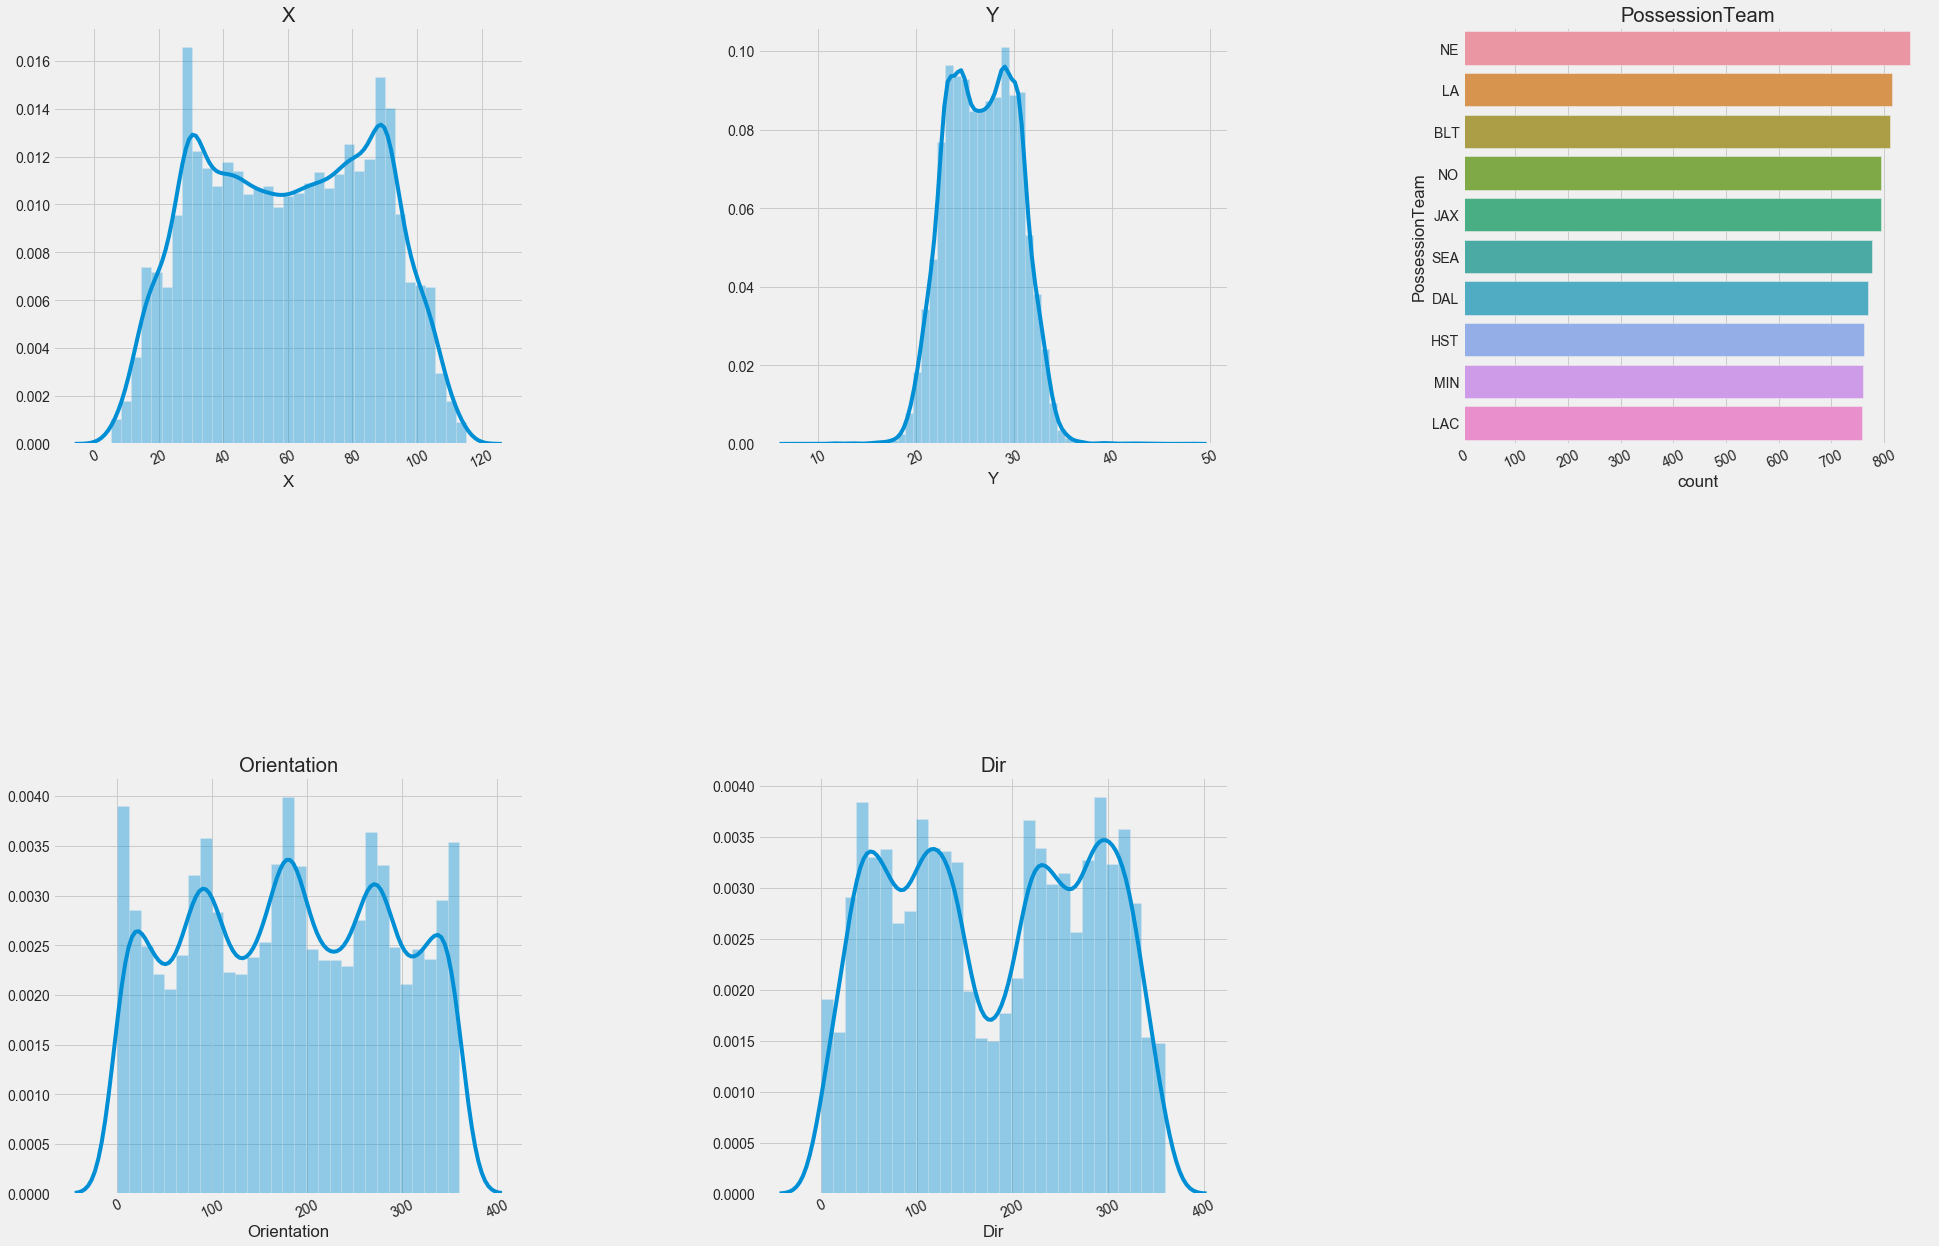

In [204]:
# Visualizando o grafico de distribuicao para cada feature do ambiente
columns_to_plot = ['X', 'Y', 'PossessionTeam', 'Orientation', 'Dir']
plot_distribution(train_jog[columns_to_plot], cols=3, width=30, height=20, hspace=0.8, wspace=0.5)

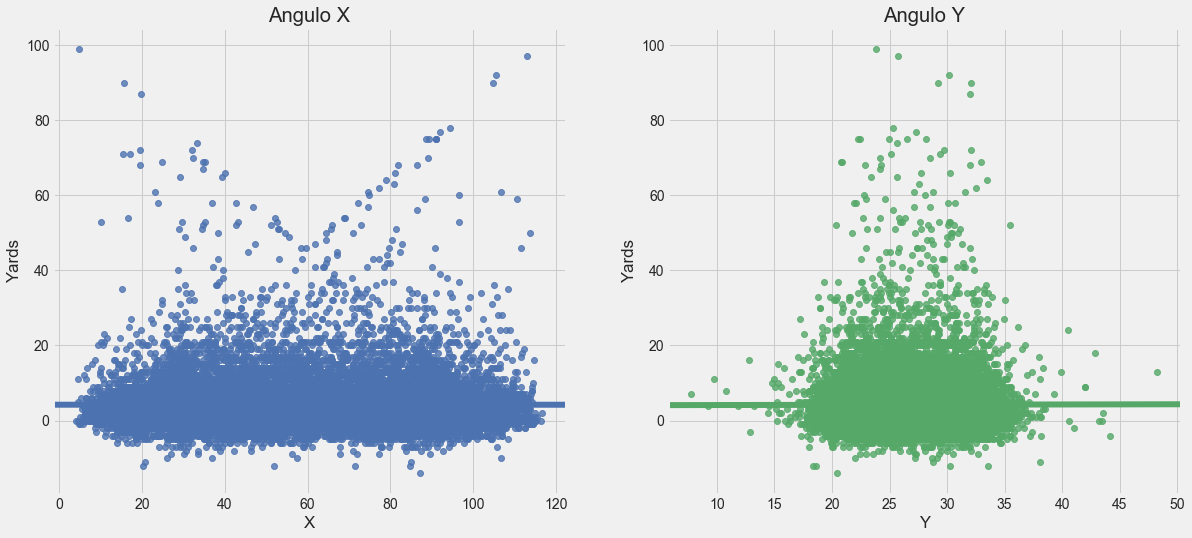

In [205]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 8))

ax1.set_title('Angulo X')
sns.regplot(x='X', y='Yards', data=train_jog, color='b', x_jitter=2, ax=ax1)

ax2.set_title('Angulo Y')
sns.regplot(x='Y', y='Yards', data=train_jog, color='g', x_jitter=2, ax=ax2)

plt.show()

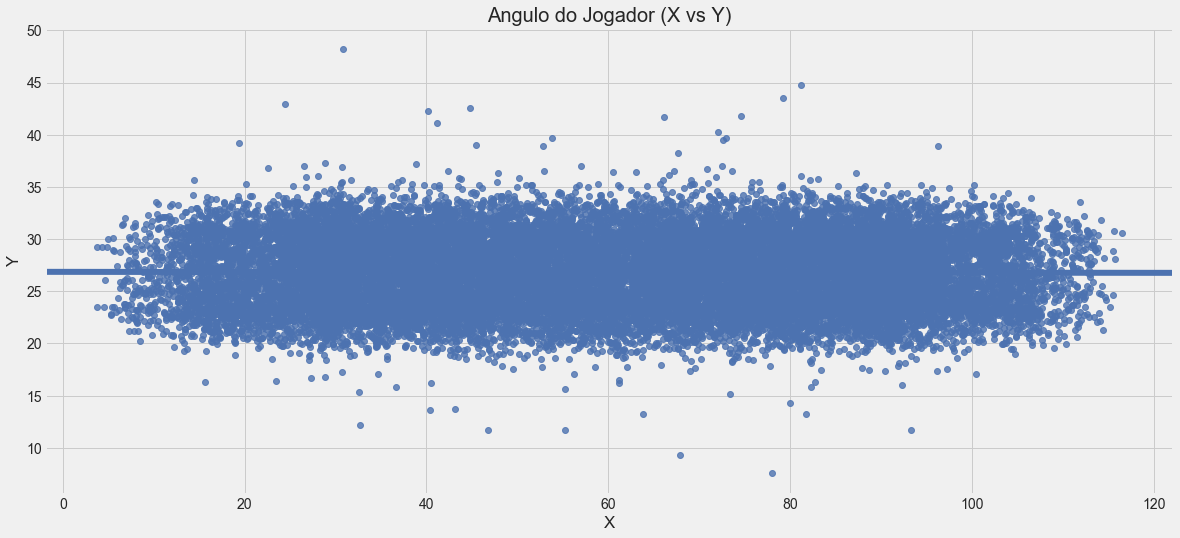

In [206]:
# Exibe o grafico de scatterPlot com a relacao entre o angulo do jogador X e Y
plt.figure(figsize=(18, 8))
sns.regplot(x='X', y='Y', data=train_jog, color='b', x_jitter=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Angulo do Jogador (X vs Y)', fontsize=20)
plt.show()

In [207]:
train_jog['Orientation'].value_counts().head()

90.00     22
177.49     6
268.15     6
282.52     6
166.58     6
Name: Orientation, dtype: int64

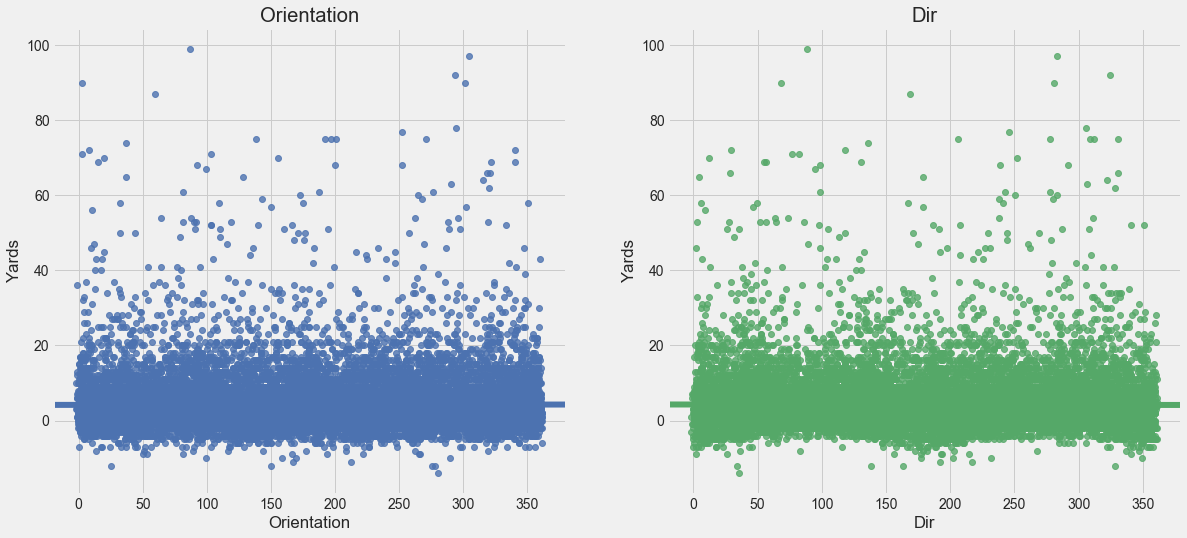

In [208]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 8))

ax1.set_title('Orientation')
sns.regplot(x='Orientation', y='Yards', data=train_jog, color='b', x_jitter=2, ax=ax1)

ax2.set_title('Dir')
sns.regplot(x='Dir', y='Yards', data=train_jog, color='g', x_jitter=2, ax=ax2)

plt.show()

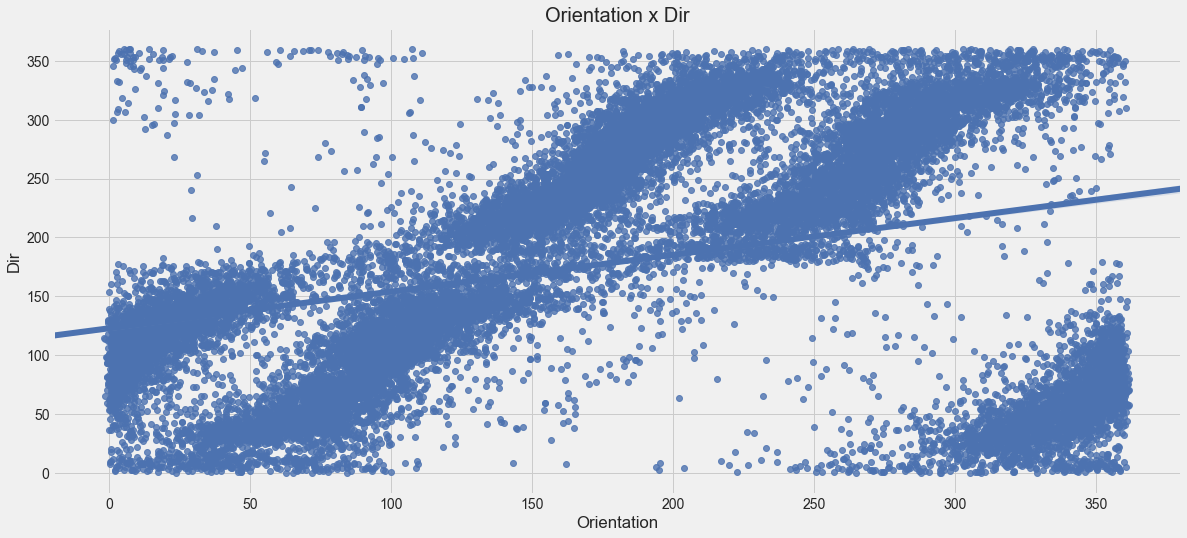

In [209]:
# Exibe o grafico de scatterPlot com a relacao entre Orientation e Dir
plt.figure(figsize=(18, 8))
sns.regplot(x='Orientation', y='Dir', data=train_jog, color='b', x_jitter=2)
plt.xlabel('Orientation')
plt.ylabel('Dir')
plt.title('Orientation x Dir', fontsize=20)
plt.show()

# 4. FEATURE ENGINEERING

In [262]:
# Criando um novo dataset para criação das novas features
all_feat = train.copy()
all_feat.head()

GameId          PlayId  Team      X      Y     S     A   Dis  \
0  2017090700  20170907000118  away  73.91  34.84  1.69  1.13  0.40   
1  2017090700  20170907000118  away  74.67  32.64  0.42  1.35  0.01   
2  2017090700  20170907000118  away  74.00  33.20  1.22  0.59  0.31   
3  2017090700  20170907000118  away  71.46  27.70  0.42  0.54  0.02   
4  2017090700  20170907000118  away  69.32  35.42  1.82  2.43  0.16   

   Orientation     Dir    NflId      DisplayName  JerseyNumber  Season  \
0        81.99  177.18   496723       Eric Berry            29    2017   
1        27.61  198.70  2495116     Allen Bailey            97    2017   
2         3.01  202.73  2495493   Justin Houston            50    2017   
3       359.77  105.64  2506353  Derrick Johnson            56    2017   
4        12.63  164.31  2530794       Ron Parker            38    2017   

   YardLine  Quarter  GameClock PossessionTeam  Down  Distance FieldPosition  \
0        35        1      854.0             NE     3         2            NE   
1        35        1      854.0             NE     3         2            NE   
2        35        1      854.0             NE     3         2            NE   
3        35        1      854.0             NE     3         2            NE   
4        35        1      854.0             NE     3         2            NE   

   HomeScoreBeforePlay  VisitorScoreBeforePlay  NflIdRusher OffenseFormation  \
0                    0                       0      2543773          SHOTGUN   
1                    0                       0      2543773          SHOTGUN   
2                    0                       0      2543773          SHOTGUN   
3                    0                       0      2543773          SHOTGUN   
4                    0                       0      2543773          SHOTGUN   

   OffensePersonnel  DefendersInTheBox  DefensePersonnel PlayDirection  \
0  1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
1  1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
2  1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
3  1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
4  1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   

          TimeHandoff            TimeSnap  Yards  PlayerHeight  PlayerWeight  \
0 2017-09-08 00:44:06 2017-09-08 00:44:05      8         182.9     96.161582   
1 2017-09-08 00:44:06 2017-09-08 00:44:05      8         190.5    130.634603   
2 2017-09-08 00:44:06 2017-09-08 00:44:05      8         190.5    122.469940   
3 2017-09-08 00:44:06 2017-09-08 00:44:05      8         190.5    111.130131   
4 2017-09-08 00:44:06 2017-09-08 00:44:05      8         182.9     93.440028   

  PlayerBirthDate PlayerCollegeName Position HomeTeamAbbr VisitorTeamAbbr  \
0      1988-12-29         Tennessee       SS           NE              KC   
1      1989-03-25             Miami       DE           NE              KC   
2      1989-01-21           Georgia       DE           NE              KC   
3      1982-11-22             Texas      ILB           NE              KC   
4      1987-08-17          Newberry       FS           NE              KC   

   Week           Stadium        Location StadiumType        Turf GameWeather  \
0     1  Gillette Stadium  Foxborough, MA     outdoor  Field Turf       limpo   
1     1  Gillette Stadium  Foxborough, MA     outdoor  Field Turf       limpo   
2     1  Gillette Stadium  Foxborough, MA     outdoor  Field Turf       limpo   
3     1  Gillette Stadium  Foxborough, MA     outdoor  Field Turf       limpo   
4     1  Gillette Stadium  Foxborough, MA     outdoor  Field Turf       limpo   

   Temperature  Humidity  WindSpeed WindDirection  PlayerBirthDate_day  \
0    17.222222      77.0          0    south west                   29   
1    17.222222      77.0          0    south west                   25   
2    17.222222      77.0          0    south west                   21   
3

In [263]:
# Corrigindo a feature Stadium
all_feat.loc[all_feat['Stadium'] == 'MetLife Stadium', 'StadiumType'] = 'outdoor'
all_feat.loc[all_feat['Stadium'] == 'StubHub Center', 'StadiumType'] = 'outdoor'

In [264]:
# Cria um label encoder object
le = preprocessing.LabelEncoder()

# Iteracao para cada coluna do dataset de treino
for col in all_feat:
    if all_feat[col].dtype == 'object':
        le.fit_transform(all_feat[col].astype(str))
        all_feat[col] = le.transform(all_feat[col])      

In [265]:
# Nova feature com a diferença entre o tempo de lançamento da bola até quando o jogador captura
all_feat['TimeDifer'] = all_feat.apply(lambda row: (row['TimeHandoff'] - row['TimeSnap']).total_seconds(), axis=1)

In [266]:
# Nova feature para indicar se é o jogador que esta realizando a jogada (corredor)
all_feat['IsRusher'] = all_feat['NflId'] == all_feat['NflIdRusher']

In [267]:
all_feat.head()

GameId          PlayId  Team      X      Y     S     A   Dis  \
0  2017090700  20170907000118     0  73.91  34.84  1.69  1.13  0.40   
1  2017090700  20170907000118     0  74.67  32.64  0.42  1.35  0.01   
2  2017090700  20170907000118     0  74.00  33.20  1.22  0.59  0.31   
3  2017090700  20170907000118     0  71.46  27.70  0.42  0.54  0.02   
4  2017090700  20170907000118     0  69.32  35.42  1.82  2.43  0.16   

   Orientation     Dir    NflId  DisplayName  JerseyNumber  Season  YardLine  \
0        81.99  177.18   496723          775            29    2017        35   
1        27.61  198.70  2495116           71            97    2017        35   
2         3.01  202.73  2495493         1228            50    2017        35   
3       359.77  105.64  2506353          664            56    2017        35   
4        12.63  164.31  2530794         1814            38    2017        35   

   Quarter  GameClock  PossessionTeam  Down  Distance  FieldPosition  \
0        1      854.0              20     3         2             21   
1        1      854.0              20     3         2             21   
2        1      854.0              20     3         2             21   
3        1      854.0              20     3         2             21   
4        1      854.0              20     3         2             21   

   HomeScoreBeforePlay  VisitorScoreBeforePlay  NflIdRusher  OffenseFormation  \
0                    0                       0      2543773                 5   
1                    0                       0      2543773                 5   
2                    0                       0      2543773                 5   
3                    0                       0      2543773                 5   
4                    0                       0      2543773                 5   

   OffensePersonnel  DefendersInTheBox  DefensePersonnel  PlayDirection  \
0                 9                6.0                 8              0   
1                 9                6.0                 8              0   
2                 9                6.0                 8              0   
3                 9                6.0                 8              0   
4                 9                6.0                 8              0   

          TimeHandoff            TimeSnap  Yards  PlayerHeight  PlayerWeight  \
0 2017-09-08 00:44:06 2017-09-08 00:44:05      8         182.9     96.161582   
1 2017-09-08 00:44:06 2017-09-08 00:44:05      8         190.5    130.634603   
2 2017-09-08 00:44:06 2017-09-08 00:44:05      8         190.5    122.469940   
3 2017-09-08 00:44:06 2017-09-08 00:44:05      8         190.5    111.130131   
4 2017-09-08 00:44:06 2017-09-08 00:44:05      8         182.9     93.440028   

  PlayerBirthDate  PlayerCollegeName  Position  HomeTeamAbbr  VisitorTeamAbbr  \
0      1988-12-29                246        21            20               15   
1      1989-03-25                138         3            20               15   
2      1989-01-21                 81         3            20               15   
3      1982-11-22                249        10            20               15   
4      1987-08-17                170         7            20               15   

   Week  Stadium  Location  StadiumType  Turf  GameWeather  Temperature  \
0     1       10        11            4     3            1    17.222222   
1     1       10        11            4     3            1    17.222222   
2     1       10        11            4     3            1    17.222222   
3     1       10        11            4     3            1    17.222222   
4     1       10        11            4     3            1    17.222222   

   Humidity  WindSpeed  WindDirection  PlayerBirthDate_day  \
0      77.0          0              6                   29   
1      77.0          0              6                   25   
2      77.0          0              6                   21   
3      77.0          0              6                   22   

# Feature Selection - Método Ensemble

As variaveis (atributos) presentes nos dados de treino tem grande influência na precisão e resultado do modelo preditivo. Atributos irrelevantes terão impacto negativo na performance, enquanto atributos colineares podem afetar o grau de acurácia do modelo. O Scikit-learn possui funções que automatizam o trabalho de extração e seleção de variáveis.

A etapa de Feature Selection é onde selecionamos as variaveis (atributos) que serão melhores candidatas a variáveis preditoras. O Feature Selection nos ajuda a reduzir o overfitting (quando o algoritmo aprende demais), aumenta a acurácia do modelo e reduz o tempo de treinamento.

Bagged Decision Trees, como o algoritmo RandomForest (esses são chamados de Métodos Ensemble), podem ser usados para estimar a importância de cada atributo. Esse método retorna um score para cada atributo. Quanto maior o score, maior a importância do atributo.

In [268]:
# Realizando apenas uma ordenacao dos registros
all_feat = all_feat.sort_values(by=['PlayId', 'Team', 'IsRusher']).reset_index()

In [269]:
# Preenche todos os campos nulos que ainda existem por -999
all_feat.fillna(-999, inplace=True)

In [270]:
# Importância do Atributo com o Extra Trees Classifier

# Split features and label
X = all_feat.drop(['Yards', 'GameId', 'PlayId', 'index', 'TimeHandoff', 'TimeSnap', 
                   'PlayerBirthDate', 'NflId', 'NflIdRusher'], axis=1)
y = all_feat['Yards']

# Aplicando a mesma escala nos dados
X = MinMaxScaler().fit_transform(X)

# Padronizando os dados (0 para a média, 1 para o desvio padrão)
X = StandardScaler().fit_transform(X)

# Criação do Modelo - Feature Selection
modeloETC = ExtraTreesRegressor()
modeloETC.fit(X, y)

# Convertendo o resultado em um dataframe
feature_importance_df = pd.DataFrame(all_feat.drop(['Yards', 'GameId', 'PlayId', 'index', 'TimeHandoff', 'TimeSnap', 'PlayerBirthDate', 'NflId', 'NflIdRusher'], axis=1).columns,columns=['Feature'])
feature_importance_df['importance'] = pd.DataFrame(modeloETC.feature_importances_.astype(float))

# Realizando a ordenacao por Importancia (Maior para Menor)
result = feature_importance_df.sort_values('importance',ascending=False)
print(result)

                   Feature    importance
11                YardLine  5.613762e-02
13               GameClock  4.587154e-02
45            TimeSnap_seg  4.308520e-02
46         TimeHandoff_min  4.153002e-02
47         TimeHandoff_seg  4.026841e-02
44            TimeSnap_min  3.818171e-02
18     HomeScoreBeforePlay  3.812351e-02
19  VisitorScoreBeforePlay  3.652914e-02
12                 Quarter  3.443223e-02
16                Distance  3.423777e-02
23        DefensePersonnel  3.363937e-02
17           FieldPosition  3.303919e-02
21        OffensePersonnel  3.225940e-02
14          PossessionTeam  3.177273e-02
20        OffenseFormation  3.169225e-02
30         VisitorTeamAbbr  3.126200e-02
38                Humidity  3.109228e-02
48               TimeDifer  3.053783e-02
37             Temperature  3.040882e-02
31                    Week  2.857623e-02
39               WindSpeed  2.848634e-02
32                 Stadium  2.723523e-02
15                    Down  2.696406e-02
40           Win

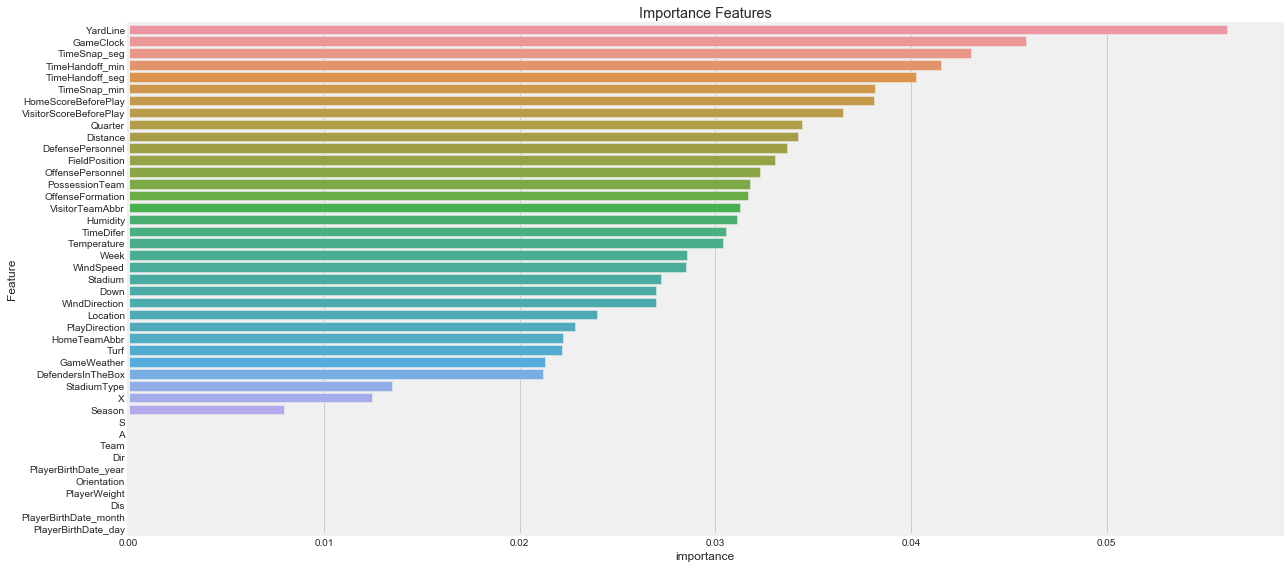

In [271]:
# Visualizando no grafico
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:43].index)

best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(18,8))
sns.barplot(x="importance",
           y="Feature",
           data=best_features.sort_values(by="importance",
                                          ascending=False))
plt.title('Importance Features')
plt.tight_layout()

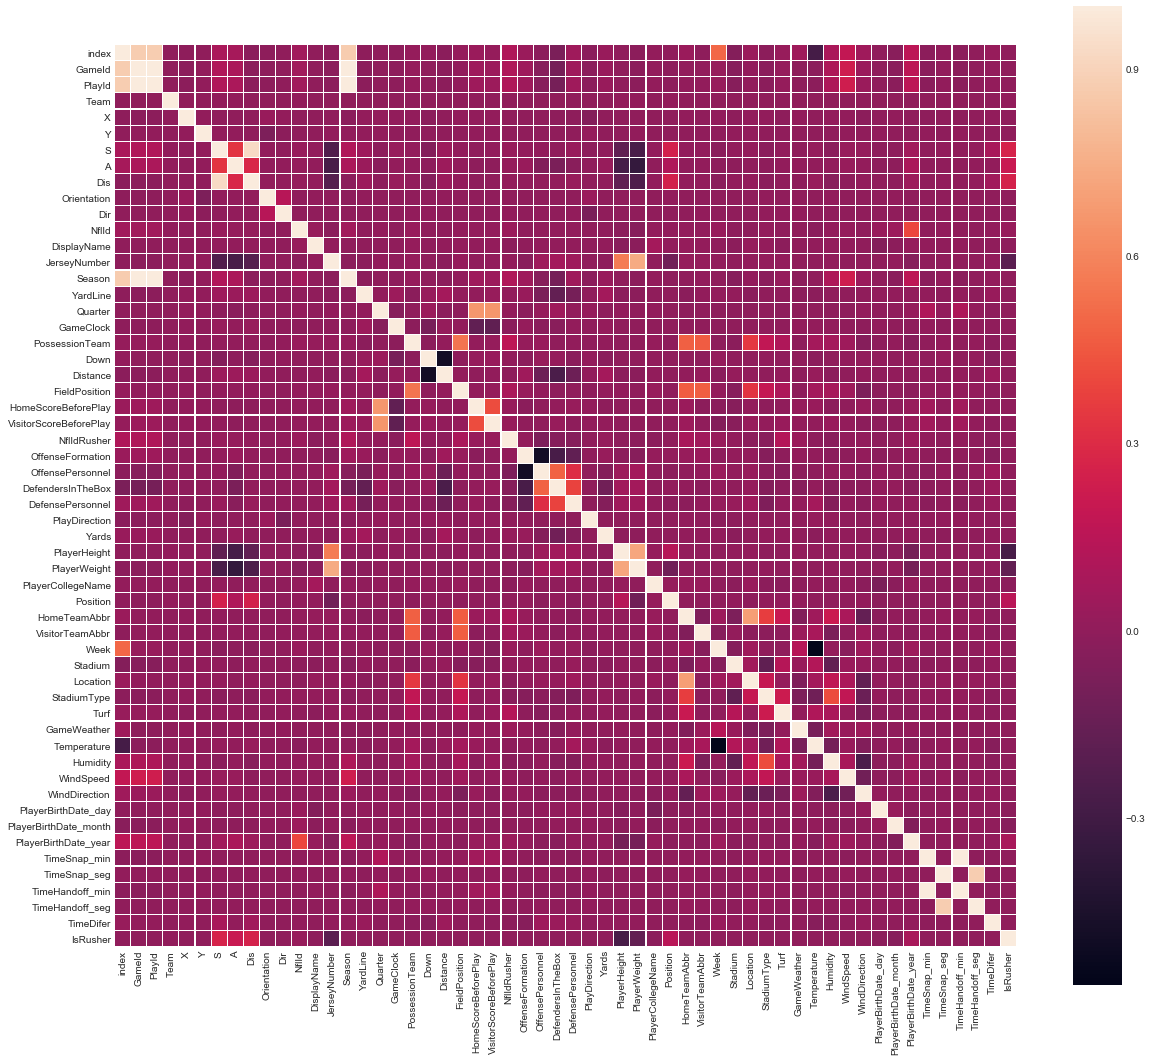

In [272]:
# Correlação de Pearson
cor_mat = all_feat.corr(method = 'pearson')

# Visualizando o grafico de heatmap
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(cor_mat,linewidths=.1,fmt= '.3f',ax=ax,square=True,cbar=True,annot=False)

# CRIAÇÃO E VALIDAÇÃO DOS MODELOS DE MACHINE LEARNING

## Algumas considerações deste processo:
- **Cross Validation:** Estou usando 5-fold cross-validation
- **Models:** Em cada passada do cross-validation eu treino 4 modelos (gradient boosting, random forest, xgboost, lightgbm regressors)
- **Stacking:** Eu também treinei um modelo StackingCVRegressor otimizado usando xgboost
- **Otimizing:** Selecionei o modelo Light Gradient Boosting Regressor para aplicar otimização de hyperparametros

In [279]:
# Fazendo uma limpeza na memoria
gc.collect()

123

In [280]:
# Criando um novo dataset para criação das novas features
model_df = all_feat.copy()

In [281]:
rem_col = ['index','GameId','PlayId','NflId', 'DisplayName','NflIdRusher', 
           'TimeHandoff', 'TimeSnap', 'PlayerBirthDate']

In [282]:
features = [c for c in model_df.columns.values if c not in rem_col]
model_df = model_df[features]
print(model_df.shape)
model_df.head()

(509762, 50)


Team      X      Y     S     A   Dis  Orientation     Dir  JerseyNumber  \
0     0  73.91  34.84  1.69  1.13  0.40        81.99  177.18            29   
1     0  74.67  32.64  0.42  1.35  0.01        27.61  198.70            97   
2     0  74.00  33.20  1.22  0.59  0.31         3.01  202.73            50   
3     0  71.46  27.70  0.42  0.54  0.02       359.77  105.64            56   
4     0  69.32  35.42  1.82  2.43  0.16        12.63  164.31            38   

   Season  YardLine  Quarter  GameClock  PossessionTeam  Down  Distance  \
0    2017        35        1      854.0              20     3         2   
1    2017        35        1      854.0              20     3         2   
2    2017        35        1      854.0              20     3         2   
3    2017        35        1      854.0              20     3         2   
4    2017        35        1      854.0              20     3         2   

   FieldPosition  HomeScoreBeforePlay  VisitorScoreBeforePlay  \
0             21                    0                       0   
1             21                    0                       0   
2             21                    0                       0   
3             21                    0                       0   
4             21                    0                       0   

   OffenseFormation  OffensePersonnel  DefendersInTheBox  DefensePersonnel  \
0                 5                 9                6.0                 8   
1                 5                 9                6.0                 8   
2                 5                 9                6.0                 8   
3                 5                 9                6.0                 8   
4                 5                 9                6.0                 8   

   PlayDirection  Yards  PlayerHeight  PlayerWeight  PlayerCollegeName  \
0              0      8         182.9     96.161582                246   
1              0      8         190.5    130.634603                138   
2              0      8         190.5    122.469940                 81   
3              0      8         190.5    111.130131                249   
4              0      8         182.9     93.440028                170   

   Position  HomeTeamAbbr  VisitorTeamAbbr  Week  Stadium  Location  \
0        21            20               15     1       10        11   
1         3            20               15     1       10        11   
2         3            20               15     1       10        11   
3        10            20               15     1       10        11   
4         7            20               15     1       10        11   

   StadiumType  Turf  GameWeather  Temperature  Humidity  WindSpeed  \
0            4     3            1    17.222222      77.0          0   
1            4     3            1    17.222222      77.0          0   
2            4     3            1    17.222222      77.0          0   
3            4     3            1    17.222222      77.0          0   
4            4     3            1    17.222222      77.0          0   

   WindDirection  PlayerBirthDate_day  PlayerBirthDate_month  \
0              6                   29                     12   
1              6                   25                      3   
2              6                   21                      1   
3              6                   22                     11   
4              6                   17                      8   

   PlayerBirthDate_year  TimeSnap_min  TimeSnap_seg  TimeHandoff_min  \
0                  1988            44             5               44   
1                  1989            44             5               44   
2                  1989            44             5               44   
3                  1982            44             5               44   
4                  1987            44             5               44   

   TimeHandoff_seg  TimeDifer  IsRusher  
0                6        1.0     False  
1                6    

In [283]:
train_df=np.zeros((509762//22, len(features)))
for i in tqdm.tqdm(range(0,509762,22)):
    count=0
    for c in features:
        train_df[i//22][count] = model_df[c][i]
        count+=1

100%|██████████| 23171/23171 [00:14<00:00, 1572.97it/s]


In [294]:
# Normalização e Padronização de features numericas

# Split features and label
y_train_ = np.array([model_df["Yards"][i] for i in range(0,509762,22)])
X_train = pd.DataFrame(data=train_df,columns=features)


# Aplicando a mesma escala nos dados
scaler = preprocessing.StandardScaler()
scaler.fit(y_train_.reshape(-1, 1))
y_train = scaler.transform(y_train_.reshape(-1, 1)).flatten()

In [295]:
# Verificando o shape apos o split entre feature e target
X_train.shape, y_train.shape

((23171, 50), (23171,))

In [296]:
folds = 10
seed = 123

kf = KFold(n_splits = folds, shuffle = True, random_state=seed)
y_valid_pred = np.zeros(X_train.shape[0])
models = []

for tr_idx, val_idx in kf.split(X_train, y_train):
    tr_x, tr_y = X_train.iloc[tr_idx,:], y_train[tr_idx]
    vl_x, vl_y = X_train.iloc[val_idx,:], y_train[val_idx]
            
    print(len(tr_x),len(vl_x))
    tr_data = lgb.Dataset(tr_x, label=tr_y)
    vl_data = lgb.Dataset(vl_x, label=vl_y)  
    clf = lgb.LGBMRegressor(n_estimators=200,learning_rate=0.01)
    clf.fit(tr_x, tr_y,
        eval_set=[(vl_x, vl_y)],
        early_stopping_rounds=20,
        verbose=False)
    y_valid_pred[val_idx] += clf.predict(vl_x, num_iteration=clf.best_iteration_)
    models.append(clf)

gc.collect()

20853 2318
20854 2317
20854 2317
20854 2317
20854 2317
20854 2317
20854 2317
20854 2317
20854 2317
20854 2317


585

## Validação
Continuous Ranked Probability Score (CRPS) is derived based on the predicted scalar value.
The CRPS is computed as follows:
$$
C=\frac{1}{199N}\sum_{m=1}^N\sum_{n=-99}^{99}(P(y\geq n)-H(n-Y_m))^2
$$
$H(x)=1$ if $x\geq 0$ else $0$

In [297]:
y_pred = np.zeros((509762//22,199))
y_ans = np.zeros((509762//22,199))

for i,p in enumerate(np.round(scaler.inverse_transform(y_valid_pred))):
    p+=99
    for j in range(199):
        if j>=p+10:
            y_pred[i][j]=1.0
        elif j>=p-10:
            y_pred[i][j]=(j+10-p)*0.05

for i,p in enumerate(scaler.inverse_transform(y_train)):
    p+=99
    for j in range(199):
        if j>=p:
            y_ans[i][j]=1.0

print("validation score:",np.sum(np.power(y_pred-y_ans,2))/(199*(509762//22)))

validation score: 0.008624761414426137


# REALIZANDO A SUBMISSAO

In [298]:
index = 0
for (test_df, sample_prediction_df) in tqdm.tqdm(env.iter_test()):
    
    # Realizando os tratamentos no dataset de teste
    fill_na(test_df)
    convert_data(test_df)
    test_df['PlayerHeight'] = test_df['PlayerHeight'].apply(convert_to_cm)
    test_df['PlayerWeight'] = test_df['PlayerWeight'].apply(convert_to_kg)
    test_df['Temperature'] = test_df['Temperature'].apply(convert_to_celsius)
    test_df['StadiumType'] = test_df['StadiumType'].apply(agrupar_tipo_estadio)
    test_df['Stadium'] = test_df['Stadium'].apply(agrupar_estadio)
    test_df['Location'] = test_df['Location'].apply(agrupar_local)
    test_df['Turf'] = test_df['Turf'].apply(agrupar_gramado)
    test_df['WindDirection'] = test_df['WindDirection'].apply(agrupa_wind_direction)
    test_df['WindSpeed'] = test_df['WindSpeed'].apply(convert_wind_speed)
    test_df['GameWeather'] = test_df['GameWeather'].apply(agrupar_clima)
    test_df['GameClock'] = test_df['GameClock'].apply(str_to_seconds)
    
    # Corrigindo a feature Stadium
    test_df.loc[test_df['Stadium'] == 'MetLife Stadium', 'StadiumType'] = 'outdoor'
    test_df.loc[test_df['Stadium'] == 'StubHub Center', 'StadiumType'] = 'outdoor'

    count=0
    test_data = np.zeros((1,len(features)))

    for c in features:
        if c in test_df:
            try:
                test_data[0][count] = test_df[c][index]
            except:
                test_data[0][count] = np.nan
            count+=1  
    
    y_pred = np.zeros(199)        
    y_pred_p = np.sum(np.round(scaler.inverse_transform([model.predict(test_data)[0] for model in models])))/folds
    y_pred_p += 99
    
    for j in range(199):
        
        if j>=y_pred_p+10:
            y_pred[j]=1.0
        
        elif j>=y_pred_p-10:
            y_pred[j]=(j+10-y_pred_p)*0.05
    
    env.predict(pd.DataFrame(data=[y_pred],columns=sample_prediction_df.columns))
    index += 22
    
env.write_submission_file()

NameError: name 'env' is not defined